# Trabajo Final

In [244]:
## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree



# Import necessary libs

import os
import random as rnd
import pandas as pd
import numpy as np
import itertools
import gc
import networkx as nx
from sklearn import metrics
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# estadística y matemáticas
#import pandas as pd
import scipy.stats as scy
from scipy.stats import kurtosis
from scipy import stats

# Crea una semilla cualesquiera
seed = 16
np.random.seed(seed)

# Preprocesar label
from sklearn import preprocessing

## Modelos de Machine Learning
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import tree

## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

## Selección de Variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Validación Cruzada
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

Leer los datos negocios

In [245]:
## data 
dataset = pd.read_excel('ventas_sebastian.xlsx')
mproductos = pd.read_excel('Maestro_productos.xlsx')
mcanales = pd.read_excel('Maestro_tratamiento.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Oficina de ventas            13755 non-null  object 
 1   Supervisor (Histórico)       13755 non-null  object 
 2   Vendedor (ZV)                13755 non-null  object 
 3   Solicitante                  13755 non-null  object 
 4   Unnamed: 4                   13755 non-null  object 
 5   Material                     13755 non-null  object 
 6   Unnamed: 6                   13755 non-null  object 
 7   Mes natural                  13755 non-null  object 
 8   Año natural                  13755 non-null  int64  
 9   Tratamiento Comercial        13755 non-null  object 
 10  Unnamed: 10                  6881 non-null   object 
 11  
Cantidad Facturada (SD-F)   12792 non-null  float64
 12  
Total Descuentos (SD-F)     1642 non-null   float64
 13  
Facturación Net

In [246]:
#Dimensión de la base de datos original
dataset.shape


(13755, 16)

In [247]:
mproductos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CODIGO QS                 546 non-null    int64  
 1   CATEGORIA                 546 non-null    object 
 2   TIPO                      546 non-null    object 
 3   DESCRIPCIÓN DEL PRODUCTO  546 non-null    object 
 4   COSTO UNITARIO            93 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 21.5+ KB


# Tratamiento de datos

## Tratamiento de valores nulos

In [248]:
print("Número de observaciones = {}".format(dataset.shape[0]))
print("Total de variables disponibles = {}".format(dataset.columns.shape[0]))
print("Columnas que cuentan con algún valor nulo-")
print(dataset.isnull().sum())

Número de observaciones = 13755
Total de variables disponibles = 16
Columnas que cuentan con algún valor nulo-
Oficina de ventas                   0
Supervisor (Histórico)              0
Vendedor (ZV)                       0
Solicitante                         0
Unnamed: 4                          0
Material                            0
Unnamed: 6                          0
Mes natural                         0
Año natural                         0
Tratamiento Comercial               0
Unnamed: 10                      6874
\nCantidad Facturada (SD-F)       963
\nTotal Descuentos (SD-F)       12113
\nFacturación Neta SF (SD-F)     3252
\nCuota de venta                12887
\n% Cumplimiento                13755
dtype: int64


In [249]:
dataset = dataset.fillna(0)
dataset

Oficina de ventas   Supervisor (Histórico)         Vendedor (ZV)  \
0            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
1            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
2            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
3            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
4            Of.QS F&C Lima     VIRGINIA LUCIA BAYLY   DANIEL ALONSO TELLO   
...                     ...                      ...                   ...   
13750  Of.QS F&C Ayacu-Huan     FRANK RUBEN ESPINOZA  ROMEL ALCIDES LLACSA   
13751        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13752        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13753        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   
13754        Of.QS F&C Puno  (X)IVAN PAVEL MANGHIERT  ROSARIO JANET FLORES   

      Solicitante                   Unnamed: 4 Material  \
0          357193    (I)MARCO ALDANY PERU S.A.   536696   
1          357193    (I)MARCO ALDANY PERU S.A.   536696   
2          357193    (I)MARCO ALDANY PERU S.A.   536706   
3          357193    (I)MARCO ALDANY PERU S.A.   536706   
4          357193    (I)MARCO ALDANY PERU S.A.   536706   
...           ...                          ...      ...   
13750      448738  FIGARO PELUQUERIAS E.I.R.L.   568297   
13751           #                  Sin asignar        #   
13752           #                  Sin asignar        #   
13753           #                  Sin asignar        #   
13754           #                  Sin asignar        #   

                          Unnamed: 6 Mes natural  Año natural  \
0            SEB SHAPER FIERCE 400ML       Enero         2017   
1            SEB SHAPER FIERCE 400ML       Enero         2017   
2      SEB PENETRAITT SHAMPOO 1000ML       Enero         2017   
3      SEB PENETRAITT SHAMPOO 1000ML       Enero         2017   
4      SEB PENETRAITT SHAMPOO 1000ML     Febrero         2017   
...                              ...         ...          ...   
13750        SEBMAN PLAYER GEL 150ML   Diciembre         2020   
13751                    Sin asignar        Mayo         2020   
13752                    Sin asignar        Mayo         2020   
13753                    Sin asignar       Junio         2020   
13754                    Sin asignar       Junio         2020   

      Tratamiento Comercial           Unnamed: 10  \
0                        62    Salones de Belleza   
1                 Resultado                     0   
2                        62    Salones de Belleza   
3                 Resultado                     0   
4                        62    Salones de Belleza   
...                     ...                   ...   
13750             Resultado                     0   
13751                     #  OTROS CANALES TRADIC   
13752             Resultado                     0   
13753                     #  OTROS CANALES TRADIC   
13754             Resultado                     0   

       \nCantidad Facturada (SD-F)  \nTotal Descuentos (SD-F)  \
0                              1.0                     -22.16   
1                              1.0                     -22.16   
2                              2.0                     -83.04   
3                              2.0                     -83.04   
4                              1.0                     -41.52   
...                            ...                        ...   
13750                        -48.0                       0.00   
13751                          0.0                       0.00   
13752                          0.0                       0.00   
13753                          0.0                       0.00   
13754                          0.0                       0.00   

       \nFacturación Neta SF (SD-F)  \nCuota de venta  \n% Cumplimiento  
0                             33.24              0.00               0.0  
1                

In [250]:
print(dataset.isnull().sum())

Oficina de ventas               0
Supervisor (Histórico)          0
Vendedor (ZV)                   0
Solicitante                     0
Unnamed: 4                      0
Material                        0
Unnamed: 6                      0
Mes natural                     0
Año natural                     0
Tratamiento Comercial           0
Unnamed: 10                     0
\nCantidad Facturada (SD-F)     0
\nTotal Descuentos (SD-F)       0
\nFacturación Neta SF (SD-F)    0
\nCuota de venta                0
\n% Cumplimiento                0
dtype: int64


## Transformación de datos

In [251]:
#Cambio de nombres de columnas
dataset.rename(columns={'Oficina de ventas':'Oficina_ventas'},inplace = True)
dataset.rename(columns={'Supervisor (Histórico)':'Nombre_Supervisor'},inplace = True)
dataset.rename(columns={'Vendedor (ZV)':'Nombre_Vendedor'},inplace = True)
dataset.rename(columns={'Solicitante':'Cod_solicitante'},inplace = True)
dataset.rename(columns={'Unnamed: 4':'Solicitante'},inplace = True)
dataset.rename(columns={'Material':'Cod_producto'},inplace = True)
dataset.rename(columns={'Unnamed: 6':'Producto'},inplace = True)
dataset.rename(columns={'Mes natural':'Mes'},inplace = True)
dataset.rename(columns={'Año natural':'Ano'},inplace = True)
dataset.rename(columns={'Tratamiento Comercial':'Cod_tratamiento'},inplace = True)
dataset.rename(columns={'Unnamed: 10':'Tratamiento_comercial1'},inplace = True)
dataset.rename(columns={'\nCantidad Facturada (SD-F)':'Cant_facturada'},inplace = True)
dataset.rename(columns={'\nTotal Descuentos (SD-F)':'Total_descuentos'},inplace = True)
dataset.rename(columns={'\nFacturación Neta SF (SD-F)':'Facturacion_neta'},inplace = True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13755 entries, 0 to 13754
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          13755 non-null  object 
 1   Nombre_Supervisor       13755 non-null  object 
 2   Nombre_Vendedor         13755 non-null  object 
 3   Cod_solicitante         13755 non-null  object 
 4   Solicitante             13755 non-null  object 
 5   Cod_producto            13755 non-null  object 
 6   Producto                13755 non-null  object 
 7   Mes                     13755 non-null  object 
 8   Ano                     13755 non-null  int64  
 9   Cod_tratamiento         13755 non-null  object 
 10  Tratamiento_comercial1  13755 non-null  object 
 11  Cant_facturada          13755 non-null  float64
 12  Total_descuentos        13755 non-null  float64
 13  Facturacion_neta        13755 non-null  float64
 14  
Cuota de venta         13755 non-null

In [252]:
#Tratamiento de datos que aplican en el area de ventas
dataset = dataset.drop(dataset[dataset['Cod_tratamiento']=="Resultado"].index) #eliminamos errores de SAP
dataset = dataset.drop(dataset[dataset['Cod_producto']=="#"].index) #eliminamos errores de SAP
dataset = dataset.drop(['\nCuota de venta','\n% Cumplimiento'], axis=1) #eliminamos columnas que no se usan
dataset["Tratamiento_comercial1"] = dataset["Tratamiento_comercial1"].str.lower() #unificamos errores de escritura de tratamiento comercial
dataset['Cod_producto']= pd.to_numeric(dataset['Cod_producto'])
mproductos.rename(columns={'CODIGO QS':'Cod_producto'},inplace = True)
dataset = pd.merge(left=dataset,right=mproductos, how='left', left_on='Cod_producto', right_on='Cod_producto') #agregamos columnas del maestro de productos
dataset = dataset.drop(['DESCRIPCIÓN DEL PRODUCTO','COSTO UNITARIO'], axis=1) #borramos columnas que no nocesitamos
mcanales.rename(columns={'Tratamiento comercial 1':'Tratamiento_comercial1'},inplace = True)
mcanales["Tratamiento_comercial1"] = mcanales["Tratamiento_comercial1"].str.lower() #unificamos errores de escritura de tratamiento comercial
dataset = pd.merge(left=dataset,right=mcanales, how='left', left_on='Tratamiento_comercial1', right_on='Tratamiento_comercial1') #agregamos columnas del maestro de productos
dataset.rename(columns={'Tratamiento comercial 2':'Canales'},inplace = True)
dataset['Total_descuentos'] = dataset['Total_descuentos'].abs()
dataset["Cod_producto"] = dataset["Cod_producto"].astype(str) 
dataset["Cod_solicitante"] = dataset["Cod_solicitante"].astype(str) 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   int64  
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

In [253]:

#Realizamos cambios en la data y creamos columnas para facilitar el analisis
dataset['Mes'] = dataset['Mes'].replace(['Enero'],'01')
dataset['Mes'] = dataset['Mes'].replace(['Febrero'],'02')
dataset['Mes'] = dataset['Mes'].replace(['Marzo'],'03')
dataset['Mes'] = dataset['Mes'].replace(['Abril'],'04')
dataset['Mes'] = dataset['Mes'].replace(['Mayo'],'05')
dataset['Mes'] = dataset['Mes'].replace(['Junio'],'06')
dataset['Mes'] = dataset['Mes'].replace(['Julio'],'07')
dataset['Mes'] = dataset['Mes'].replace(['Agosto'],'08')
dataset['Mes'] = dataset['Mes'].replace(['Septiembre'],'09')
dataset['Mes'] = dataset['Mes'].replace(['Octubre'],'10')
dataset['Mes'] = dataset['Mes'].replace(['Noviembre'],'11')
dataset['Mes'] = dataset['Mes'].replace(['Diciembre'],'12')

#dataset['COVID'] = dataset['Mes'].replace(['Diciembre'],'12')
#dataset['Mes']= dataset['Mes'].astype('string')
#dataset['Ano']= dataset['Ano'].astype('string')
#dataset['Cod_producto']= dataset['Cod_producto'].astype('string')




dataset

dataset['Ano']=dataset['Ano'].replace("[,""]","", regex=True)
dataset['Ano']= dataset['Ano'].astype(str)
dataset['Ano_Mes'] = dataset['Ano']+dataset['Mes']
dataset['Ano_Mes']= dataset['Ano_Mes'].astype(int)
#dataset['Cerrado_COVID'] = ["1" if x == 202003 or x == 202004 or x == 202005 or x == 202006 else "0" for x in dataset['Ano_Mes']]
#dataset['Covid'] = ["1" if x >=202003 else "0" for x in dataset['Ano_Mes']] 
#dataset['Mes']= dataset['Mes'].astype('string')
#dataset['Ano']= dataset['Ano'].astype('string')
#dataset['Cod_producto']= dataset['Cod_producto'].astype('string')

dataset.reset_index()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   object 
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

In [254]:
#creamos id de ventas
dataset['id_venta'] = dataset['Ano']+dataset['Mes']+dataset['Cod_solicitante']

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6555 entries, 0 to 6554
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          6555 non-null   object 
 1   Nombre_Supervisor       6555 non-null   object 
 2   Nombre_Vendedor         6555 non-null   object 
 3   Cod_solicitante         6555 non-null   object 
 4   Solicitante             6555 non-null   object 
 5   Cod_producto            6555 non-null   object 
 6   Producto                6555 non-null   object 
 7   Mes                     6555 non-null   object 
 8   Ano                     6555 non-null   object 
 9   Cod_tratamiento         6555 non-null   object 
 10  Tratamiento_comercial1  6555 non-null   object 
 11  Cant_facturada          6555 non-null   float64
 12  Total_descuentos        6555 non-null   float64
 13  Facturacion_neta        6555 non-null   float64
 14  CATEGORIA               6505 non-null   

## Diferenciación de data

In [255]:
#Para crear el dataframe de ventas, retiramos los otros escenarios encontrados en el reporte como: rebates, devoluciones, regalos. ademas nos quedamos con las trransacciones realizadas por salones de belleza, que representan el 80% de las ventas.
ventas = dataset.drop(dataset[dataset['Cant_facturada'] <= 0 ].index) #eliminamos los rebates(sin cantidad) y devoluciones (cantidades negativas) para quedarnos solo con las ventas
ventas = ventas.drop(ventas[ventas['Facturacion_neta'] <= 1 ].index) #eliminamos los regalos promocionales (no generan ganancias)

ventas['Facturacion_neta'] = ventas['Facturacion_neta'].abs()
ventas['precio_venta_cd'] = ventas['Facturacion_neta']/ventas['Cant_facturada']
ventas['precio_venta_sd'] = (ventas['Facturacion_neta']+ ventas['Total_descuentos'])/ventas['Cant_facturada']

ventas2019 = ventas.drop(ventas[ventas['Ano'] != "2019" ].index)
ventas2020 = ventas.drop(ventas[ventas['Ano'] != "2020" ].index)
ventas2020 = ventas2020.drop(ventas2020[ventas2020['Canales'] != "Salones de Belleza" ].index)#nos quedamos solo con los salones de bellezas
ventas2020 = ventas2020.drop(['Canales'], axis =1 )
ventas2020.info()

#ventas['ID_CORRELATIVO'] =   ventas['ID_CORRELATIVO'].apply(lambda x: '{0:0>7}'.format(x))
#ventas = ventas.sort_values(['ID_CORRELATIVO'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 135 to 6553
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          979 non-null    object 
 1   Nombre_Supervisor       979 non-null    object 
 2   Nombre_Vendedor         979 non-null    object 
 3   Cod_solicitante         979 non-null    object 
 4   Solicitante             979 non-null    object 
 5   Cod_producto            979 non-null    object 
 6   Producto                979 non-null    object 
 7   Mes                     979 non-null    object 
 8   Ano                     979 non-null    object 
 9   Cod_tratamiento         979 non-null    object 
 10  Tratamiento_comercial1  979 non-null    object 
 11  Cant_facturada          979 non-null    float64
 12  Total_descuentos        979 non-null    float64
 13  Facturacion_neta        979 non-null    float64
 14  CATEGORIA               979 non-null   

In [256]:
#Para crear el dataframe de devoluciones
devoluciones = dataset.drop(dataset[dataset['Cant_facturada'] >= 0 ].index)
devoluciones = devoluciones.drop(devoluciones[devoluciones['Facturacion_neta'] >= 0 ].index)
devoluciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 240 to 6554
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          106 non-null    object 
 1   Nombre_Supervisor       106 non-null    object 
 2   Nombre_Vendedor         106 non-null    object 
 3   Cod_solicitante         106 non-null    object 
 4   Solicitante             106 non-null    object 
 5   Cod_producto            106 non-null    object 
 6   Producto                106 non-null    object 
 7   Mes                     106 non-null    object 
 8   Ano                     106 non-null    object 
 9   Cod_tratamiento         106 non-null    object 
 10  Tratamiento_comercial1  106 non-null    object 
 11  Cant_facturada          106 non-null    float64
 12  Total_descuentos        106 non-null    float64
 13  Facturacion_neta        106 non-null    float64
 14  CATEGORIA               106 non-null   

In [257]:
#Para crear el dataframe de rebates
rebates = dataset.drop(dataset[dataset['Cant_facturada'] != 0 ].index)
rebates = rebates.drop(rebates[rebates['Facturacion_neta'] >= 1 ].index)
rebates=rebates.reset_index()
rebates=rebates.drop(['index'], axis=1)
rebates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          48 non-null     object 
 1   Nombre_Supervisor       48 non-null     object 
 2   Nombre_Vendedor         48 non-null     object 
 3   Cod_solicitante         48 non-null     object 
 4   Solicitante             48 non-null     object 
 5   Cod_producto            48 non-null     object 
 6   Producto                48 non-null     object 
 7   Mes                     48 non-null     object 
 8   Ano                     48 non-null     object 
 9   Cod_tratamiento         48 non-null     object 
 10  Tratamiento_comercial1  48 non-null     object 
 11  Cant_facturada          48 non-null     float64
 12  Total_descuentos        48 non-null     float64
 13  Facturacion_neta        48 non-null     float64
 14  CATEGORIA               47 non-null     obje

In [258]:
#Para crear el dataframe de defectuosos devueltos
promocional = dataset.drop(dataset[dataset['Facturacion_neta'] <0 ].index)
promocional = promocional.drop(promocional[promocional['Facturacion_neta']> 1].index)
promocional.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
130  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
131  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
132  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
133  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
134  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
130          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
131          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       216030   
132          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       221091   
133          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   
134          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       232946   

                  Producto Mes   Ano Cod_tratamiento Tratamiento_comercial1  \
130  BOLSA PAPEL SEBASTIAN  10  2020              AR     salones de belleza   
131  BOLSA PAPEL SEBASTIAN  12  2020              AR     salones de belleza   
132         CAPA SEBASTIAN  10  2020              AR     salones de belleza   
133       TOALLA SEBASTIAN  10  2020              AR     salones de belleza   
134       TOALLA SEBASTIAN  12  2020              AR     salones de belleza   

     Cant_facturada  Total_descuentos  Facturacion_neta CATEGORIA TIPO  \
130            60.0               0.0               0.0       POP  POP   
131            30.0               0.0               0.0       POP  POP   
132            12.0               0.0               0.0       POP  POP   
133            10.0               0.0               0.0       POP  POP   
134             7.0               0.0               0.0       POP  POP   

                Canales  Ano_Mes      id_venta  
130  Salones de Belleza   202010  202010457220  
131  Salones de Belleza   202012  202012457220  
132  Salones de Belleza   202010  202010457220  
133  Salones de Belleza   202010  202010457220  
134  Salones de Belleza   202012  202012457220

# Análisis exploratorio de los datos - Ventas

In [259]:
#Consultamos la dimension de la base de datos con el tratamiento de datos
ventas2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 135 to 6553
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Oficina_ventas          979 non-null    object 
 1   Nombre_Supervisor       979 non-null    object 
 2   Nombre_Vendedor         979 non-null    object 
 3   Cod_solicitante         979 non-null    object 
 4   Solicitante             979 non-null    object 
 5   Cod_producto            979 non-null    object 
 6   Producto                979 non-null    object 
 7   Mes                     979 non-null    object 
 8   Ano                     979 non-null    object 
 9   Cod_tratamiento         979 non-null    object 
 10  Tratamiento_comercial1  979 non-null    object 
 11  Cant_facturada          979 non-null    float64
 12  Total_descuentos        979 non-null    float64
 13  Facturacion_neta        979 non-null    float64
 14  CATEGORIA               979 non-null   

In [260]:
ventas2020.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
135  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
136  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
137  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
139  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
140  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
135          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       261918   
136          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       261918   
137          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       273205   
139          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       279477   
140          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       279477   

                            Producto Mes   Ano Cod_tratamiento  \
135                SEB DARK OIL 95ML  10  2020              AR   
136                SEB DARK OIL 95ML  12  2020              AR   
137  SEB TWISTED CLEANSER SHAMPOO 1L  10  2020              AR   
139       SEB DARK OIL SHAMPOO 250ML  10  2020              AR   
140       SEB DARK OIL SHAMPOO 250ML  12  2020              AR   

    Tratamiento_comercial1  Cant_facturada  Total_descuentos  \
135     salones de belleza            24.0               0.0   
136     salones de belleza            17.0               0.0   
137     salones de belleza             4.0               0.0   
139     salones de belleza             5.0               0.0   
140     salones de belleza            19.0               0.0   

     Facturacion_neta   CATEGORIA     TIPO  Ano_Mes      id_venta  \
135           1497.42    DARK OIL   ACEITE   202010  202010457220   
136            998.28    DARK OIL   ACEITE   202012  202012457220   
137            370.92        FLEX  SHAMPOO   202010  202010457220   
139            254.25  FOUNDATION  SHAMPOO   202010  202010457220   
140            661.05  FOUNDATION  SHAMPOO   202012  202012457220   

     precio_venta_cd  precio_venta_sd  
135        62.392500        62.392500  
136        58.722353        58.722353  
137        92.730000        92.730000  
139        50.850000        50.850000  
140        34.792105        34.792105

In [261]:
ventas2020.nunique()

Oficina_ventas             10
Nombre_Supervisor           9
Nombre_Vendedor            16
Cod_solicitante           129
Solicitante               129
Cod_producto               75
Producto                   75
Mes                        12
Ano                         1
Cod_tratamiento             4
Tratamiento_comercial1      4
Cant_facturada             50
Total_descuentos           52
Facturacion_neta          270
CATEGORIA                  10
TIPO                       17
Ano_Mes                    12
id_venta                  244
precio_venta_cd           214
precio_venta_sd           175
dtype: int64

In [262]:
ventas2020.dtypes


Oficina_ventas             object
Nombre_Supervisor          object
Nombre_Vendedor            object
Cod_solicitante            object
Solicitante                object
Cod_producto               object
Producto                   object
Mes                        object
Ano                        object
Cod_tratamiento            object
Tratamiento_comercial1     object
Cant_facturada            float64
Total_descuentos          float64
Facturacion_neta          float64
CATEGORIA                  object
TIPO                       object
Ano_Mes                     int32
id_venta                   object
precio_venta_cd           float64
precio_venta_sd           float64
dtype: object

## Variables cuantitativas para un análisis descriptivo

In [263]:
#target
target = ['Facturacion_neta']  

# data continua comercial
var_1 = ["Cant_facturada", "Total_descuentos","Facturacion_neta"]

In [264]:
var_1

['Cant_facturada', 'Total_descuentos', 'Facturacion_neta']

In [265]:
ventas2020[var_1].describe()

Cant_facturada  Total_descuentos  Facturacion_neta
count      979.000000        979.000000        979.000000
mean        11.130746          2.257028        678.557436
std         12.449623         17.733824        914.973117
min          1.000000          0.000000         27.290000
25%          4.000000          0.000000        176.250000
50%          8.000000          0.000000        388.140000
75%         16.000000          0.000000        749.700000
max        108.000000        409.750000      10064.160000

In [266]:
print(ventas2020.Producto.value_counts())
print(ventas2020.Producto.value_counts(normalize=True))

SEB POTION 9 STYL TRT 150ML                55
SEB DARK OIL 95ML                          44
SEB PENETRAITT SHAMPOO 1000ML              42
SEB POTION 9 STYL TRT 500ML                41
SEB PENETRAITT MASQUE 150ml                37
                                           ..
SEBMAN POMADA MODELADORA BRILLANTE 75ML     3
SEB CELLOPHANES SAFFRON RED 300 ML          3
SEB CELLOPHANES CHOCOLATE BROWN 300 ML      2
SEB SHINE CRAFTER WAX 50ML                  2
SEB COL IGNITE MONO SHP 1000ML              2
Name: Producto, Length: 75, dtype: int64
SEB POTION 9 STYL TRT 150ML                0.056180
SEB DARK OIL 95ML                          0.044944
SEB PENETRAITT SHAMPOO 1000ML              0.042901
SEB POTION 9 STYL TRT 500ML                0.041879
SEB PENETRAITT MASQUE 150ml                0.037794
                                             ...   
SEBMAN POMADA MODELADORA BRILLANTE 75ML    0.003064
SEB CELLOPHANES SAFFRON RED 300 ML         0.003064
SEB CELLOPHANES CHOCOLATE BROWN 300 M

In [267]:
#Medidas de dispersión
std = ventas2020[var_1].std(ddof=1)
var = ventas2020[var_1].var(ddof=1)
print(std, var)



Cant_facturada       12.449623
Total_descuentos     17.733824
Facturacion_neta    914.973117
dtype: float64 Cant_facturada         154.993113
Total_descuentos       314.488521
Facturacion_neta    837175.804118
dtype: float64


In [268]:
#coeficiente de variación
cv = ventas2020[var_1].std(ddof=0) / ventas2020[var_1].mean()
cv2 = scy.variation(ventas[var_1])
print(cv)

Cant_facturada      1.117918
Total_descuentos    7.853145
Facturacion_neta    1.347720
dtype: float64


In [269]:
print(cv2)

[1.04838144 5.7319599  1.25416445]


In [270]:
#medidas de asimetría
#Skewness, podemos concluir que la facturacion no es simetrica y tiene cola a la derecha
asimetria = scy.skew(ventas[var_1])
asimetria

array([ 2.89050771, 13.50594927,  5.00579184])

In [271]:
#Kurtosis, variable leptokurtik, sus colas son más largas y gordas, y a menudo su pico central es más alto y más afilado.
kurtosis(ventas2020[var_1])

array([ 14.6876953 , 411.55385245,  34.69615784])

In [272]:
#Variables cualitativas para un análisis descriptivo
ventas2020['Producto'].value_counts() 

SEB POTION 9 STYL TRT 150ML                55
SEB DARK OIL 95ML                          44
SEB PENETRAITT SHAMPOO 1000ML              42
SEB POTION 9 STYL TRT 500ML                41
SEB PENETRAITT MASQUE 150ml                37
                                           ..
SEBMAN POMADA MODELADORA BRILLANTE 75ML     3
SEB CELLOPHANES SAFFRON RED 300 ML          3
SEB CELLOPHANES CHOCOLATE BROWN 300 ML      2
SEB SHINE CRAFTER WAX 50ML                  2
SEB COL IGNITE MONO SHP 1000ML              2
Name: Producto, Length: 75, dtype: int64

In [273]:
ventas2020['Solicitante'].value_counts()

REPRESENTACIONES PROBELA S.A.C.        147
EMPHASE GROUP S.A.C.                    67
IL SALONE ESTILISTAS S.A.C.             63
SAAVEDRA TERRONES EVELYN LIZETH         37
MAYEX S.A.C.                            32
                                      ... 
DE LA RIVA FORT LUIS MIGUEL              1
(X)DOCUMET ADRIANCEN JUAN DANIEL         1
LEGUA ACOSTA VILMA MONICA                1
PEREZ LEON CHRISTIAND                    1
IZQUIERDO RONDON SHIRLEY LIDIA VICT      1
Name: Solicitante, Length: 129, dtype: int64

In [274]:
ventas2020['Oficina_ventas'].value_counts() 

Of.QS F&C Lima          868
Of.QS F&C La Liberta     73
Of.QS F&C Lambayeque     25
Of.QS F&C Piura-Tumb      3
Of.QS F&C Sur Chico       3
Of.QS F&C Nort.Chico      2
Of.QS F&C Junin-Pasc      2
Of.QS F&C Arequipa        1
Of.QS F&C Ayacu-Huan      1
Of.QS F&C Cajam-Amaz      1
Name: Oficina_ventas, dtype: int64

In [275]:
ventas2020['Producto'].mode()

0    SEB POTION 9 STYL TRT 150ML
dtype: object

EDA univariado gráfico

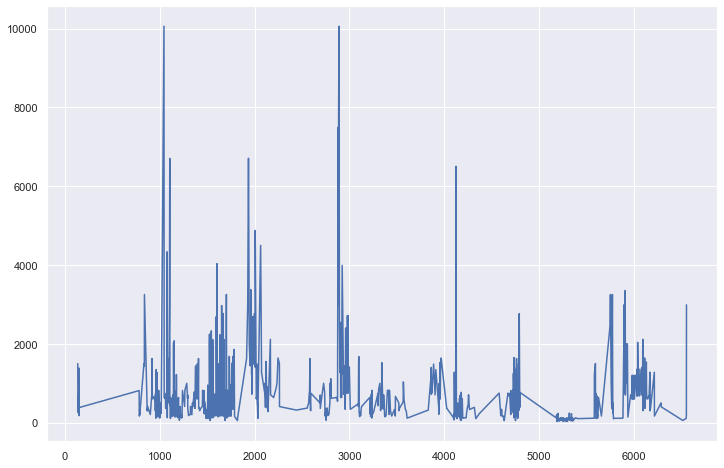

In [276]:
sns.set() 
# Grouped boxplot
plt.figure(figsize=(12,8)) # Generamos una gráfica mas grande y visible

plt.plot(ventas2020['Facturacion_neta']) 
plt.show();

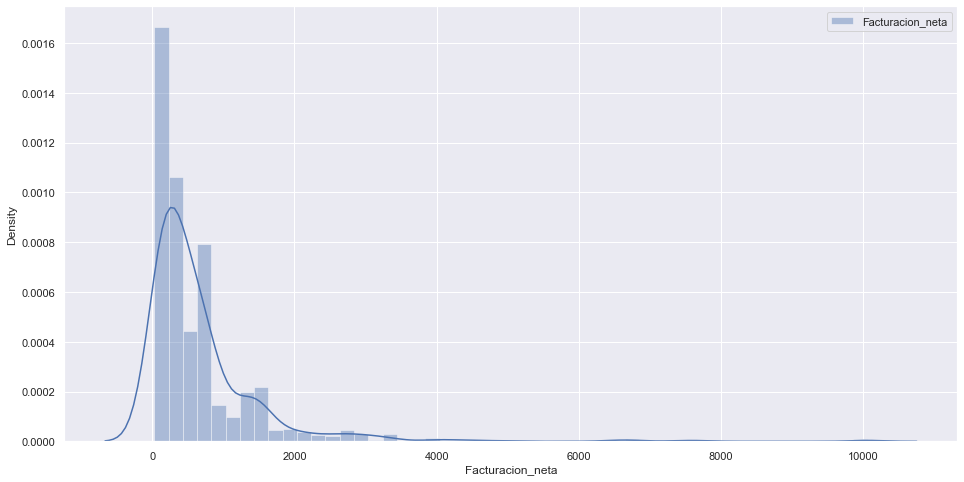

In [277]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(ventas2020["Facturacion_neta"] , label="Facturacion_neta")
plt.legend()
plt.show()

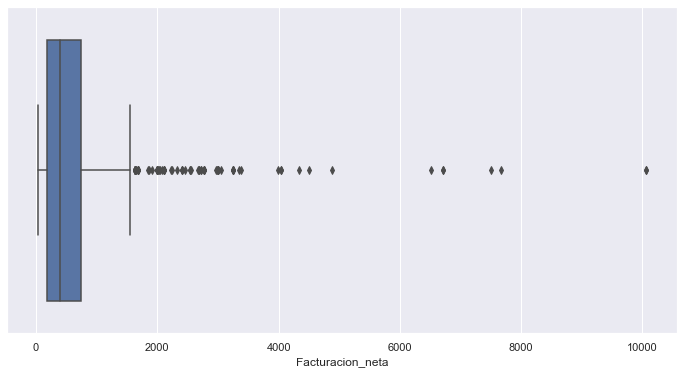

In [278]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Facturacion_neta', data=ventas2020);

Análisis descriptivo multivariado

In [279]:
pd.crosstab(ventas2020['Producto'], ventas2020['Facturacion_neta'],margins=True)

Facturacion_neta                         27.29  29.05  29.08  29.35  29.93  \
Producto                                                                     
PACK SEBASTIAN HYDRE                         0      0      0      0      0   
PACK SEBASTIAN PENETRAITT                    0      0      0      0      0   
PROFESSIONAL SEB SHINE SHAKER 75ML           0      0      0      0      0   
SEB CELLOPHANES CARAMEL BROWN 300 ML         0      0      0      0      0   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML       0      0      0      0      0   
...                                        ...    ...    ...    ...    ...   
SEBMAN PLAYER GEL 150ML                      0      1      0      0      0   
SEBMAN POMADA MODELADORA BRILLANTE 75ML      0      0      0      0      0   
SEBMAN REWORKABLE GEL 75ML                   0      0      0      0      0   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML      0      0      0      1      0   
All                                          2      1      1      1      1   

Facturacion_neta                         43.65  43.84  43.95  45.0  45.2  ...  \
Producto                                                                  ...   
PACK SEBASTIAN HYDRE                         0      0      0     0     0  ...   
PACK SEBASTIAN PENETRAITT                    0      0      0     0     0  ...   
PROFESSIONAL SEB SHINE SHAKER 75ML           0      0      0     0     0  ...   
SEB CELLOPHANES CARAMEL BROWN 300 ML         0      0      0     0     0  ...   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML       0      0      0     0     0  ...   
...                                        ...    ...    ...   ...   ...  ...   
SEBMAN PLAYER GEL 150ML                      0      0      0     0     0  ...   
SEBMAN POMADA MODELADORA BRILLANTE 75ML      0      0      0     0     0  ...   
SEBMAN REWORKABLE GEL 75ML                   0      0      0     0     0  ...   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML      1      0      0     0     0  ...   
All                                          3      1      1     2     1  ...   

Facturacion_neta                         4035.6  4335.8  4498.2  4879.44  \
Producto                                                                   
PACK SEBASTIAN HYDRE                          0       0       1        0   
PACK SEBASTIAN PENETRAITT                     0       0       0        0   
PROFESSIONAL SEB SHINE SHAKER 75ML            0       0       0        0   
SEB CELLOPHANES CARAMEL BROWN 300 ML          0       0       0        0   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML        0       0       0        0   
...                                         ...     ...     ...      ...   
SEBMAN PLAYER GEL 150ML                       0       0       0        0   
SEBMAN POMADA MODELADORA BRILLANTE 75ML       0       0       0        0   
SEBMAN REWORKABLE GEL 75ML                    0       0       0        0   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML       0       0       0        0   
All                                           2       1       1        1   

Facturacion_neta                         6505.92  6709.44  7497.0  7674.48  \
Producto                                                                     
PACK SEBASTIAN HYDRE                           0        0       1        1   
PACK SEBASTIAN PENETRAITT                      0        2       0        0   
PROFESSIONAL SEB SHINE SHAKER 75ML             0        0       0        0   
SEB CELLOPHANES CARAMEL BROWN 300 ML           0        0       0        0   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML         0        0       0        0   
...                                          ...      ...     ...      ...   
SEBMAN PLAYER GEL 150ML                        0        0       0        0   
SEBMAN POMADA MODELADORA BRILLANTE 75ML        0        0       0        0   
SEBMAN REWORKABLE GEL 75ML                     0        0       0        0   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML        0        0       0        0   
All   

In [280]:
pd.crosstab(ventas2020['Producto'], ventas2020['Cant_facturada'],margins=True).apply(lambda r: r/len(ventas2020) *100, axis=1)

Cant_facturada                                 1.0       2.0       3.0  \
Producto                                                                 
PACK SEBASTIAN HYDRE                      0.102145  0.000000  0.000000   
PACK SEBASTIAN PENETRAITT                 0.102145  0.000000  0.000000   
PROFESSIONAL SEB SHINE SHAKER 75ML        0.000000  0.102145  0.000000   
SEB CELLOPHANES CARAMEL BROWN 300 ML      0.204290  0.102145  0.102145   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML    0.102145  0.000000  0.102145   
...                                            ...       ...       ...   
SEBMAN PLAYER GEL 150ML                   0.102145  0.000000  0.000000   
SEBMAN POMADA MODELADORA BRILLANTE 75ML   0.000000  0.000000  0.000000   
SEBMAN REWORKABLE GEL 75ML                0.204290  0.000000  0.000000   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML   0.204290  0.000000  0.102145   
All                                      12.155260  3.677222  3.983657   

Cant_facturada                                 4.0       5.0       6.0  \
Producto                                                                 
PACK SEBASTIAN HYDRE                      0.000000  0.102145  0.000000   
PACK SEBASTIAN PENETRAITT                 0.000000  0.102145  0.000000   
PROFESSIONAL SEB SHINE SHAKER 75ML        0.306435  0.000000  0.000000   
SEB CELLOPHANES CARAMEL BROWN 300 ML      0.204290  0.000000  0.102145   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML    0.000000  0.000000  0.000000   
...                                            ...       ...       ...   
SEBMAN PLAYER GEL 150ML                   0.204290  0.000000  0.000000   
SEBMAN POMADA MODELADORA BRILLANTE 75ML   0.204290  0.000000  0.000000   
SEBMAN REWORKABLE GEL 75ML                0.204290  0.000000  0.000000   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML   0.000000  0.000000  0.000000   
All                                      19.918284  3.166496  3.575077   

Cant_facturada                                7.0        8.0       9.0  \
Producto                                                                 
PACK SEBASTIAN HYDRE                     0.408580   0.306435  0.000000   
PACK SEBASTIAN PENETRAITT                0.000000   0.306435  0.000000   
PROFESSIONAL SEB SHINE SHAKER 75ML       0.000000   0.102145  0.000000   
SEB CELLOPHANES CARAMEL BROWN 300 ML     0.000000   0.000000  0.102145   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML   0.000000   0.000000  0.000000   
...                                           ...        ...       ...   
SEBMAN PLAYER GEL 150ML                  0.204290   0.000000  0.000000   
SEBMAN POMADA MODELADORA BRILLANTE 75ML  0.102145   0.000000  0.000000   
SEBMAN REWORKABLE GEL 75ML               0.000000   0.000000  0.102145   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML  0.000000   0.000000  0.000000   
All                                      3.268641  12.257406  0.817160   

Cant_facturada                               10.0  ...     56.0     64.0  \
Producto                                           ...                     
PACK SEBASTIAN HYDRE                     0.000000  ...  0.00000  0.00000   
PACK SEBASTIAN PENETRAITT                0.000000  ...  0.00000  0.00000   
PROFESSIONAL SEB SHINE SHAKER 75ML       0.000000  ...  0.00000  0.00000   
SEB CELLOPHANES CARAMEL BROWN 300 ML     0.000000  ...  0.00000  0.00000   
SEB CELLOPHANES CHOCOLATE BROWN 300 ML   0.000000  ...  0.00000  0.00000   
...                                           ...  ...      ...      ...   
SEBMAN PLAYER GEL 150ML                  0.000000  ...  0.00000  0.00000   
SEBMAN POMADA MODELADORA BRILLANTE 75ML  0.000000  ...  0.00000  0.00000   
SEBMAN REWORKABLE GEL 75ML               0.000000  ...  0.00000  0.00000   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML  0.000000  ...  0.00000  0.00000   
All                                      0.306435  ...  0.20429  0.40858   

Cant_facturada                               68.0      72.0      75.0  \
Producto                                         

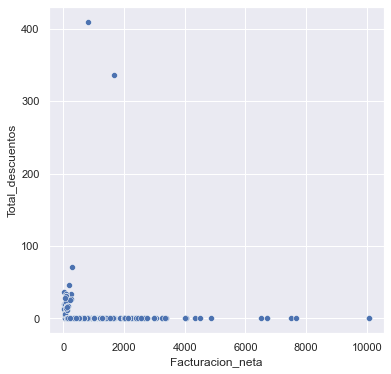

In [281]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Facturacion_neta', y=ventas2020['Total_descuentos'], data=ventas2020 )
plt.show()

<Figure size 864x576 with 0 Axes>

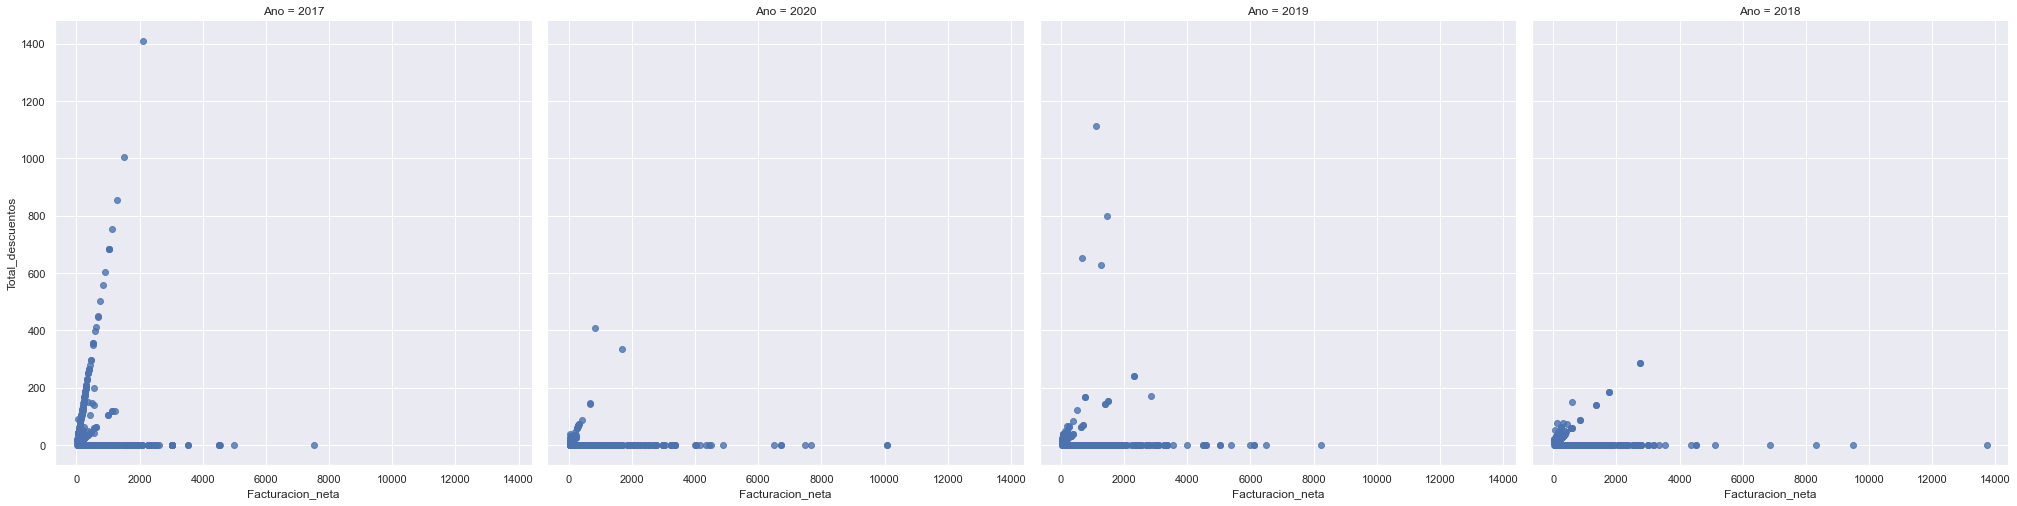

In [282]:
plt.figure(figsize=(12,8))
sns.lmplot(x='Facturacion_neta', y='Total_descuentos', data=ventas,
           fit_reg=False,
           col= 'Ano',
           col_wrap=4,
           size=7
          )   
plt.show()

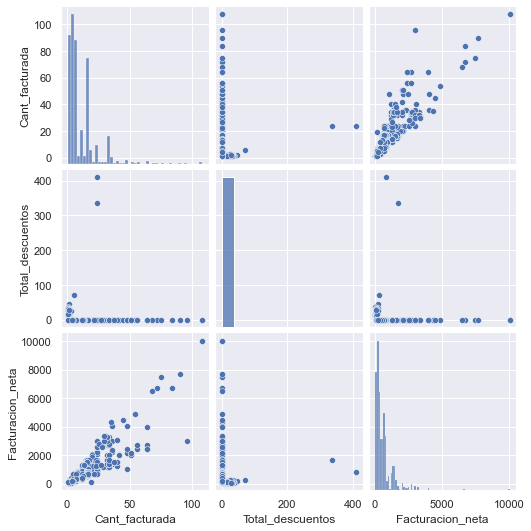

In [283]:
sns.pairplot(ventas2020[var_1]);

Gráfico de Tendencia

In [284]:
tendencia = ventas.groupby('Ano_Mes').sum()['Facturacion_neta'].reset_index()
tendencia.head(5)

Ano_Mes  Facturacion_neta
0   201701          47244.48
1   201702          38806.49
2   201703          79944.27
3   201704          52085.11
4   201705          61425.45

In [285]:
from datetime import datetime
tendencia['Ano_Mes']=tendencia['Ano_Mes'].replace("[,""]","", regex=True)
tendencia['Ano_Mes']= tendencia['Ano_Mes'].astype(str)


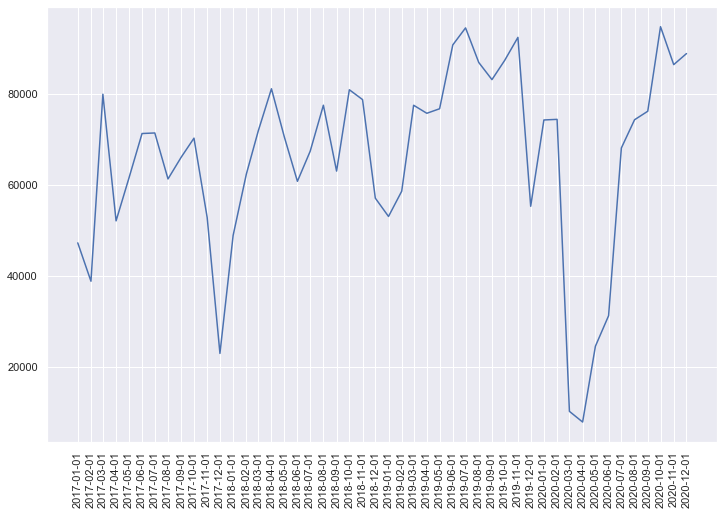

In [286]:
tendencia['Ano_Mes'] = pd.to_datetime(tendencia['Ano_Mes'], format='%Y%m')

am =tendencia['Ano_Mes'].unique()
plt.figure(figsize=(12,8))
plt.plot(am, tendencia['Facturacion_neta'])
plt.xticks(am, rotation=90)

plt.show()

Text(0, 0.5, 'Facturacion_neta')

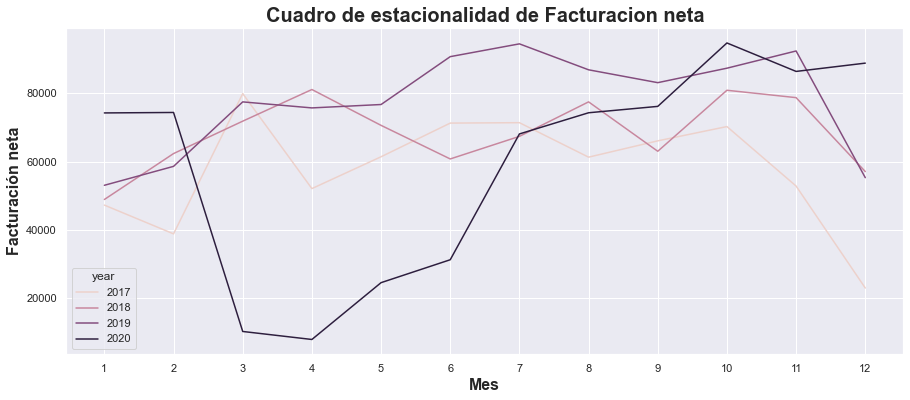

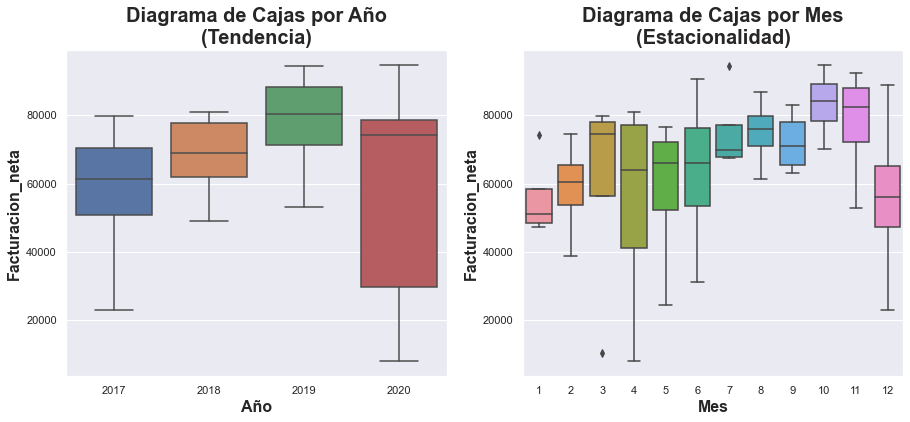

In [287]:
tendencia['year'] = tendencia['Ano_Mes'].dt.year
tendencia['month'] = tendencia['Ano_Mes'].dt.month

d = tendencia

variable = 'Facturacion_neta'
fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Cuadro de estacionalidad de Facturacion neta', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Facturación neta', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_xticks(range(1,13))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Diagrama de Cajas por Año\n(Tendencia)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Año', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Diagrama de Cajas por Mes\n(Estacionalidad)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Mes', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Facturacion_neta', fontsize = 16, fontdict=dict(weight='bold'))

In [288]:
tendencia = tendencia.set_index('Ano_Mes')

anual = tendencia.resample('Y').sum()
anual

Facturacion_neta   year  month
Ano_Mes                                   
2017-12-31         695654.42  24204     78
2018-12-31         820412.23  24216     78
2019-12-31         932247.49  24228     78
2020-12-31         711204.69  24240     78

# Modelamiento

## Featura Engineering

Ranking de productos

In [289]:
#creamos un ranking de productos en 2020
top=pd.DataFrame(ventas2020.groupby(['Ano','Producto']) [['Facturacion_neta']].sum()['Facturacion_neta'])
top=top.sort_values(by=[ 'Facturacion_neta'], ascending=False)
top.head(15)


Facturacion_neta
Ano  Producto                                               
2020 SEB POTION 9 STYL TRT 500ML                    50822.78
     PACK SEBASTIAN HYDRE                           50787.33
     PACK SEBASTIAN PENETRAITT                      41934.00
     SEB DARK OIL 95ML                              40099.14
     SEB POTION 9 STYL TRT 150ML                    34447.02
     SEB PENETRAITT SHAMPOO 1000ML                  30623.90
     SEB PENETRAITT PRO MASQUE 500ML                29875.07
     SEB PENETRAITT CONDIT. 1000ML                  27131.93
     SEB PENETRAITT MASQUE 150ml                    26277.27
     SEB HYDRE SHAMPOO 250ML                        19177.30
     SEB PENETRAITT CONDITION 250ML                 18844.47
     SEB PENETRAITT SHAMPOO 250ML                   16800.00
     SEB DARK OIL SHAMPOO 250ML                     14644.80
     SEB DARK OIL CONDITIONER 250ML                 13655.84
     SEB TWISTED MAGNIFIER STY CREAM 145ML          11838.27

In [290]:
top1=top.sort_values(by=['Facturacion_neta'], ascending=False)
top2=pd.DataFrame(top1.groupby(['Producto']) [['Facturacion_neta']].sum()['Facturacion_neta'])
top2=top2.sort_values(by=['Facturacion_neta'], ascending=False)
top2['Producto'] = top2.index
sorter=top2.index.tolist()
top3=pd.DataFrame(top1.groupby(['Producto','Ano']) [['Facturacion_neta']].sum()['Facturacion_neta'])

top3 = top3.reset_index()
sorterIndex = dict(zip(sorter, range(len(sorter))))
top3['Prod_rank'] = top3['Producto'].map(sorterIndex)
top3.sort_values('Prod_rank',
        ascending = True, inplace = True)
top3=top3.reset_index()
top3=top3.drop(columns=['index'])
top3

Producto   Ano  Facturacion_neta  Prod_rank
0              SEB POTION 9 STYL TRT 500ML  2020          50822.78          0
1                     PACK SEBASTIAN HYDRE  2020          50787.33          1
2                PACK SEBASTIAN PENETRAITT  2020          41934.00          2
3                        SEB DARK OIL 95ML  2020          40099.14          3
4              SEB POTION 9 STYL TRT 150ML  2020          34447.02          4
..                                     ...   ...               ...        ...
70      PROFESSIONAL SEB SHINE SHAKER 75ML  2020            741.51         70
71                 SEBMAN HAIR SPRAY 200ML  2020            706.61         71
72            SEBMAN ACONDICIONADOR 1000ML  2020            447.41         72
73  SEB CELLOPHANES CHOCOLATE BROWN 300 ML  2020            423.80         73
74              SEB SHINE CRAFTER WAX 50ML  2020            332.40         74

[75 rows x 4 columns]

In [291]:
#Ranking por tipo, categoria en 2020
categoria_tipo=pd.DataFrame(ventas2020.groupby(['TIPO','CATEGORIA']).sum()['Facturacion_neta'])
categoria_tipo.sort_values(['Facturacion_neta'], ascending=False)

Facturacion_neta
TIPO           CATEGORIA                   
SHAMPOO        FOUNDATION         115240.70
ACONDICIONADOR FOUNDATION          93709.36
PACK           FOUNDATION          92721.33
TRATAM         FLOW                87380.28
               FOUNDATION          78883.93
ACEITE         DARK OIL            40099.14
COLOR          COLOR               27229.15
AEROSOL        FORM                16617.54
TRATAM         FLEX                15181.64
SPRAY          FLAUNT              13858.62
SHAMPOO        FLEX                12746.62
ACONDICIONADOR FLEX                12211.87
CREMA          FLEX                11838.27
MOUSSE         FLOW                 7723.03
GEL            FORM                 6293.95
SHAMPOO        CARE                 5673.66
GEL            STYLING              5120.69
SUERO          FLOW                 3466.25
ACONDICIONADOR CARE                 2856.15
CERA           FORM                 2347.47
CREMA          FLAUNT               1940.70
TONICO         CARE                 1873.00
MOUSSE         FLEX                 1713.76
CREMA          FORM                 1498.77
ACEITE         GROOMING             1362.23
PASTA          STYLING              1071.20
BALSAMO        GROOMING             1064.50
POMADA         STYLING               803.40
AEROSOL        FLAUNT                741.51
SPRAY          STYLING               706.61
CERA           FLAUNT                332.40

Asociación de productos

In [292]:
mesaño=ventas2020
mesaño['Ano_Mes']= mesaño['Ano_Mes'].astype(str)
mesaño['id_compra']=mesaño['Solicitante']
mesaño['id_compra']=mesaño['Solicitante']+mesaño['Ano_Mes']


mesaño['Grouped'] = mesaño.groupby('id_compra')['Producto'].transform(lambda x: ','.join(x) )
mesaño=mesaño[['id_compra','Grouped']].drop_duplicates()
mesaño.head(50)

id_compra  \
135   KALIA SALON SOCIEDAD ANONIMA CERRAD202010   
136   KALIA SALON SOCIEDAD ANONIMA CERRAD202012   
782       SALCEDO BRINGAS RICARDO ENRIQUE202001   
783   MORON LOPEZ DE VILLIGER MARIA ELIZA202002   
785   MORON LOPEZ DE VILLIGER MARIA ELIZA202010   
833             CENTRO DE ESTETICA ARAMIS202002   
867   FIGUEROA VILLAR DE BALDERA NERI ROS202009   
899                 CONSTRUCTA I B S.A.C.202002   
900                 CONSTRUCTA I B S.A.C.202003   
917       INVERSIONES TOVAR QUISPE S.A.C.202006   
918       INVERSIONES TOVAR QUISPE S.A.C.202007   
921       INVERSIONES TOVAR QUISPE S.A.C.202010   
951                   HINOJOSA PEREZ GABY202007   
952                   HINOJOSA PEREZ GABY202010   
954                   HINOJOSA PEREZ GABY202008   
961       DE LA CRUZ SOTOMAYOR SAN WILSON202005   
969                          MAYEX S.A.C.202011   
1005         NVY BY NATALIE VERTIZ S.A.C.202009   
1006         NVY BY NATALIE VERTIZ S.A.C.202010   
1007         NVY BY NATALIE VERTIZ S.A.C.202012   
1010             VENUS SALON & SPA S.A.C.202006   
1044         E.M.D. SAINTS MASTERS S.A.C.202007   
1056         E.M.D. SAINTS MASTERS S.A.C.202009   
1057         E.M.D. SAINTS MASTERS S.A.C.202010   
1058         E.M.D. SAINTS MASTERS S.A.C.202012   
1074         E.M.D. SAINTS MASTERS S.A.C.202008   
1081         E.M.D. SAINTS MASTERS S.A.C.202011   
1102                 EMPHASE GROUP S.A.C.202007   
1106                 EMPHASE GROUP S.A.C.202002   
1107                 EMPHASE GROUP S.A.C.202006   
1112                 EMPHASE GROUP S.A.C.202012   
1123                 EMPHASE GROUP S.A.C.202009   
1126                 EMPHASE GROUP S.A.C.202011   
1144                 EMPHASE GROUP S.A.C.202005   
1145                 EMPHASE GROUP S.A.C.202008   
1197                          MKER S.A.C.202012   
1226                         MALUC S.A.C.202012   
1239        MATIAS MARQUEZ VICTOR AUGUSTO202010   
1262  GOZZING & VERA SOCIEDAD ANONIMA CER202009   
1284        LABORIANO VIDARTE JOSE ULISES202010   
1308        LABORIANO VIDARTE JOSE ULISES202012   
1364              GONZALES SALON SPA EIRL202009   
1449                       RG PERU S.A.C.202003   
1451                       RG PERU S.A.C.202012   
1462         SAJ PARAISO COSMETICO S.A.C.202008   
1471              STANIC PETROVIC NEVENKA202003   
1485      REPRESENTACIONES PROBELA S.A.C.202009   
1487      REPRESENTACIONES PROBELA S.A.C.202011   
1522      REPRESENTACIONES PROBELA S.A.C.202010   
1530      REPRESENTACIONES PROBELA S.A.C.202002   

                                                Grouped  
135   SEB DARK OIL 95ML,SEB TWISTED CLEANSER SHAMPOO...  
136   SEB DARK OIL 95ML,SEB DARK OIL SHAMPOO 250ML,S...  
782                         SEB POTION 9 STYL TRT 500ML  
783   SEB SUBLIMATE STYLING CREME 100ML,SEB TWISTED ...  
785         SEB SHAPER FIERCE 400ML,SEB RE-SHAPER 400ML  
833   PACK SEBASTIAN HYDRE,SEB SHAPER FIERCE 400ML,S...  
867   SEB DARK OIL SHAMPOO 250ML,SEB DARK OIL CONDIT...  
899                         SEB POTION 9 STYL TRT 150ML  
900                         SEB POTION 9 STYL TRT 150ML  
917   SEB TWISTED MAGNIFIER STY CREAM 145ML,SEB TRIL...  
918                         SEB POTION 9 STYL TRT 500ML  
921   SEB TRILLIANCE SHP 250ML,SEB TRILLIANCE CND 250ML  
951   SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
952   SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT C...  
954                       SEB PENETRAITT CONDIT. 1000ML  
961   SEB PENETRAITT SHAMPOO 1000ML,SEB PENETRAITT S...  
969   PACK SEBASTIAN HYDRE,SEB DARK OIL 95ML,SEB TWI...  
1005                        SEB POTION 9 STYL TRT 150ML  
1006                        SEB POTION 9 STYL TRT 150ML  
1007                        SEB POTION 9 STYL TRT 150ML  
1010  SEB DARK OIL 95ML,SEB PENETRAITT PRO MASQUE 50...  
1044  PACK SEBASTIAN PENETRAITT,SEB CELLOPHANES CRAN...  
1056  SEB DARK OIL SHAMPOO 250ML,SEB DARK OIL CONDIT...  
1057  SEB DARK OIL SHAMPOO 250ML,SEB DARK OI

In [293]:
#Productos que se venden juntos
from itertools import combinations
from collections import Counter

count =Counter()

for row in mesaño['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)


[(('SEB PENETRAITT SHAMPOO 250ML', 'SEB PENETRAITT CONDITION 250ML'), 25),
 (('SEB PENETRAITT SHAMPOO 1000ML', 'SEB PENETRAITT CONDIT. 1000ML'), 22),
 (('SEB DARK OIL SHAMPOO 250ML', 'SEB DARK OIL MASK 150ML'), 19),
 (('SEB PENETRAITT SHAMPOO 250ML', 'SEB POTION 9 STYL TRT 150ML'), 18),
 (('SEB DARK OIL SHAMPOO 250ML', 'SEB DARK OIL CONDITIONER 250ML'), 17),
 (('SEB PENETRAITT CONDITION 250ML', 'SEB POTION 9 STYL TRT 150ML'), 17),
 (('SEB DARK OIL 95ML', 'SEB POTION 9 STYL TRT 150ML'), 17),
 (('SEB PENETRAITT MASQUE 150ml', 'SEB POTION 9 STYL TRT 150ML'), 16),
 (('SEB HYDRE SHAMPOO 250ML', 'SEB POTION 9 STYL TRT 150ML'), 15),
 (('SEB DARK OIL 95ML', 'SEB PENETRAITT MASQUE 150ml'), 14)]

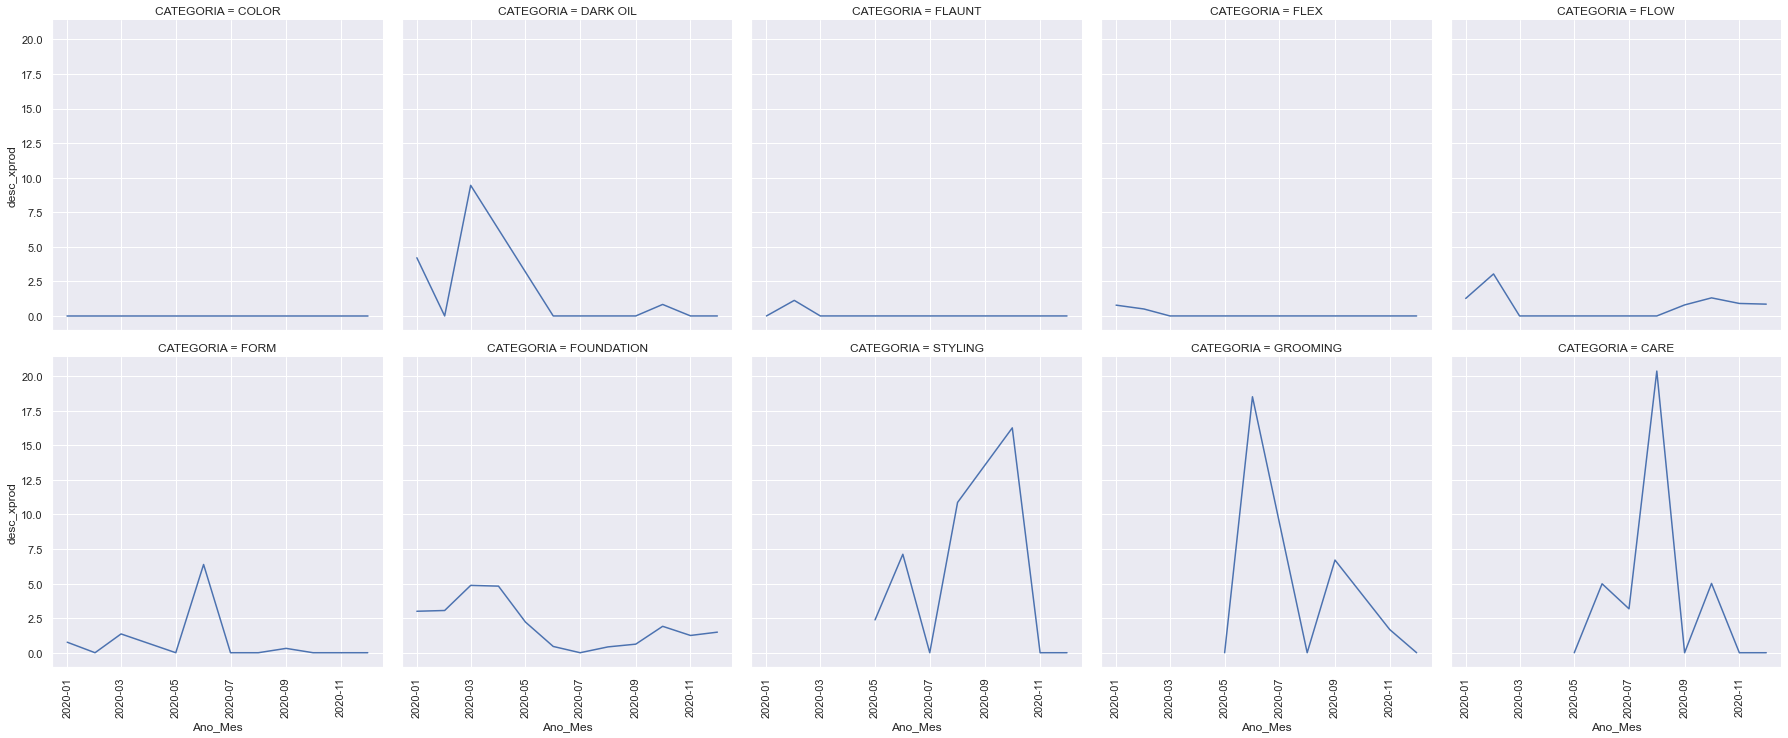

In [294]:
#creación de columna de descuento por transacción

ventas2020['desc_xprod'] = (ventas2020['precio_venta_sd']-ventas2020['precio_venta_cd'])

#Comportamiento de descuentos en 2020 pr categoria
descuentos=pd.DataFrame(ventas2020.groupby(['Ano_Mes','CATEGORIA']) [['desc_xprod','precio_venta_cd','precio_venta_sd']].mean())
descuentos=descuentos.reset_index()

descuentos['Ano_Mes']=descuentos['Ano_Mes'].replace("[,""]","", regex=True)
descuentos['Ano_Mes']= descuentos['Ano_Mes'].astype(str)
descuentos['Ano_Mes'] = pd.to_datetime(descuentos['Ano_Mes'], format='%Y%m')

descuentos=descuentos.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
desc =descuentos['Ano_Mes'].unique()



#Grafico
k = sns.FacetGrid(descuentos, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','desc_xprod', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

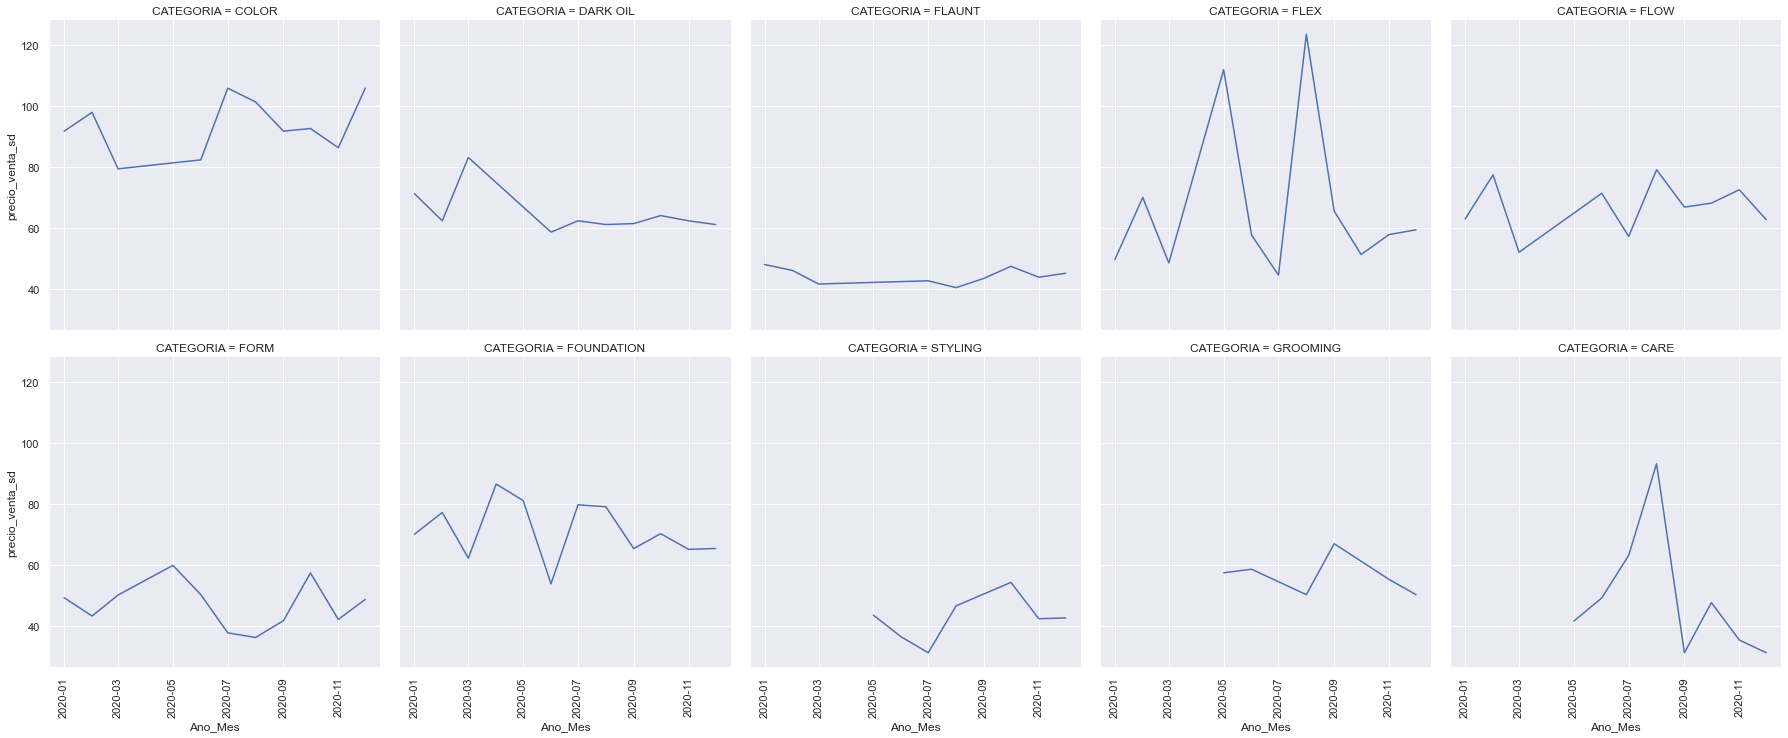

In [295]:
#Grafico de compoartamiento de precios por categoria 2020
k = sns.FacetGrid(descuentos, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','precio_venta_sd', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

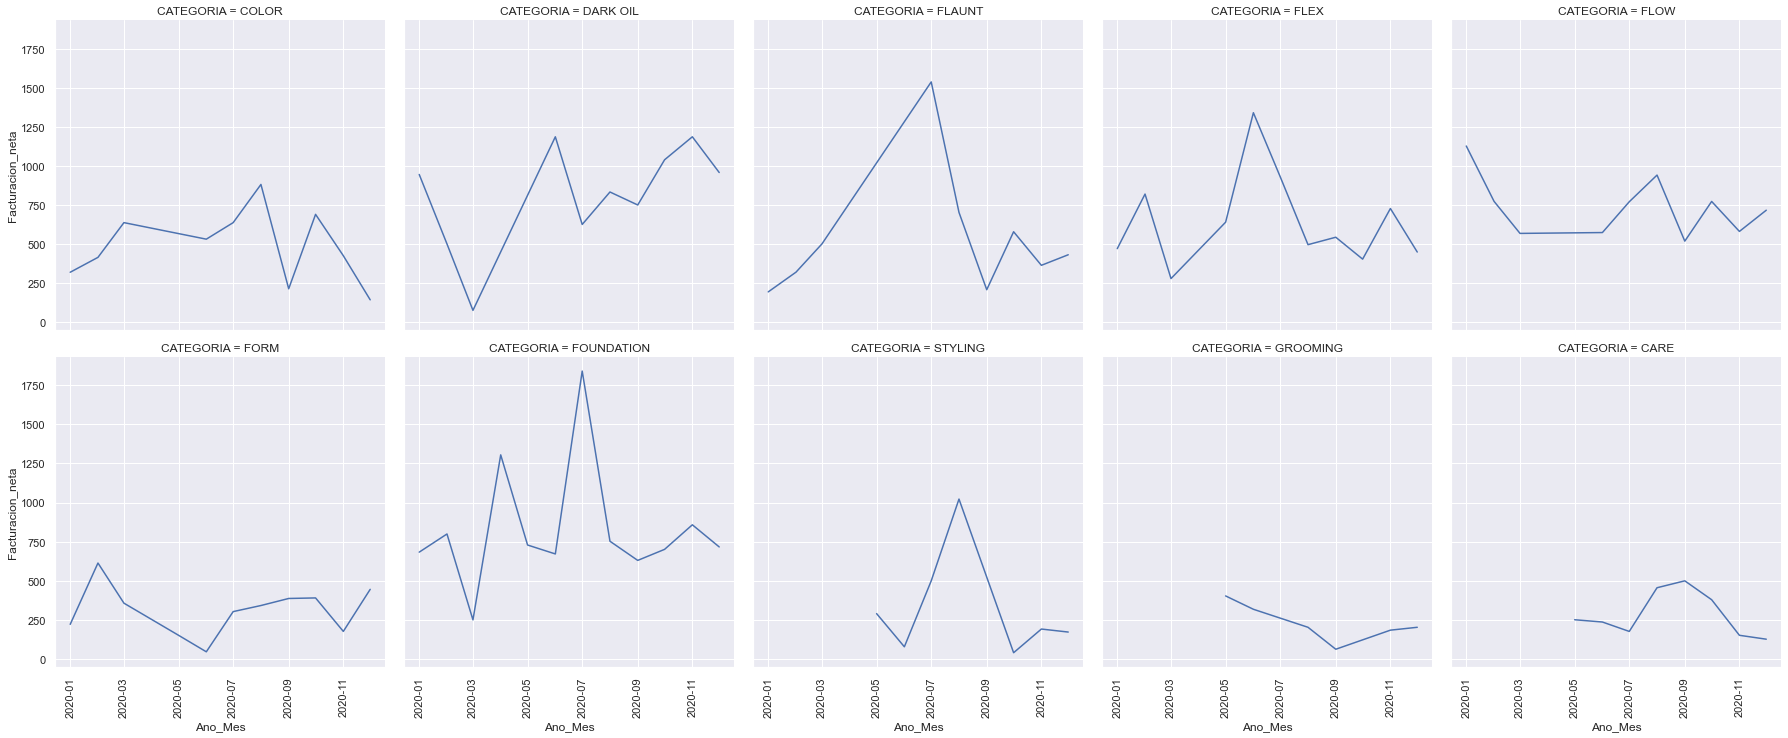

In [296]:
#Comportamiento de la facturacion neta por Categoria


ventas2020t=pd.DataFrame(ventas2020.groupby(['Ano_Mes','CATEGORIA']) [['Facturacion_neta']].mean())
ventas2020t=ventas2020t.reset_index()

ventas2020t['Ano_Mes']=ventas2020t['Ano_Mes'].replace("[,""]","", regex=True)
ventas2020t['Ano_Mes']= ventas2020t['Ano_Mes'].astype(str)
ventas2020t['Ano_Mes'] = pd.to_datetime(ventas2020t['Ano_Mes'], format='%Y%m')

ventas2020t=ventas2020t.sort_values(by=['Ano_Mes'], ascending=True).reset_index()
ven =ventas2020t['Ano_Mes'].unique()

#Comportamiento de descuentos en 2020 pr categoria


k = sns.FacetGrid(ventas2020t, col="CATEGORIA",col_wrap=5, height=5, aspect=1)
k.map(sns.lineplot,'Ano_Mes','Facturacion_neta', palette='pastel')
for axes in k.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='TIPO', ylabel='TIPO'>

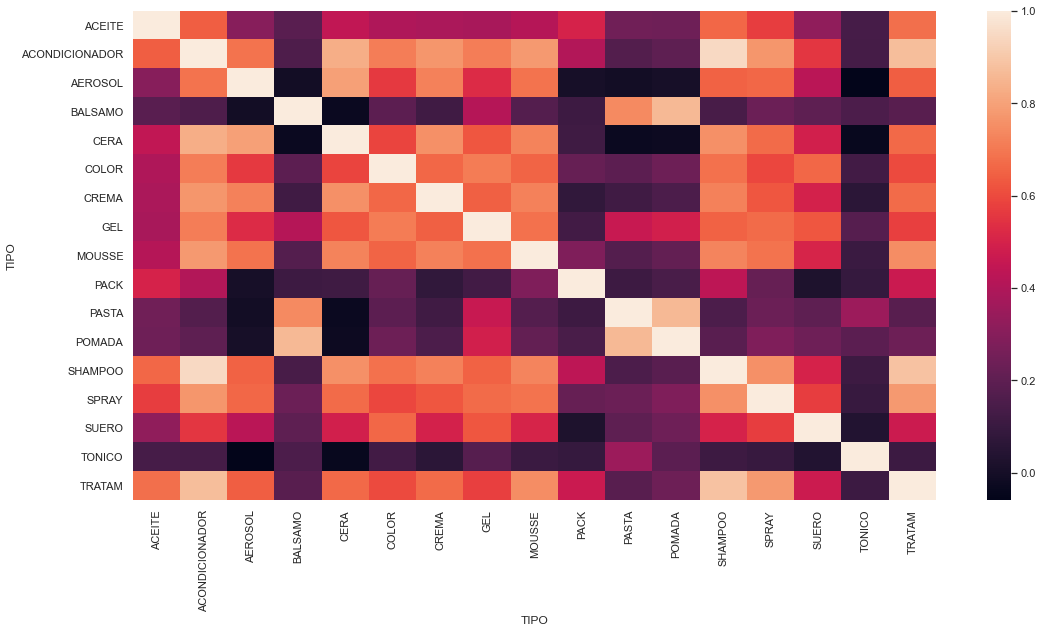

In [297]:
#Heatmap - Correlación
hm = pd.crosstab(ventas2020['Solicitante'], ventas2020['TIPO'])
hm2=hm.corr()
sns.heatmap(hm2)

array([<AxesSubplot:ylabel='Facturacion_neta'>], dtype=object)

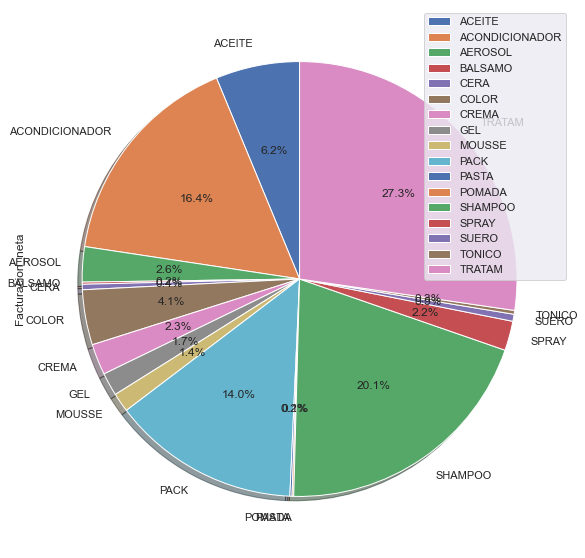

In [298]:
#Facturación total por TIPO de producto en 2020
pie_tipo=pd.DataFrame(ventas2020.groupby(['TIPO']) [['Facturacion_neta']].sum())
pie_tipo.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10),autopct='%1.1f%%')

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Of.QS F&C Arequipa to Of.QS F&C La Liberta
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Facturacion_neta  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


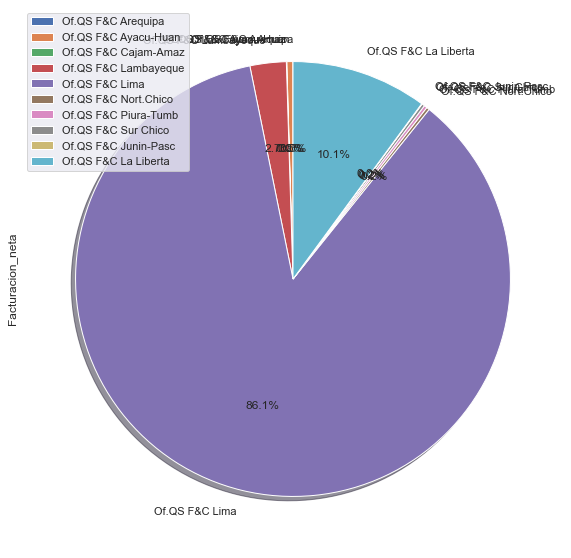

In [299]:
#Pie de facturación de ventas por oficina de ventas en 2019
pie_ubi=pd.DataFrame(ventas2020.groupby(['Oficina_ventas']) [['Facturacion_neta']].sum())
pie_ubi.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
pie_ubi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Mayoristas to Sub-distribuidores
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Facturacion_neta  3 non-null      float64
dtypes: float64(1)
memory usage: 48.0+ bytes


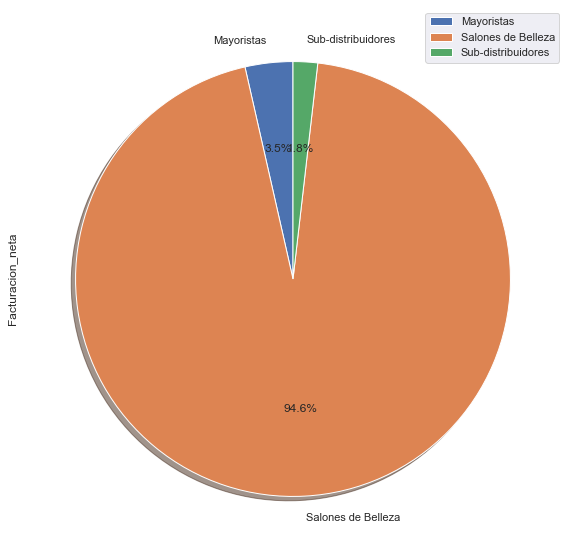

In [300]:
#Pie de facturación de ventas por canal en 2019
pie_canal=pd.DataFrame(ventas2019.groupby(['Canales']) [['Facturacion_neta']].sum())
pie_canal.plot(kind='pie',subplots=True,shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
pie_canal.info()

array([<AxesSubplot:title={'center':'None'}, xlabel='None,Ano'>],
      dtype=object)

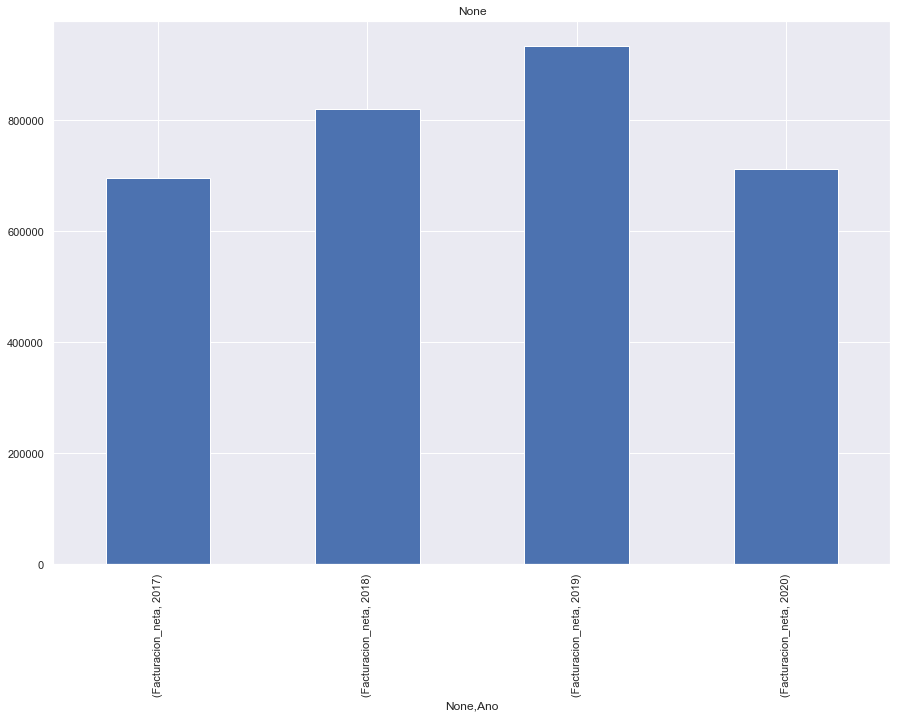

In [301]:
#facturacion neta por año
holi=pd.DataFrame(ventas.groupby(['Ano']) [['Facturacion_neta']].sum())

holi.unstack(0).plot(kind='bar',subplots=True,
figsize=(15,10))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SHAMPOO'),
  Text(1, 0, 'TRATAM'),
  Text(2, 0, 'ACONDICIONADOR'),
  Text(3, 0, 'COLOR'),
  Text(4, 0, 'ACEITE'),
  Text(5, 0, 'AEROSOL'),
  Text(6, 0, 'GEL'),
  Text(7, 0, 'PACK'),
  Text(8, 0, 'SPRAY'),
  Text(9, 0, 'CREMA')])

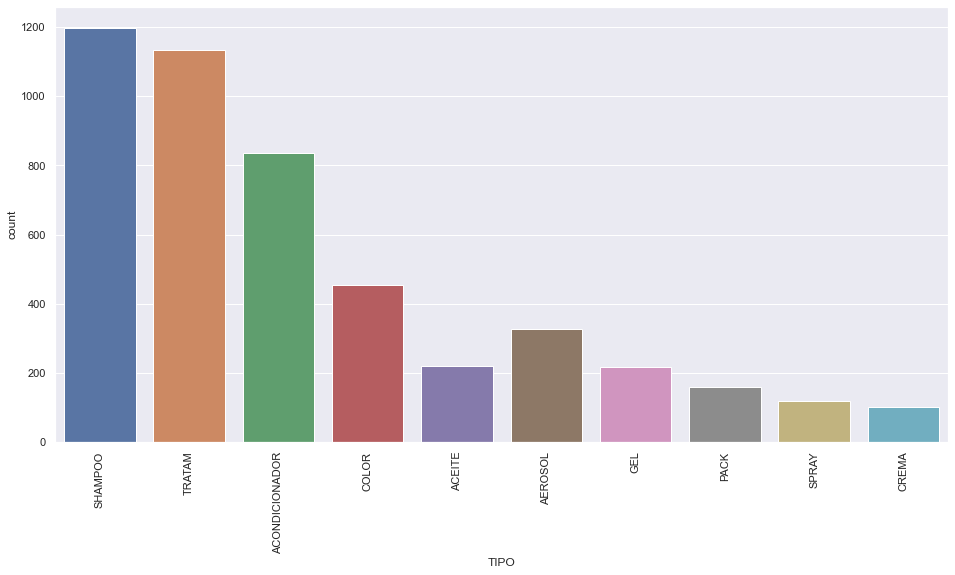

In [302]:
plt.figure(figsize=(16, 8))  
sns.countplot(x = 'TIPO', data = ventas, order = ventas2020['TIPO'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FOUNDATION'),
  Text(1, 0, 'FLOW'),
  Text(2, 0, 'FLEX'),
  Text(3, 0, 'FORM'),
  Text(4, 0, 'COLOR'),
  Text(5, 0, 'DARK OIL'),
  Text(6, 0, 'FLAUNT'),
  Text(7, 0, 'CARE'),
  Text(8, 0, 'STYLING'),
  Text(9, 0, 'GROOMING')])

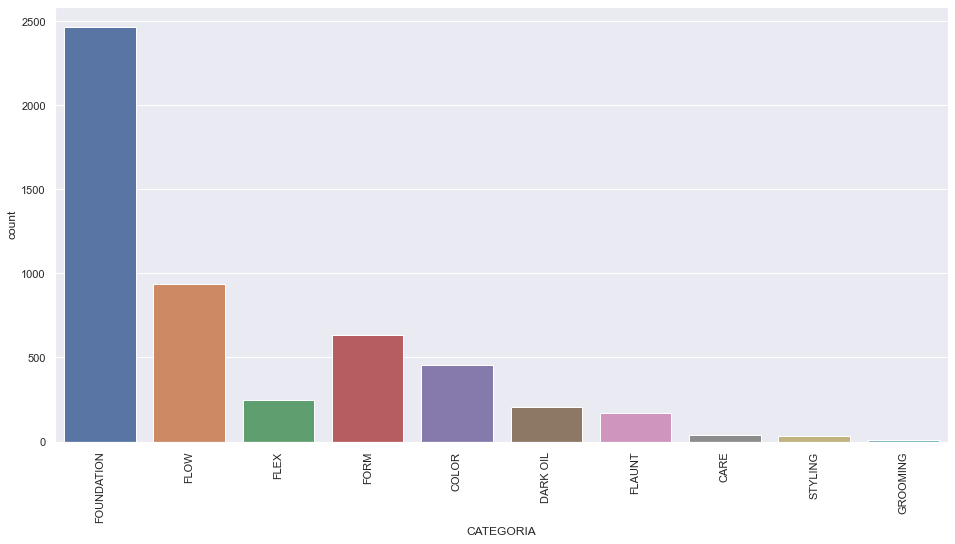

In [303]:
plt.figure(figsize=(16, 8))  
sns.countplot(x = 'CATEGORIA', data = ventas, order = ventas2020['CATEGORIA'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

### Creacion de tablas para modelo - Participacion de ventas por tipo de producto

In [304]:
prodxsolicitante=pd.DataFrame(ventas2020.groupby(['id_venta','Solicitante', 'TIPO', 'Mes','Ano_Mes']) [['Facturacion_neta']].sum())

prodxsolicitante = prodxsolicitante.fillna(0).reset_index()

In [305]:
dfaceite = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "ACEITE" ].index)
dfaceite.rename(columns={'Facturacion_neta':'Facturacion_aceite'},inplace = True)
dfaceite = dfaceite.drop(['TIPO'], axis=1) 

dfaceite.head()

id_venta                          Solicitante Mes Ano_Mes  \
6   202001364042   PRODUCCIONES GUADALUPE Y ASOCIADOS  01  202001   
20  202001430525              DELUAM SALON SPA S.R.L.  01  202001   
40  202001436014      ZAFIRO CUIDADO Y GLAMOUR S.A.C.  01  202001   
43  202001441466    (I)ARIAS IBAÑEZ JESSICA GERALDINE  01  202001   
64   20200163634  (X)GALLEGOS SALAZAR ZOILA FELICITAS  01  202001   

    Facturacion_aceite  
6               249.57  
20              998.28  
40             3993.12  
43              998.28  
64               72.62

In [306]:
dfacondicionador = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "ACONDICIONADOR" ].index)
dfacondicionador.rename(columns={'Facturacion_neta':'Facturacion_acondicionador'},inplace = True)
dfacondicionador = dfacondicionador.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfacondicionador.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 628
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    100 non-null    object 
 1   Facturacion_acondicionador  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [307]:
dfaerosol = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "AEROSOL" ].index)
dfaerosol.rename(columns={'Facturacion_neta':'Facturacion_aerosol'},inplace = True)
dfaerosol = dfaerosol.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfaerosol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 5 to 610
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             22 non-null     object 
 1   Facturacion_aerosol  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


In [308]:
dfbalsamo = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "BALSAMO" ].index)
dfbalsamo.rename(columns={'Facturacion_neta':'Facturacion_balsamo'},inplace = True)
dfbalsamo = dfbalsamo.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfbalsamo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 215 to 620
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             4 non-null      object 
 1   Facturacion_balsamo  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [309]:
dfcera = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "CERA" ].index)
dfcera.rename(columns={'Facturacion_neta':'Facturacion_cera'},inplace = True)
dfcera = dfcera.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfcera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 31 to 503
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_venta          6 non-null      object 
 1   Facturacion_cera  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


In [310]:
dfcolor = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "COLOR" ].index)
dfcolor.rename(columns={'Facturacion_neta':'Facturacion_color'},inplace = True)
dfcolor = dfcolor.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfcolor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 32 to 606
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           19 non-null     object 
 1   Facturacion_color  19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 456.0+ bytes


In [311]:
dfcrema = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "CREMA" ].index)
dfcrema.rename(columns={'Facturacion_neta':'Facturacion_crema'},inplace = True)
dfcrema = dfcrema.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfcrema.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 8 to 611
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           24 non-null     object 
 1   Facturacion_crema  24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [312]:
dfgel = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "GEL" ].index)
dfgel.rename(columns={'Facturacion_neta':'Facturacion_gel'},inplace = True)
dfgel = dfgel.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfgel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 12 to 621
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         26 non-null     object 
 1   Facturacion_gel  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


In [313]:
dfmousse = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "MOUSSE" ].index)
dfmousse.rename(columns={'Facturacion_neta':'Facturacion_mousse'},inplace = True)
dfmousse = dfmousse.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfmousse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 3 to 612
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            23 non-null     object 
 1   Facturacion_mousse  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 552.0+ bytes


In [314]:
dfpack = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "PACK" ].index)
dfpack.rename(columns={'Facturacion_neta':'Facturacion_pack'},inplace = True)
dfpack = dfpack.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfpack.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 14 to 613
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_venta          29 non-null     object 
 1   Facturacion_pack  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 696.0+ bytes


In [315]:
dfpasta = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "PASTA" ].index)
dfpasta.rename(columns={'Facturacion_neta':'Facturacion_pasta'},inplace = True)
dfpasta = dfpasta.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfpasta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 189 to 622
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           4 non-null      object 
 1   Facturacion_pasta  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [316]:
dfpomada = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "POMADA" ].index)
dfpomada.rename(columns={'Facturacion_neta':'Facturacion_pomada'},inplace = True)
dfpomada = dfpomada.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfpomada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 190 to 623
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            3 non-null      object 
 1   Facturacion_pomada  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 72.0+ bytes


In [317]:
dfshampoo = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SHAMPOO" ].index)
dfshampoo.rename(columns={'Facturacion_neta':'Facturacion_shampoo'},inplace = True)
dfshampoo = dfshampoo.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfshampoo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 9 to 629
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_venta             134 non-null    object 
 1   Facturacion_shampoo  134 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [318]:
dfspray = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SPRAY" ].index)
dfspray.rename(columns={'Facturacion_neta':'Facturacion_spray'},inplace = True)
dfspray = dfspray.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfspray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 37 to 625
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           30 non-null     object 
 1   Facturacion_spray  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [319]:
dfsuero = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "SUERO" ].index)
dfsuero.rename(columns={'Facturacion_neta':'Facturacion_suero'},inplace = True)
dfsuero = dfsuero.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dfsuero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 123 to 616
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_venta           11 non-null     object 
 1   Facturacion_suero  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


In [320]:
dftonico = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "TONICO" ].index)
dftonico.rename(columns={'Facturacion_neta':'Facturacion_tonico'},inplace = True)
dftonico = dftonico.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dftonico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 219 to 545
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            7 non-null      object 
 1   Facturacion_tonico  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


In [321]:
dftratam = prodxsolicitante.drop(prodxsolicitante[prodxsolicitante['TIPO'] != "TRATAM" ].index)
dftratam.rename(columns={'Facturacion_neta':'Facturacion_tratam'},inplace = True)
dftratam = dftratam.drop(['TIPO','Solicitante','Mes','Ano_Mes'], axis=1)

dftratam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 617
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_venta            138 non-null    object 
 1   Facturacion_tratam  138 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [322]:
comport = pd.merge(left=dfaceite,right=dfacondicionador, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfaerosol, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfbalsamo, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcera, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcolor, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfcrema, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfgel, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfmousse, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpack, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpasta, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfpomada, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfshampoo, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfspray, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dfsuero, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dftonico, how='left', left_on='id_venta', right_on='id_venta') 
comport = pd.merge(left=comport,right=dftratam, how='left', left_on='id_venta', right_on='id_venta') 
comport["Facturacion_total"]= comport.iloc[:,6:24].sum(axis=1)
comport = comport.fillna(0)
comport.describe()

Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
count           50.000000                   50.000000            50.000000   
mean           829.227400                  909.596400            43.199000   
std            766.095533                 1799.492098           144.891596   
min             29.930000                    0.000000             0.000000   
25%            249.570000                    0.000000             0.000000   
50%            499.140000                  344.940000             0.000000   
75%            998.280000                  805.155000             0.000000   
max           3993.120000                11170.050000           671.310000   

       Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
count            50.000000         50.000000          50.000000   
mean              8.034000         21.525600         177.996000   
std              39.757989        106.524094         574.934047   
min               0.000000          0.000000           0.000000   
25%               0.000000          0.000000           0.000000   
50%               0.000000          0.000000           0.000000   
75%               0.000000          0.000000           0.000000   
max             200.850000        538.140000        2542.800000   

       Facturacion_crema  Facturacion_gel  Facturacion_mousse  \
count          50.000000        50.000000           50.000000   
mean          103.696200        56.269600           49.099400   
std           254.415981       146.918625          159.977559   
min             0.000000         0.000000            0.000000   
25%             0.000000         0.000000            0.000000   
50%             0.000000         0.000000            0.000000   
75%             0.000000         0.000000            0.000000   
max          1136.880000       650.880000          842.370000   

       Facturacion_pack  Facturacion_pasta  Facturacion_pomada  \
count         50.000000          50.000000           50.000000   
mean         148.072000          21.424000           16.068000   
std          467.381138          77.038526           68.382971   
min            0.000000           0.000000            0.000000   
25%            0.000000           0.000000            0.000000   
50%            0.000000           0.000000            0.000000   
75%            0.000000           0.000000            0.000000   
max         2558.160000         401.700000          401.700000   

       Facturacion_shampoo  Facturacion_spray  Facturacion_suero  \
count            50.000000          50.000000          50.000000   
mean           1155.716400         170.870200          27.025000   
std            2045.877755         335.568967          80.685002   
min               0.000000           0.000000           0.000000   
25%               0.000000           0.000000           0.000000   
50%             524.735000           0.000000           0.000000   
75%            1311.450000         192.120000           0.000000   
max           12834.510000        1536.960000         352.500000   

       Facturacion_tonico  Facturacion_tratam  Facturacion_total  
count           50.000000           50.000000          50.000000  
mean            11.587000         1363.062800        3373.645200  
std             60.042246         1778.001056        4681.058872  
min              0.000000            0.000000           0.000000  
25%              0.000000            0.000000         430.740000  
50%              0.000000          653.640000        2131.245000  
75%              0.000000         2170.570000        4490.735000  
max            400.000000         7860.960000       28223.790000

In [323]:
comport = comport.drop(['Solicitante'], axis=1) #borramos columnas que no nocesitamos

In [324]:
#creamos la columna de venta top en la que este en el quartil superior de facturacion de venta
percentil = comport['Facturacion_total'].quantile( .75)

comport.loc[comport['Facturacion_total'] >= percentil, 'top'] = '1'
comport.loc[comport['Facturacion_total'] < percentil, 'top'] = '0'
comport['top'] = comport['top'].astype(int)


comport.head()

id_venta Mes Ano_Mes  Facturacion_aceite  Facturacion_acondicionador  \
0  202001364042  01  202001              249.57                      509.31   
1  202001430525  01  202001              998.28                      371.64   
2  202001436014  01  202001             3993.12                     4202.88   
3  202001441466  01  202001              998.28                        0.00   
4   20200163634  01  202001               72.62                        0.00   

   Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0                 0.00                  0.0               0.0   
1                59.83                  0.0               0.0   
2                 0.00                  0.0               0.0   
3                 0.00                  0.0               0.0   
4                 0.00                  0.0               0.0   

   Facturacion_color  Facturacion_crema  ...  Facturacion_pack  \
0                0.0             194.07  ...               0.0   
1                0.0             776.28  ...               0.0   
2                0.0               0.00  ...               0.0   
3             2542.8             776.28  ...               0.0   
4                0.0               0.00  ...               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0                450.0   
1                0.0                 0.0                336.3   
2                0.0                 0.0               2400.0   
3                0.0                 0.0               1210.2   
4                0.0                 0.0                  0.0   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0                0.0                0.0                 0.0   
1                0.0                0.0                 0.0   
2                0.0                0.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 0.0   

   Facturacion_tratam  Facturacion_total  top  
0              615.24            1259.31    0  
1              381.33            1720.27    0  
2                0.00            2400.00    0  
3             5959.08           10488.36    1  
4                0.00               0.00    0  

[5 rows x 22 columns]

In [325]:
comport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_venta                    50 non-null     object 
 1   Mes                         50 non-null     object 
 2   Ano_Mes                     50 non-null     object 
 3   Facturacion_aceite          50 non-null     float64
 4   Facturacion_acondicionador  50 non-null     float64
 5   Facturacion_aerosol         50 non-null     float64
 6   Facturacion_balsamo         50 non-null     float64
 7   Facturacion_cera            50 non-null     float64
 8   Facturacion_color           50 non-null     float64
 9   Facturacion_crema           50 non-null     float64
 10  Facturacion_gel             50 non-null     float64
 11  Facturacion_mousse          50 non-null     float64
 12  Facturacion_pack            50 non-null     float64
 13  Facturacion_pasta           50 non-nu

### Creacion de tablas para modelo - Precio por producto por compra

In [326]:
comport_fact=comport

In [327]:
fact_tx=pd.DataFrame(comport_fact.groupby(['id_venta']) ['Facturacion_total'].sum())
fact_tx.reset_index()

id_venta  Facturacion_total
0   202001364042            1259.31
1   202001430525            1720.27
2   202001436014            2400.00
3   202001441466           10488.36
4    20200163634               0.00
5   202001805508             118.33
6   202001806312               0.00
7   202002418096             646.02
8   202002431290            1363.62
9    20200338219               0.00
10   20200338929               0.00
11  202005453215            6399.06
12  202006426902            3927.96
13  202006430945             993.34
14  202006445324            3048.72
15  202006454794            2784.57
16   20200653709              56.64
17  202007426902            2125.32
18  202007454934               0.00
19  202008426902            6415.88
20  202008431290            3757.02
21  202008445808            3252.96
22  202008453215            4772.82
23  202009323018             305.10
24  202009410761            7375.28
25  202009426902            2622.96
26  202009454794            7334.52
27   20201012471             358.98
28  202010336777            2250.37
29  202010356384            2248.08
30  202010410761           10061.64
31  202010422953             970.68
32  202010426902            4527.96
33  202010449167            2630.22
34  202010454934               0.00
35  202010457220            5090.55
36  202010800919               0.00
37  202011323018            1097.00
38  202011410761           28223.79
39  202011426848            8656.29
40  202011449167            1991.80
41  202011456723             791.57
42  202011804644               0.00
43   20201212471            8059.35
44  202012426902           10189.92
45  202012431220             672.60
46  202012457220            2137.17
47  202012457685               0.00
48  202012457933            4379.06
49  202012457978            1177.17

In [328]:
#creamos la columna de venta top en la que este en el quartil superior de facturacion de venta
percentil = fact_tx['Facturacion_total'].quantile( .75)

fact_tx.loc[fact_tx['Facturacion_total'] >= percentil, 'top'] = '1'
fact_tx.loc[fact_tx['Facturacion_total'] < percentil, 'top'] = '0'
fact_tx['top'] = fact_tx['top'].astype(int)


fact_tx.head()

Facturacion_total  top
id_venta                            
202001364042            1259.31    0
202001430525            1720.27    0
202001436014            2400.00    0
202001441466           10488.36    1
20200163634                0.00    0

In [329]:
ventas2020.head()

Oficina_ventas     Nombre_Supervisor      Nombre_Vendedor  \
135  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
136  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
137  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
139  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   
140  Of.QS F&C Lima  VIRGINIA LUCIA BAYLY  DANIEL ALONSO TELLO   

    Cod_solicitante                          Solicitante Cod_producto  \
135          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       261918   
136          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       261918   
137          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       273205   
139          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       279477   
140          457220  KALIA SALON SOCIEDAD ANONIMA CERRAD       279477   

                            Producto Mes   Ano Cod_tratamiento  ...  \
135                SEB DARK OIL 95ML  10  2020              AR  ...   
136                SEB DARK OIL 95ML  12  2020              AR  ...   
137  SEB TWISTED CLEANSER SHAMPOO 1L  10  2020              AR  ...   
139       SEB DARK OIL SHAMPOO 250ML  10  2020              AR  ...   
140       SEB DARK OIL SHAMPOO 250ML  12  2020              AR  ...   

    Facturacion_neta   CATEGORIA     TIPO  Ano_Mes      id_venta  \
135          1497.42    DARK OIL   ACEITE   202010  202010457220   
136           998.28    DARK OIL   ACEITE   202012  202012457220   
137           370.92        FLEX  SHAMPOO   202010  202010457220   
139           254.25  FOUNDATION  SHAMPOO   202010  202010457220   
140           661.05  FOUNDATION  SHAMPOO   202012  202012457220   

    precio_venta_cd precio_venta_sd  \
135       62.392500       62.392500   
136       58.722353       58.722353   
137       92.730000       92.730000   
139       50.850000       50.850000   
140       34.792105       34.792105   

                                     id_compra  \
135  KALIA SALON SOCIEDAD ANONIMA CERRAD202010   
136  KALIA SALON SOCIEDAD ANONIMA CERRAD202012   
137  KALIA SALON SOCIEDAD ANONIMA CERRAD202010   
139  KALIA SALON SOCIEDAD ANONIMA CERRAD202010   
140  KALIA SALON SOCIEDAD ANONIMA CERRAD202012   

                                               Grouped  desc_xprod  
135  SEB DARK OIL 95ML,SEB TWISTED CLEANSER SHAMPOO...         0.0  
136  SEB DARK OIL 95ML,SEB DARK OIL SHAMPOO 250ML,S...         0.0  
137  SEB DARK OIL 95ML,SEB TWISTED CLEANSER SHAMPOO...         0.0  
139  SEB DARK OIL 95ML,SEB TWISTED CLEANSER SHAMPOO...         0.0  
140  SEB DARK OIL 95ML,SEB DARK OIL SHAMPOO 250ML,S...         0.0  

[5 rows x 23 columns]

In [330]:
fact_tx_c=pd.DataFrame(ventas2020.groupby(['id_venta', 'CATEGORIA']) ['Facturacion_neta'].sum())
fact_tx_c = fact_tx_c.fillna(0).reset_index()

pre_tx_p=pd.DataFrame(ventas2020.groupby(['id_venta', 'Producto', 'Ano_Mes']) ['precio_venta_cd'].mean())
pre_tx_p = pre_tx_p.fillna(0).reset_index()



len(pre_tx_p.Producto.unique())

75

In [331]:
fact_tx_c = pd.merge(left=fact_tx_c,right=fact_tx, how='left', left_on='id_venta', right_on='id_venta') #agregamos columnas del maestro de productos
pre_tx_p = pd.merge(left=pre_tx_p,right=fact_tx, how='left', left_on='id_venta', right_on='id_venta') #agregamos columnas del maestro de productos


In [332]:
txprecios  =pd.pivot_table(pre_tx_p,
               index=['id_venta', 'top', 'Facturacion_total'],
               columns=['Producto'],
               fill_value=0
              )


txprecios

precio_venta_cd  \
Producto                           PACK SEBASTIAN HYDRE   
id_venta     top Facturacion_total                        
202001364042 0.0 1259.31                       0.000000   
202001430525 0.0 1720.27                       0.000000   
202001436014 0.0 2400.00                       0.000000   
202001441466 1.0 10488.36                      0.000000   
20200163634  0.0 0.00                          0.000000   
202001805508 0.0 118.33                        0.000000   
202001806312 0.0 0.00                          0.000000   
202002418096 0.0 646.02                        0.000000   
202002431290 0.0 1363.62                       0.000000   
20200338219  0.0 0.00                          0.000000   
20200338929  0.0 0.00                          0.000000   
202005453215 1.0 6399.06                       0.000000   
202006426902 0.0 3927.96                       0.000000   
202006430945 0.0 993.34                        0.000000   
202006445324 0.0 3048.72                       0.000000   
202006454794 0.0 2784.57                       0.000000   
20200653709  0.0 56.64                         0.000000   
202007426902 0.0 2125.32                       0.000000   
202007454934 0.0 0.00                          0.000000   
202008426902 1.0 6415.88                      93.712500   
202008431290 0.0 3757.02                       0.000000   
202008445808 0.0 3252.96                       0.000000   
202008453215 1.0 4772.82                       0.000000   
202009323018 0.0 305.10                        0.000000   
202009410761 1.0 7375.28                       0.000000   
202009426902 0.0 2622.96                       0.000000   
202009454794 1.0 7334.52                       0.000000   
20201012471  0.0 358.98                        0.000000   
202010336777 0.0 2250.37                       0.000000   
202010356384 0.0 2248.08                       0.000000   
202010410761 1.0 10061.64                      0.000000   
202010422953 0.0 970.68                        0.000000   
202010426902 1.0 4527.96                       0.000000   
202010449167 0.0 2630.22                       0.000000   
202010454934 0.0 0.00                          0.000000   
202010457220 1.0 5090.55                       0.000000   
202010800919 0.0 0.00                          0.000000   
202011323018 0.0 1097.00                      91.362857   
202011410761 1.0 28223.79                      0.000000   
202011426848 1.0 8656.29                      85.272000   
202011449167 0.0 1991.80                       0.000000   
202011456723 0.0 791.57                        0.000000   
202011804644 0.0 0.00                          0.000000   
20201212471  1.0 8059.35                       0.000000   
202012426902 1.0 10189.92                     91.362857   
202012431220 0.0 672.60                        0.000000   
202012457220 0.0 2137.17                       0.000000   
202012457685 0.0 0.00                          0.000000   
202012457933 0.0 4379.06                      91.362857   
202012457978 0.0 1177.17                       0.000000   

                                                              \
Producto                           PACK SEBASTIAN PENETRAITT   
id_venta     top Facturacion_total                             
202001364042 0.0 1259.31                               0.000   
202001430525 0.0 1720.27                               0.000   
202001436014 0.0 2400.00                               0.000   
202001441466 1.0 10488.36                              0.000   
20200163634  0.0 0.00                                  0.000   
202001805508 0.0 118.33                                0.000   
202001806312 0.0 0.00                                  0.000   
202002418096 0.0 646.02                                0.000   
202002431290 0.0 1363.62                               0.000   
20200338219  0.0 0.00                                  0.000   
20200338929  0.0 0.00                                  0.000   
202005453215 1.0

In [333]:
txpreciosam  =pd.pivot_table(pre_tx_p,
               index=['id_venta', 'top','Ano_Mes','Facturacion_total'],
               columns=['Producto'],
               fill_value=0
              )


txpreciosam

precio_venta_cd  \
Producto                                   PACK SEBASTIAN HYDRE   
id_venta     top Ano_Mes Facturacion_total                        
202001364042 0.0 202001  1259.31                       0.000000   
202001430525 0.0 202001  1720.27                       0.000000   
202001436014 0.0 202001  2400.00                       0.000000   
202001441466 1.0 202001  10488.36                      0.000000   
20200163634  0.0 202001  0.00                          0.000000   
202001805508 0.0 202001  118.33                        0.000000   
202001806312 0.0 202001  0.00                          0.000000   
202002418096 0.0 202002  646.02                        0.000000   
202002431290 0.0 202002  1363.62                       0.000000   
20200338219  0.0 202003  0.00                          0.000000   
20200338929  0.0 202003  0.00                          0.000000   
202005453215 1.0 202005  6399.06                       0.000000   
202006426902 0.0 202006  3927.96                       0.000000   
202006430945 0.0 202006  993.34                        0.000000   
202006445324 0.0 202006  3048.72                       0.000000   
202006454794 0.0 202006  2784.57                       0.000000   
20200653709  0.0 202006  56.64                         0.000000   
202007426902 0.0 202007  2125.32                       0.000000   
202007454934 0.0 202007  0.00                          0.000000   
202008426902 1.0 202008  6415.88                      93.712500   
202008431290 0.0 202008  3757.02                       0.000000   
202008445808 0.0 202008  3252.96                       0.000000   
202008453215 1.0 202008  4772.82                       0.000000   
202009323018 0.0 202009  305.10                        0.000000   
202009410761 1.0 202009  7375.28                       0.000000   
202009426902 0.0 202009  2622.96                       0.000000   
202009454794 1.0 202009  7334.52                       0.000000   
20201012471  0.0 202010  358.98                        0.000000   
202010336777 0.0 202010  2250.37                       0.000000   
202010356384 0.0 202010  2248.08                       0.000000   
202010410761 1.0 202010  10061.64                      0.000000   
202010422953 0.0 202010  970.68                        0.000000   
202010426902 1.0 202010  4527.96                       0.000000   
202010449167 0.0 202010  2630.22                       0.000000   
202010454934 0.0 202010  0.00                          0.000000   
202010457220 1.0 202010  5090.55                       0.000000   
202010800919 0.0 202010  0.00                          0.000000   
202011323018 0.0 202011  1097.00                      91.362857   
202011410761 1.0 202011  28223.79                      0.000000   
202011426848 1.0 202011  8656.29                      85.272000   
202011449167 0.0 202011  1991.80                       0.000000   
202011456723 0.0 202011  791.57                        0.000000   
202011804644 0.0 202011  0.00                          0.000000   
20201212471  1.0 202012  8059.35                       0.000000   
202012426902 1.0 202012  10189.92                     91.362857   
202012431220 0.0 202012  672.60                        0.000000   
202012457220 0.0 202012  2137.17                       0.000000   
202012457685 0.0 202012  0.00                          0.000000   
202012457933 0.0 202012  4379.06                      91.362857   
202012457978 0.0 202012  1177.17                       0.000000   

                                                                      \
Producto                                   PACK SEBASTIAN PENETRAITT   
id_venta     top Ano_Mes Facturacion_total                             
202001364042 0.0 202001  1259.31                               0.000   
202001430525 0.0 202001  1720.27                               0.000   
202001436014 0.0 202001  2400.00                               0.000   
202001441466 1.0 202001  10488.36                              0

In [334]:
txprecios.columns = txprecios.columns.droplevel(0)
txprecios.columns.name = None            
txprecios = txprecios.reset_index()

In [335]:
txpreciosam.columns = txpreciosam.columns.droplevel(0)
txpreciosam.columns.name = None            
txpreciosam = txpreciosam.reset_index()

In [336]:
txprecios.head()

id_venta  top  Facturacion_total  PACK SEBASTIAN HYDRE  \
0  202001364042  0.0            1259.31                   0.0   
1  202001430525  0.0            1720.27                   0.0   
2  202001436014  0.0            2400.00                   0.0   
3  202001441466  1.0           10488.36                   0.0   
4   20200163634  0.0               0.00                   0.0   

   PACK SEBASTIAN PENETRAITT  PROFESSIONAL SEB SHINE SHAKER 75ML  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   

   SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.000   
1                                 0.000   
2                                 0.000   
3                                52.975   
4                                 0.000   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                 105.95   
4                                   0.00   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  ...  SEBMAN ACONDICIONADOR 250ML  \
0                                  0.0000  ...                          0.0   
1                                  0.0000  ...                          0.0   
2                                  0.0000  ...                          0.0   
3                                 79.4625  ...                          0.0   
4                                  0.0000  ...                          0.0   

   SEBMAN BALSAMO AFTER SHAVE 150ML  SEBMAN HAIR SPRAY 200ML  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   

   SEBMAN MULTITASKER SHAMP 3EN1 1000ML  SEBMAN MULTITASKER SHAMP 3EN1 250ML  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   SEBMAN PASTA FIJADORA CLAY MATTE 75ML  SEBMAN PLAYER GEL 150ML  \
0                                    0.0                      0.0   
1                                    0.0                      0.0   
2                                    0.0                      0.0   
3                                    0.0                      0.0   
4                                    0.0                      0.0   

   SEBMAN POMADA MODELADORA BRILLANTE 75ML  SEBMAN REWORKABLE GEL 75ML  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                         0.0   

   SEBMAN TONICO CAPILAR REFRESCANTE 100ML  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                              

# Machine Learning 

In [337]:
!pip install mlxtend

In [338]:
#importamos librerias adicionales

import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

## Basket Case

In [339]:
#Adecuamos el dataset para generar un valor dummy que sean 1 o 0
df = ventas2020.groupby(['id_venta','CATEGORIA']).size().reset_index(name='count')
basket = (df.groupby(['id_venta', 'CATEGORIA'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id_venta'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [340]:
basket_sets

CATEGORIA     CARE  COLOR  DARK OIL  FLAUNT  FLEX  FLOW  FORM  FOUNDATION  \
id_venta                                                                    
202001312562     0      0         0       0     0     1     0           0   
202001323018     0      0         0       0     0     1     0           0   
202001333423     0      0         0       0     0     1     0           0   
202001356384     0      0         0       0     0     1     0           0   
20200136107      0      0         0       0     0     0     1           0   
...            ...    ...       ...     ...   ...   ...   ...         ...   
202012457978     1      0         0       0     0     0     0           0   
20201247645      0      0         0       0     0     0     0           1   
202012805066     0      0         0       0     0     0     0           1   
202012809210     0      0         0       0     0     0     0           1   
202012809287     0      0         0       0     0     0     0           1   

CATEGORIA     GROOMING  STYLING  
id_venta                         
202001312562         0        0  
202001323018         0        0  
202001333423         0        0  
202001356384         0        0  
20200136107          0        0  
...                ...      ...  
202012457978         1        1  
20201247645          0        0  
202012805066         0        0  
202012809210         0        0  
202012809287         0        0  

[244 rows x 10 columns]

Apriori Reglas de asociación

In [341]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

antecedents             consequents  \
386            (FLOW, COLOR, FLAUNT)            (FOUNDATION)   
288            (FLOW, COLOR, FLAUNT)              (DARK OIL)   
470         (FLOW, DARK OIL, FLAUNT)            (FOUNDATION)   
276  (STYLING, GROOMING, FOUNDATION)                  (CARE)   
484           (FLOW, DARK OIL, FORM)                  (FLEX)   
485           (FLEX, DARK OIL, FORM)                  (FLOW)   
498           (FLOW, FLEX, DARK OIL)            (FOUNDATION)   
512     (DARK OIL, FOUNDATION, FORM)                  (FLEX)   
50                      (CARE, FLEX)            (FOUNDATION)   
652              (FLOW, FLEX, COLOR)  (DARK OIL, FOUNDATION)   

     antecedent support  consequent support   support  confidence       lift  \
386            0.012295            0.668033  0.012295         1.0   1.496933   
288            0.012295            0.180328  0.012295         1.0   5.545455   
470            0.045082            0.668033  0.045082         1.0   1.496933   
276            0.012295            0.077869  0.012295         1.0  12.842105   
484            0.016393            0.143443  0.016393         1.0   6.971429   
485            0.016393            0.385246  0.016393         1.0   2.595745   
498            0.045082            0.668033  0.045082         1.0   1.496933   
512            0.016393            0.143443  0.016393         1.0   6.971429   
50             0.012295            0.668033  0.012295         1.0   1.496933   
652            0.012295            0.135246  0.012295         1.0   7.393939   

     leverage  conviction  
386  0.004082         inf  
288  0.010078         inf  
470  0.014966         inf  
276  0.011338         inf  
484  0.014042         inf  
485  0.010078         inf  
498  0.014966         inf  
512  0.014042         inf  
50   0.004082         inf  
652  0.010632         inf

In [342]:
rules.shape

(788, 9)

In [343]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5)].head(20)

antecedents             consequents  \
386                (FLOW, COLOR, FLAUNT)            (FOUNDATION)   
288                (FLOW, COLOR, FLAUNT)              (DARK OIL)   
470             (FLOW, DARK OIL, FLAUNT)            (FOUNDATION)   
276      (STYLING, GROOMING, FOUNDATION)                  (CARE)   
484               (FLOW, DARK OIL, FORM)                  (FLEX)   
485               (FLEX, DARK OIL, FORM)                  (FLOW)   
498               (FLOW, FLEX, DARK OIL)            (FOUNDATION)   
512         (DARK OIL, FOUNDATION, FORM)                  (FLEX)   
50                          (CARE, FLEX)            (FOUNDATION)   
652                  (FLOW, FLEX, COLOR)  (DARK OIL, FOUNDATION)   
650              (FLEX, DARK OIL, COLOR)      (FLOW, FOUNDATION)   
513               (FLEX, DARK OIL, FORM)            (FOUNDATION)   
526               (FLOW, DARK OIL, FORM)            (FOUNDATION)   
642        (FLOW, FLEX, DARK OIL, COLOR)            (FOUNDATION)   
641      (FLOW, FLEX, FOUNDATION, COLOR)              (DARK OIL)   
639  (DARK OIL, FOUNDATION, COLOR, FLEX)                  (FLOW)   
527         (DARK OIL, FOUNDATION, FORM)                  (FLOW)   
64                (GROOMING, FOUNDATION)                  (CARE)   
760           (FLOW, FLEX, FORM, FLAUNT)            (FOUNDATION)   
69                 (STYLING, FOUNDATION)                  (CARE)   

     antecedent support  consequent support   support  confidence       lift  \
386            0.012295            0.668033  0.012295         1.0   1.496933   
288            0.012295            0.180328  0.012295         1.0   5.545455   
470            0.045082            0.668033  0.045082         1.0   1.496933   
276            0.012295            0.077869  0.012295         1.0  12.842105   
484            0.016393            0.143443  0.016393         1.0   6.971429   
485            0.016393            0.385246  0.016393         1.0   2.595745   
498            0.045082            0.668033  0.045082         1.0   1.496933   
512            0.016393            0.143443  0.016393         1.0   6.971429   
50             0.012295            0.668033  0.012295         1.0   1.496933   
652            0.012295            0.135246  0.012295         1.0   7.393939   
650            0.012295            0.225410  0.012295         1.0   4.436364   
513            0.016393            0.668033  0.016393         1.0   1.496933   
526            0.016393            0.668033  0.016393         1.0   1.496933   
642            0.012295            0.668033  0.012295         1.0   1.496933   
641            0.012295            0.180328  0.012295         1.0   5.545455   
639            0.012295            0.385246  0.012295         1.0   2.595745   
527            0.016393            0.385246  0.016393         1.0   2.595745   
64             0.016393            0.077869  0.016393         1.0  12.842105   
760            0.012295            0.668033  0.012295         1.0   1.496933   
69             0.016393            0.077869  0.016393         1.0  12.842105   

     leverage  conviction  
386  0.004082         inf  
288  0.010078         inf  
470  0.014966         inf  
276  0.011338         inf  
484  0.014042         inf  
485  0.010078         inf  
498  0.014966         inf  
512  0.014042         inf  
50   0.004082         inf  
652  0.010632         inf  
650  0.009524         inf  
513  0.005442         inf  
526  0.005442         inf  
642  0.004082         inf  
641  0.010078         inf  
639  0.007558         inf  
527  0.010078         inf  
64   0.015117         inf  
760  0.004082         inf  
69   0.015117         inf

Modelos No supervisados

In [344]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from IPython.display import display # Allows the use of display() for DataFrames


In [345]:
comport1 = comport.copy()

In [346]:
comport1 = comport1.drop(['id_venta','Mes','Ano_Mes','Facturacion_total','top'], axis=1) #eliminamos columnas que no se usan


In [347]:
comport1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facturacion_aceite          50 non-null     float64
 1   Facturacion_acondicionador  50 non-null     float64
 2   Facturacion_aerosol         50 non-null     float64
 3   Facturacion_balsamo         50 non-null     float64
 4   Facturacion_cera            50 non-null     float64
 5   Facturacion_color           50 non-null     float64
 6   Facturacion_crema           50 non-null     float64
 7   Facturacion_gel             50 non-null     float64
 8   Facturacion_mousse          50 non-null     float64
 9   Facturacion_pack            50 non-null     float64
 10  Facturacion_pasta           50 non-null     float64
 11  Facturacion_pomada          50 non-null     float64
 12  Facturacion_shampoo         50 non-null     float64
 13  Facturacion_spray           50 non-nu

In [348]:
comport1

Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0               249.57                      509.31                 0.00   
1               998.28                      371.64                59.83   
2              3993.12                     4202.88                 0.00   
3               998.28                        0.00                 0.00   
4                72.62                        0.00                 0.00   
5                72.62                      108.15                 0.00   
6               224.61                        0.00                 0.00   
7               499.14                      339.54                 0.00   
8               499.14                      514.71                 0.00   
9                74.87                        0.00                 0.00   
10               72.62                        0.00                 0.00   
11              401.70                     2107.38                 0.00   
12             1996.56                     2716.32                 0.00   
13              499.14                        0.00                 0.00   
14             1996.56                        0.00                 0.00   
15              249.57                        0.00                 0.00   
16               29.93                        0.00                 0.00   
17              998.28                        0.00                 0.00   
18              249.57                        0.00                 0.00   
19              998.28                     1358.16                 0.00   
20              499.14                      743.28                 0.00   
21              998.28                        0.00                 0.00   
22              200.85                      495.52                 0.00   
23              249.57                      350.34                 0.00   
24              499.14                     1480.78               671.31   
25              998.28                     1358.16                 0.00   
26             1247.85                     2144.64                 0.00   
27              998.28                        0.00               358.98   
28              998.28                     1199.04                 0.00   
29              998.28                        0.00                 0.00   
30             1996.56                     3481.20                 0.00   
31              499.14                      700.68                 0.00   
32             1996.56                     2037.24                 0.00   
33              748.71                      700.68                 0.00   
34              499.14                        0.00                 0.00   
35             1497.42                      421.77                 0.00   
36              149.74                        0.00                 0.00   
37              499.14                        0.00                 0.00   
38             2246.13                    11170.05               671.31   
39             1199.13                      809.07               265.68   
40              998.28                      281.18                 0.00   
41              267.80                      166.12                 0.00   
42               60.25                        0.00                 0.00   
43             1497.42                        0.00                 0.00   
44             1996.56                     3535.99                 0.00   
45              499.14                      743.28                 0.00   
46              998.28                      793.41                 0.00   
47              249.57                        0.00                 0.00   
48              499.14                      514.71               132.84   
49              200.85                      124.59                 0.00   

    Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.00              0.00                0.0   
1                  0.00              0.00         

In [349]:
comport1 = comport1.fillna(0)
comport1

Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0               249.57                      509.31                 0.00   
1               998.28                      371.64                59.83   
2              3993.12                     4202.88                 0.00   
3               998.28                        0.00                 0.00   
4                72.62                        0.00                 0.00   
5                72.62                      108.15                 0.00   
6               224.61                        0.00                 0.00   
7               499.14                      339.54                 0.00   
8               499.14                      514.71                 0.00   
9                74.87                        0.00                 0.00   
10               72.62                        0.00                 0.00   
11              401.70                     2107.38                 0.00   
12             1996.56                     2716.32                 0.00   
13              499.14                        0.00                 0.00   
14             1996.56                        0.00                 0.00   
15              249.57                        0.00                 0.00   
16               29.93                        0.00                 0.00   
17              998.28                        0.00                 0.00   
18              249.57                        0.00                 0.00   
19              998.28                     1358.16                 0.00   
20              499.14                      743.28                 0.00   
21              998.28                        0.00                 0.00   
22              200.85                      495.52                 0.00   
23              249.57                      350.34                 0.00   
24              499.14                     1480.78               671.31   
25              998.28                     1358.16                 0.00   
26             1247.85                     2144.64                 0.00   
27              998.28                        0.00               358.98   
28              998.28                     1199.04                 0.00   
29              998.28                        0.00                 0.00   
30             1996.56                     3481.20                 0.00   
31              499.14                      700.68                 0.00   
32             1996.56                     2037.24                 0.00   
33              748.71                      700.68                 0.00   
34              499.14                        0.00                 0.00   
35             1497.42                      421.77                 0.00   
36              149.74                        0.00                 0.00   
37              499.14                        0.00                 0.00   
38             2246.13                    11170.05               671.31   
39             1199.13                      809.07               265.68   
40              998.28                      281.18                 0.00   
41              267.80                      166.12                 0.00   
42               60.25                        0.00                 0.00   
43             1497.42                        0.00                 0.00   
44             1996.56                     3535.99                 0.00   
45              499.14                      743.28                 0.00   
46              998.28                      793.41                 0.00   
47              249.57                        0.00                 0.00   
48              499.14                      514.71               132.84   
49              200.85                      124.59                 0.00   

    Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.00              0.00                0.0   
1                  0.00              0.00         

Implementación: detección de valores atípicos La detección de valores atípicos en los datos es extremadamente importante en el paso de preprocesamiento de datos de cualquier análisis. La presencia de valores atípicos a menudo puede sesgar los resultados que toman en consideración estos puntos de datos. El * paso atípico * se calcula como 1.5 veces el rango intercuartílico (IQR). Un punto de datos con una característica que está más allá de un paso atípico fuera del IQR para esa característica se considera anormal.

En el siguiente bloque de código:

Asigne el valor del percentil 25 para la característica dada a Q1. Use np.percentile para esto. Asigne el valor del percentil 75 para la característica dada a Q3. Nuevamente, use np.percentile. Asignar el cálculo de un paso atípico para la característica dada a paso. Opcionalmente eliminar puntos de datos del conjunto de datos al agregar índices a la lista outliers

In [350]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(comport1)
standarizar = scaler.transform(comport1)
standarizar1 = pd.DataFrame(standarizar,columns=list(comport1.columns))
zscore_df = standarizar1
zscore_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facturacion_aceite          50 non-null     float64
 1   Facturacion_acondicionador  50 non-null     float64
 2   Facturacion_aerosol         50 non-null     float64
 3   Facturacion_balsamo         50 non-null     float64
 4   Facturacion_cera            50 non-null     float64
 5   Facturacion_color           50 non-null     float64
 6   Facturacion_crema           50 non-null     float64
 7   Facturacion_gel             50 non-null     float64
 8   Facturacion_mousse          50 non-null     float64
 9   Facturacion_pack            50 non-null     float64
 10  Facturacion_pasta           50 non-null     float64
 11  Facturacion_pomada          50 non-null     float64
 12  Facturacion_shampoo         50 non-null     float64
 13  Facturacion_spray           50 non-nu

In [351]:
r = zscore_df
Q1 = r.quantile(0.25)
Q3 = r.quantile(0.75)
IQR = Q3 - Q1
#print(Q1)
#print(Q3)
#print(IQR)
Data_SO = r[~((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
Data_CO = r[((r < (Q1 - 1.5 * IQR)) |(r > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Data_SO.shape,Data_CO.shape)

(22, 17) (28, 17)


## K-means

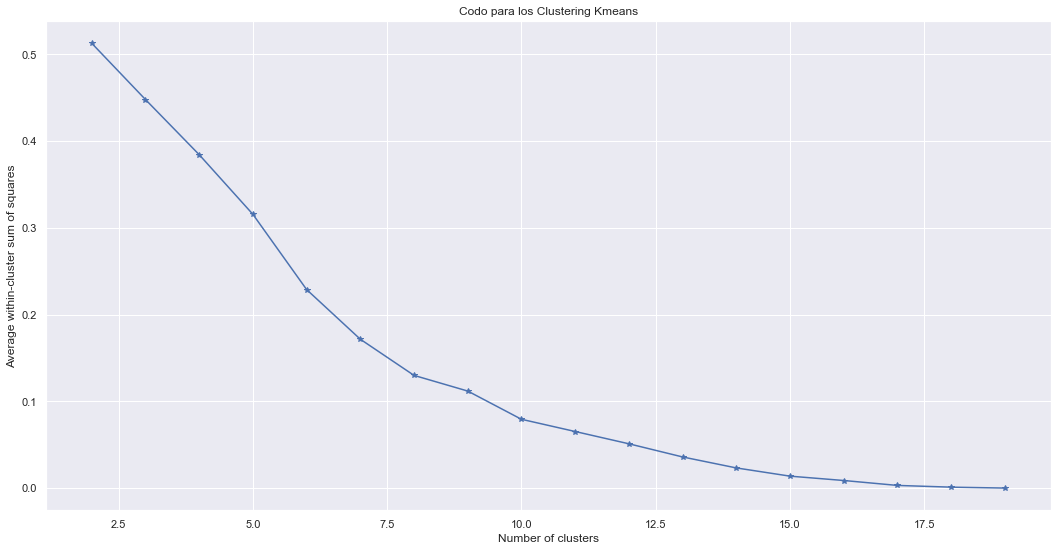

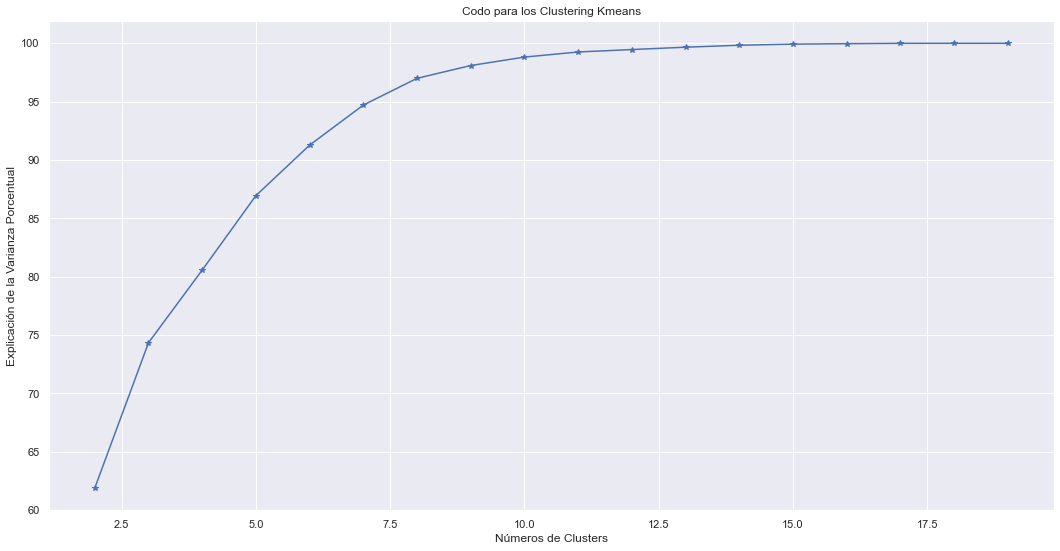

In [352]:
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

DATA= Data_SO #cambian el dataframe

K = range(2,20)
KM = [KMeans(n_clusters=k,random_state=10).fit(DATA.values) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(DATA.values, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/DATA.values.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = np.sum((DATA.values-DATA.values.mean(0))**2)
bss = tss-wcss

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')

plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Codo para los Clustering Kmeans')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Números de Clusters')
plt.ylabel('Explicación de la Varianza Porcentual')
plt.title('Codo para los Clustering Kmeans')
plt.show()

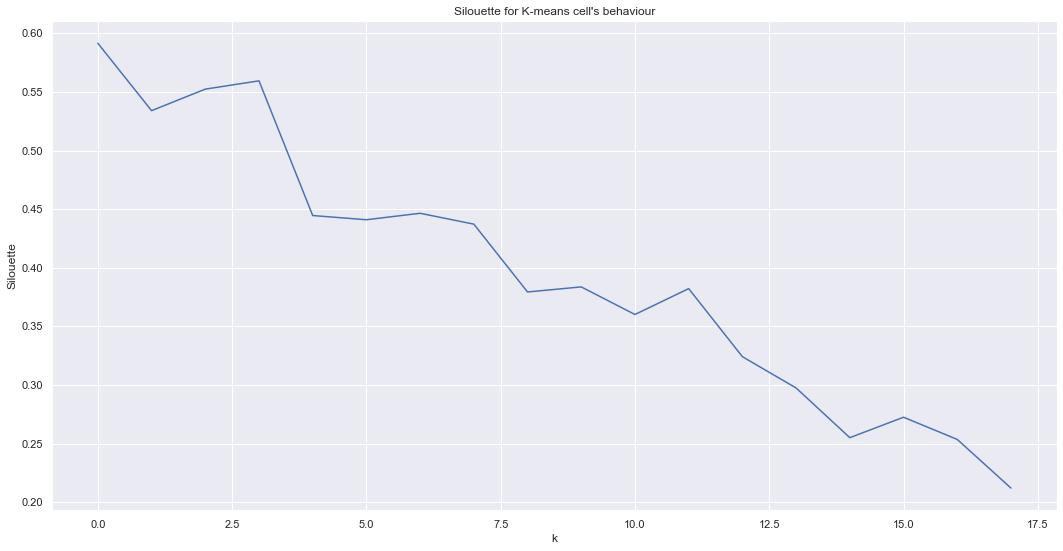

In [353]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
s = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(Data_SO.values)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(DATA.values, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
#sns.despine()
plt.show()

Comparar CLUSTERING ALGORITHMS

In [354]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

k_clusters = 5
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters,random_state=10)
algorithms['affinity'] = AffinityPropagation(damping=0.6)
algorithms['DBSCAN'] =   DBSCAN(eps=0.6)



for model in algorithms.values():
    print(model)
    model.fit(DATA)
    results.append(list(model.labels_))

KMeans(n_clusters=5, random_state=10)
AffinityPropagation(damping=0.6)
DBSCAN(eps=0.6)


METRICS & PLOTTING

In [355]:
metricas = []

# Append the results into lists
for i in range(3):
    metricas.append(silhouette_score(Data_SO.values, results[i], metric='euclidean'))

xlabels = list(algorithms.keys())
xlabels
resultados = pd.concat([pd.DataFrame(xlabels,columns=['algorithms']),pd.DataFrame(metricas,columns=['Metricas'])],axis=1)
resultados

algorithms  Metricas
0     kmeans  0.559488
1   affinity  0.440967
2     DBSCAN  0.591517

In [356]:
Data_SO.reset_index(inplace=True)
Data_CO.reset_index(inplace=True)

In [357]:
Data_SO_ = Data_SO.drop(['index'],axis=1)

kmeans = KMeans(n_clusters=5,random_state=10)
kmeans.fit(Data_SO_.values)
centroids = kmeans.cluster_centers_
kmeans.labels_

PERFIL =  pd.DataFrame({'PERFIL':kmeans.labels_})
data_SO1 = pd.concat([Data_SO.reset_index(drop=True), PERFIL], axis=1)
data_SO1.head(23)

index  Facturacion_aceite  Facturacion_acondicionador  \
0       4           -0.997642                   -0.510606   
1       5           -0.997642                   -0.449895   
2       6           -0.797232                   -0.510606   
3       7           -0.435244                   -0.320004   
4       9           -0.994675                   -0.510606   
5      10           -0.997642                   -0.510606   
6      13           -0.435244                   -0.510606   
7      14            1.539213                   -0.510606   
8      17            0.222908                   -0.510606   
9      18           -0.764320                   -0.510606   
10     21            0.222908                   -0.510606   
11     23           -0.764320                   -0.313941   
12     25            0.222908                    0.251803   
13     29            0.222908                   -0.510606   
14     31           -0.435244                   -0.117276   
15     34           -0.435244                   -0.510606   
16     35            0.881060                   -0.273843   
17     36           -0.895953                   -0.510606   
18     42           -1.013952                   -0.510606   
19     45           -0.435244                   -0.093362   
20     46            0.222908                   -0.065222   
21     47           -0.764320                   -0.510606   

    Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0             -0.301174            -0.204124         -0.204124   
1             -0.301174            -0.204124         -0.204124   
2             -0.301174            -0.204124         -0.204124   
3             -0.301174            -0.204124         -0.204124   
4             -0.301174            -0.204124         -0.204124   
5             -0.301174            -0.204124         -0.204124   
6             -0.301174            -0.204124         -0.204124   
7             -0.301174            -0.204124         -0.204124   
8             -0.301174            -0.204124         -0.204124   
9             -0.301174            -0.204124         -0.204124   
10            -0.301174            -0.204124         -0.204124   
11            -0.301174            -0.204124         -0.204124   
12            -0.301174            -0.204124         -0.204124   
13            -0.301174            -0.204124         -0.204124   
14            -0.301174            -0.204124         -0.204124   
15            -0.301174            -0.204124         -0.204124   
16            -0.301174            -0.204124         -0.204124   
17            -0.301174            -0.204124         -0.204124   
18            -0.301174            -0.204124         -0.204124   
19            -0.301174            -0.204124         -0.204124   
20            -0.301174            -0.204124         -0.204124   
21            -0.301174            -0.204124         -0.204124   

    Facturacion_color  Facturacion_crema  Facturacion_gel  Facturacion_mousse  \
0           -0.312737          -0.411723        -0.386887            -0.31003   
1           -0.312737          -0.411723        -0.386887            -0.31003   
2           -0.312737          -0.411723        -0.386887            -0.31003   
3           -0.312737          -0.411723        -0.386887            -0.31003   
4           -0.312737          -0.411723        -0.386887            -0.31003   
5           -0.312737          -0.411723        -0.386887            -0.31003   
6           -0.312737          -0.411723        -0.386887            -0.31003   
7           -0.312737          -0.411723        -0.386887            -0.31003   
8           -0.312737          -0.411723        -0.386887            -0.31003   
9           -0.312737          -0.411723        -0.386887            -0.31003   
10          -0.312737          -0.411723        -0.386887            -0.31003   
11          -0.312737          -0.411723        -0.386887            -0.31003   
12          -0.312737       

In [358]:
data_SO1.shape

(22, 19)

In [359]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

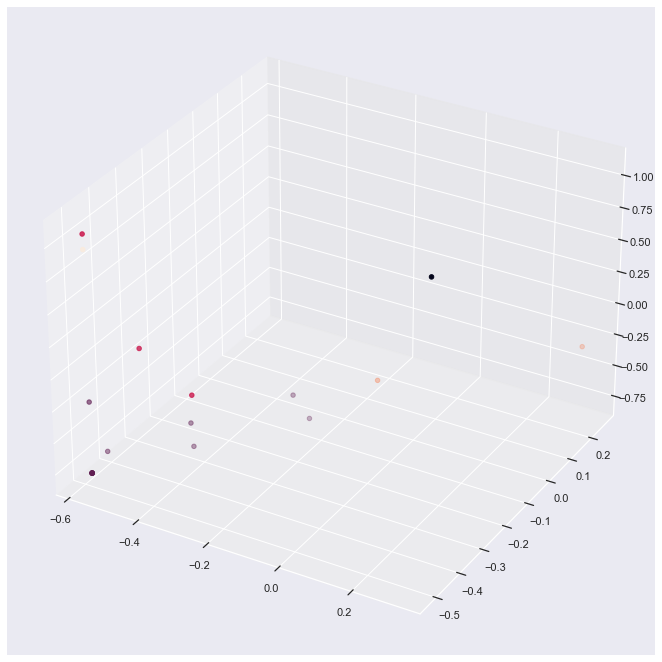

In [360]:


plt.rcParams['figure.figsize'] = (18, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_SO1.Facturacion_shampoo, data_SO1.Facturacion_acondicionador, data_SO1.Facturacion_tratam, c=data_SO1.PERFIL)

Reasignación de outliters

In [361]:
Data_CO.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0           -0.764320                   -0.224702            -0.301174   
1      1            0.222908                   -0.301984             0.115948   
2      2            4.171822                    1.848699            -0.301174   
3      3            0.222908                   -0.510606            -0.301174   
4      8           -0.435244                   -0.221671            -0.301174   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.204124         -0.204124          -0.312737   
1            -0.204124         -0.204124          -0.312737   
2            -0.204124         -0.204124          -0.312737   
3            -0.204124         -0.204124           4.154934   
4            -0.204124         -0.204124          -0.312737   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0           0.358827        -0.386887           -0.310030         -0.320029   
1           2.670478        -0.386887            0.741497         -0.320029   
2          -0.411723        -0.386887           -0.310030         -0.320029   
3           2.670478        -0.386887           -0.310030         -0.320029   
4          -0.411723         0.758106           -0.310030         -0.320029   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.280918           -0.237356            -0.348448   
1          -0.280918           -0.237356            -0.404587   
2          -0.280918           -0.237356             0.614365   
3          -0.280918           -0.237356             0.026901   
4          -0.280918           -0.237356            -0.495314   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0          -0.514365          -0.338345            -0.19494   
1          -0.514365          -0.338345            -0.19494   
2          -0.514365          -0.338345            -0.19494   
3          -0.514365          -0.338345            -0.19494   
4          -0.514365           4.074851            -0.19494   

   Facturacion_tratam  
0           -0.424868  
1           -0.557761  
2           -0.774410  
3            2.611179  
4           -0.381235

In [362]:
Data_CO_ = Data_CO.drop(['index'],axis=1)
predict  = kmeans.predict(Data_CO_)
predict

PERFIL =  pd.DataFrame({'PERFIL':predict})
Data_CO1 = pd.concat([Data_CO.reset_index(drop=True), PERFIL], axis=1)
Data_CO1.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0           -0.764320                   -0.224702            -0.301174   
1      1            0.222908                   -0.301984             0.115948   
2      2            4.171822                    1.848699            -0.301174   
3      3            0.222908                   -0.510606            -0.301174   
4      8           -0.435244                   -0.221671            -0.301174   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.204124         -0.204124          -0.312737   
1            -0.204124         -0.204124          -0.312737   
2            -0.204124         -0.204124          -0.312737   
3            -0.204124         -0.204124           4.154934   
4            -0.204124         -0.204124          -0.312737   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0           0.358827        -0.386887           -0.310030         -0.320029   
1           2.670478        -0.386887            0.741497         -0.320029   
2          -0.411723        -0.386887           -0.310030         -0.320029   
3           2.670478        -0.386887           -0.310030         -0.320029   
4          -0.411723         0.758106           -0.310030         -0.320029   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.280918           -0.237356            -0.348448   
1          -0.280918           -0.237356            -0.404587   
2          -0.280918           -0.237356             0.614365   
3          -0.280918           -0.237356             0.026901   
4          -0.280918           -0.237356            -0.495314   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0          -0.514365          -0.338345            -0.19494   
1          -0.514365          -0.338345            -0.19494   
2          -0.514365          -0.338345            -0.19494   
3          -0.514365          -0.338345            -0.19494   
4          -0.514365           4.074851            -0.19494   

   Facturacion_tratam  PERFIL  
0           -0.424868       1  
1           -0.557761       3  
2           -0.774410       4  
3            2.611179       0  
4           -0.381235       1

In [363]:
Data_CO1.shape

(28, 19)

In [364]:
DATA_PERFIL_ESTAN = data_SO1.append(Data_CO1)
DATA_PERFIL_ESTAN.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      4           -0.997642                   -0.510606            -0.301174   
1      5           -0.997642                   -0.449895            -0.301174   
2      6           -0.797232                   -0.510606            -0.301174   
3      7           -0.435244                   -0.320004            -0.301174   
4      9           -0.994675                   -0.510606            -0.301174   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0            -0.204124         -0.204124          -0.312737   
1            -0.204124         -0.204124          -0.312737   
2            -0.204124         -0.204124          -0.312737   
3            -0.204124         -0.204124          -0.312737   
4            -0.204124         -0.204124          -0.312737   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0          -0.411723        -0.386887            -0.31003         -0.320029   
1          -0.411723        -0.386887            -0.31003         -0.320029   
2          -0.411723        -0.386887            -0.31003         -0.320029   
3          -0.411723        -0.386887            -0.31003         -0.320029   
4          -0.411723        -0.386887            -0.31003         -0.320029   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0          -0.280918           -0.237356            -0.570635   
1          -0.280918           -0.237356            -0.570635   
2          -0.280918           -0.237356            -0.570635   
3          -0.280918           -0.237356            -0.422510   
4          -0.280918           -0.237356            -0.570635   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0          -0.514365          -0.338345            -0.19494   
1          -0.514365          -0.338345            -0.19494   
2          -0.514365          -0.338345            -0.19494   
3          -0.514365          -0.338345            -0.19494   
4          -0.514365          -0.338345            -0.19494   

   Facturacion_tratam  PERFIL  
0           -0.774410       1  
1           -0.707182       1  
2           -0.774410       1  
3           -0.577822       1  
4           -0.774410       1

In [365]:
DATA_PERFIL_ESTAN.shape

(50, 19)

In [366]:
DATA_PERFIL_ESTAN

index  Facturacion_aceite  Facturacion_acondicionador  \
0       4           -0.997642                   -0.510606   
1       5           -0.997642                   -0.449895   
2       6           -0.797232                   -0.510606   
3       7           -0.435244                   -0.320004   
4       9           -0.994675                   -0.510606   
5      10           -0.997642                   -0.510606   
6      13           -0.435244                   -0.510606   
7      14            1.539213                   -0.510606   
8      17            0.222908                   -0.510606   
9      18           -0.764320                   -0.510606   
10     21            0.222908                   -0.510606   
11     23           -0.764320                   -0.313941   
12     25            0.222908                    0.251803   
13     29            0.222908                   -0.510606   
14     31           -0.435244                   -0.117276   
15     34           -0.435244                   -0.510606   
16     35            0.881060                   -0.273843   
17     36           -0.895953                   -0.510606   
18     42           -1.013952                   -0.510606   
19     45           -0.435244                   -0.093362   
20     46            0.222908                   -0.065222   
21     47           -0.764320                   -0.510606   
0       0           -0.764320                   -0.224702   
1       1            0.222908                   -0.301984   
2       2            4.171822                    1.848699   
3       3            0.222908                   -0.510606   
4       8           -0.435244                   -0.221671   
5      11           -0.563726                    0.672381   
6      12            1.539213                    1.014212   
7      15           -0.764320                   -0.510606   
8      16           -1.053932                   -0.510606   
9      19            0.222908                    0.251803   
10     20           -0.435244                   -0.093362   
11     22           -0.828561                   -0.232444   
12     24           -0.435244                    0.320636   
13     26            0.551984                    0.693297   
14     27            0.222908                   -0.510606   
15     28            0.222908                    0.162480   
16     30            1.539213                    1.443581   
17     32            1.539213                    0.633008   
18     33           -0.106168                   -0.117276   
19     37           -0.435244                   -0.510606   
20     38            1.868289                    5.759749   
21     39            0.487743                   -0.056431   
22     40            0.222908                   -0.352764   
23     41           -0.740283                   -0.417354   
24     43            0.881060                   -0.510606   
25     44            1.539213                    1.474337   
26     48           -0.435244                   -0.221671   
27     49           -0.828561                   -0.440667   

    Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0             -0.301174            -0.204124         -0.204124   
1             -0.301174            -0.204124         -0.204124   
2             -0.301174            -0.204124         -0.204124   
3             -0.301174            -0.204124         -0.204124   
4             -0.301174            -0.204124         -0.204124   
5             -0.301174            -0.204124         -0.204124   
6             -0.301174            -0.204124         -0.204124   
7             -0.301174            -0.204124         -0.204124   
8             -0.301174            -0.204124         -0.204124   
9             -0.301174            -0.204124         -0.204124   
10            -0.301174            -0.204124         -0.204124   
11            -0.301174            -0.204124         -0.204124   
12            -0.301174           

In [367]:
comport1.reset_index(inplace=True)
comport1.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0              249.57                      509.31                 0.00   
1      1              998.28                      371.64                59.83   
2      2             3993.12                     4202.88                 0.00   
3      3              998.28                        0.00                 0.00   
4      4               72.62                        0.00                 0.00   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0               0.0                0.0   
1                  0.0               0.0                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0             2542.8   
4                  0.0               0.0                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0             194.07              0.0                0.00               0.0   
1             776.28              0.0              166.53               0.0   
2               0.00              0.0                0.00               0.0   
3             776.28              0.0                0.00               0.0   
4               0.00              0.0                0.00               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0                450.0   
1                0.0                 0.0                336.3   
2                0.0                 0.0               2400.0   
3                0.0                 0.0               1210.2   
4                0.0                 0.0                  0.0   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0                0.0                0.0                 0.0   
1                0.0                0.0                 0.0   
2                0.0                0.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 0.0   

   Facturacion_tratam  
0              615.24  
1              381.33  
2                0.00  
3             5959.08  
4                0.00

In [368]:
DATA_PERFIL_FINAL = pd.merge(comport1,DATA_PERFIL_ESTAN[['index','PERFIL']],on=['index'],how='inner')
DATA_PERFIL_FINAL.head()

index  Facturacion_aceite  Facturacion_acondicionador  Facturacion_aerosol  \
0      0              249.57                      509.31                 0.00   
1      1              998.28                      371.64                59.83   
2      2             3993.12                     4202.88                 0.00   
3      3              998.28                        0.00                 0.00   
4      4               72.62                        0.00                 0.00   

   Facturacion_balsamo  Facturacion_cera  Facturacion_color  \
0                  0.0               0.0                0.0   
1                  0.0               0.0                0.0   
2                  0.0               0.0                0.0   
3                  0.0               0.0             2542.8   
4                  0.0               0.0                0.0   

   Facturacion_crema  Facturacion_gel  Facturacion_mousse  Facturacion_pack  \
0             194.07              0.0                0.00               0.0   
1             776.28              0.0              166.53               0.0   
2               0.00              0.0                0.00               0.0   
3             776.28              0.0                0.00               0.0   
4               0.00              0.0                0.00               0.0   

   Facturacion_pasta  Facturacion_pomada  Facturacion_shampoo  \
0                0.0                 0.0                450.0   
1                0.0                 0.0                336.3   
2                0.0                 0.0               2400.0   
3                0.0                 0.0               1210.2   
4                0.0                 0.0                  0.0   

   Facturacion_spray  Facturacion_suero  Facturacion_tonico  \
0                0.0                0.0                 0.0   
1                0.0                0.0                 0.0   
2                0.0                0.0                 0.0   
3                0.0                0.0                 0.0   
4                0.0                0.0                 0.0   

   Facturacion_tratam  PERFIL  
0              615.24       1  
1              381.33       3  
2                0.00       4  
3             5959.08       0  
4                0.00       1

Descripción de los perfiles

In [369]:
DESCRIPCION_ = DATA_PERFIL_FINAL.drop(['index'],axis=1)
DESCRIPCION_ = DESCRIPCION_.groupby(['PERFIL'], as_index=False).mean()
conteo = 100 * DATA_PERFIL_FINAL['PERFIL'].value_counts() / len(DATA_PERFIL_FINAL['PERFIL'])
conteo = pd.DataFrame(conteo)
conteo
conteo = conteo.rename(index=str, columns={"PERFIL": "CANTIDAD%"})
CANTIDAD =  conteo.sort_index(axis=0, level=None, ascending=True)
DESCRIPCION_FINAL = pd.concat([CANTIDAD.reset_index(drop=True), DESCRIPCION_], axis=1)
DESCRIPCION_FINAL 

CANTIDAD%  PERFIL  Facturacion_aceite  Facturacion_acondicionador  \
0       18.0       0         1519.736667                 2546.764444   
1       48.0       1          321.447083                  177.391667   
2        8.0       2          873.495000                  128.677500   
3       22.0       3          962.304545                 1234.904545   
4        4.0       4         2994.840000                 2101.440000   

   Facturacion_aerosol  Facturacion_balsamo  Facturacion_cera  \
0           104.110000            22.316667         59.793333   
1            14.957500             8.368750          0.000000   
2            33.210000             0.000000          0.000000   
3            66.467273             0.000000         48.921818   
4             0.000000             0.000000          0.000000   

   Facturacion_color  Facturacion_crema  Facturacion_gel  Facturacion_mousse  \
0         565.066667         234.136667        90.986667          190.433333   
1          52.975000          32.345000        29.150833            0.000000   
2           0.000000          48.517500         0.000000           41.632500   
3         231.163636         191.566364       117.725455           52.230909   
4           0.000000           0.000000         0.000000            0.000000   

   Facturacion_pack  Facturacion_pasta  Facturacion_pomada  \
0        587.315556          22.316667           22.316667   
1         61.592500          19.527083            8.368750   
2        159.885000           0.000000            0.000000   
3          0.000000          36.518182           36.518182   
4          0.000000           0.000000            0.000000   

   Facturacion_shampoo  Facturacion_spray  Facturacion_suero  \
0          3503.910000         694.093333          39.166667   
1           203.606667          14.333333          14.687500   
2           365.002500          48.030000          44.062500   
3          1591.278182         160.050000          42.727273   
4          1200.000000           0.000000           0.000000   

   Facturacion_tonico  Facturacion_tratam  
0            0.000000         4366.293333  
1            7.472917          166.995417  
2            0.000000         2261.015000  
3           36.363636         1159.620909  
4            0.000000         1524.360000

In [370]:
DATA_PERFIL_FINAL.shape

(50, 19)

# Clasificación

In [371]:
txprecios = txprecios.drop(['id_venta','top'], axis=1) #borramos columnas que no nocesitamos


In [372]:
txprecios.head()

Facturacion_total  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0            1259.31                   0.0                        0.0   
1            1720.27                   0.0                        0.0   
2            2400.00                   0.0                        0.0   
3           10488.36                   0.0                        0.0   
4               0.00                   0.0                        0.0   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.0                                 0.000   
1                                 0.0                                 0.000   
2                                 0.0                                 0.000   
3                                 0.0                                52.975   
4                                 0.0                                 0.000   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                 105.95   
4                                   0.00   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                                  0.0000                          0.000000   
1                                  0.0000                          0.000000   
2                                  0.0000                          0.000000   
3                                 79.4625                         70.633333   
4                                  0.0000                          0.000000   

   SEB CELLOPHANES SHINE CLEAR 300 ML  ...  SEBMAN ACONDICIONADOR 250ML  \
0                                 0.0  ...                          0.0   
1                                 0.0  ...                          0.0   
2                                 0.0  ...                          0.0   
3                                 0.0  ...                          0.0   
4                                 0.0  ...                          0.0   

   SEBMAN BALSAMO AFTER SHAVE 150ML  SEBMAN HAIR SPRAY 200ML  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   

   SEBMAN MULTITASKER SHAMP 3EN1 1000ML  SEBMAN MULTITASKER SHAMP 3EN1 250ML  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   SEBMAN PASTA FIJADORA CLAY MATTE 75ML  SEBMAN PLAYER GEL 150ML  \
0                                    0.0                      0.0   
1                                    0.0                      0.0   
2                                    0.0                      0.0   
3                                    0.0                      0.0   
4                                    0.0                      0.0   

   SEBMAN POMADA MODELADORA BRILLANTE 75ML  SEBMAN REWORKABLE GEL 75ML  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0        

In [373]:
# Preprocesar label
from sklearn import preprocessing
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
# Normalizando los datos
from sklearn.preprocessing import MinMaxScaler

In [374]:
## selection of category variables
target = 'Facturacion_total'
exclude = ['Ano_Mes']

cols = [x for x in txprecios.columns if x not in exclude + [target]]
cols_cat = txprecios[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)

## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(txprecios[i].dropna()))
    txprecios.loc[~txprecios[i].isnull(),i]=le.transform(txprecios[i].dropna())

txprecios[cols]

['Ano_Mes'] 

 [] []


PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0               0.000000                      0.000   
1               0.000000                      0.000   
2               0.000000                      0.000   
3               0.000000                      0.000   
4               0.000000                      0.000   
5               0.000000                      0.000   
6               0.000000                      0.000   
7               0.000000                      0.000   
8               0.000000                      0.000   
9               0.000000                      0.000   
10              0.000000                      0.000   
11              0.000000                      0.000   
12              0.000000                      0.000   
13              0.000000                      0.000   
14              0.000000                      0.000   
15              0.000000                    104.835   
16              0.000000                      0.000   
17              0.000000                      0.000   
18              0.000000                      0.000   
19             93.712500                    139.780   
20              0.000000                      0.000   
21              0.000000                      0.000   
22              0.000000                      0.000   
23              0.000000                      0.000   
24              0.000000                      0.000   
25              0.000000                      0.000   
26              0.000000                      0.000   
27              0.000000                      0.000   
28              0.000000                      0.000   
29              0.000000                      0.000   
30              0.000000                      0.000   
31              0.000000                      0.000   
32              0.000000                      0.000   
33              0.000000                      0.000   
34              0.000000                      0.000   
35              0.000000                      0.000   
36              0.000000                      0.000   
37             91.362857                      0.000   
38              0.000000                      0.000   
39             85.272000                      0.000   
40              0.000000                      0.000   
41              0.000000                      0.000   
42              0.000000                      0.000   
43              0.000000                      0.000   
44             91.362857                      0.000   
45              0.000000                      0.000   
46              0.000000                      0.000   
47              0.000000                      0.000   
48             91.362857                      0.000   
49              0.000000                      0.000   

    PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.00                                 0.000   
1                                 0.00                                 0.000   
2                                 0.00                                 0.000   
3                                 0.00                                52.975   
4                                 0.00                                 0.000   
5                                 0.00                                 0.000   
6                                 0.00                                 0.000   
7                                 0.00                                 0.000   
8                                 0.00                                 0.000   
9                                 0.00                                 0.000   
10                                0.00                                 0.000   
11                                0.00                                 0.000   
12                                0.00                                 0.000   
13                                0.00                                 0.000  

In [375]:
scaler = StandardScaler()
scaler = scaler.fit(txprecios)
estandarizar = scaler.transform(txprecios)
estandarizar = pd.DataFrame(estandarizar,columns=list(txprecios.columns))
estandarizar.head(10)

Facturacion_total  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0          -0.456265             -0.333154                  -0.201988   
1          -0.356791             -0.333154                  -0.201988   
2          -0.210108             -0.333154                  -0.201988   
3           1.535325             -0.333154                  -0.201988   
4          -0.728018             -0.333154                  -0.201988   
5          -0.702483             -0.333154                  -0.201988   
6          -0.728018             -0.333154                  -0.201988   
7          -0.588610             -0.333154                  -0.201988   
8          -0.433755             -0.333154                  -0.201988   
9          -0.728018             -0.333154                  -0.201988   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                           -0.294884                             -0.285536   
1                           -0.294884                             -0.285536   
2                           -0.294884                             -0.285536   
3                           -0.294884                              1.754007   
4                           -0.294884                             -0.285536   
5                           -0.294884                             -0.285536   
6                           -0.294884                             -0.285536   
7                           -0.294884                             -0.285536   
8                           -0.294884                             -0.285536   
9                           -0.294884                             -0.285536   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                               -0.204124   
1                               -0.204124   
2                               -0.204124   
3                               -0.204124   
4                               -0.204124   
5                               -0.204124   
6                               -0.204124   
7                               -0.204124   
8                               -0.204124   
9                               -0.204124   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                              -0.294884   
1                              -0.294884   
2                              -0.294884   
3                               3.391165   
4                              -0.294884   
5                              -0.294884   
6                              -0.294884   
7                              -0.294884   
8                              -0.294884   
9                              -0.294884   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                               -0.246887                         -0.252170   
1                               -0.246887                         -0.252170   
2                               -0.246887                         -0.252170   
3                                3.692795                          4.038679   
4                               -0.246887                         -0.252170   
5                               -0.246887                         -0.252170   
6                               -0.246887                         -0.252170   
7                               -0.246887                         -0.252170   
8                               -0.246887                         -0.252170   
9                               -0.246887                         -0.252170   

   SEB CELLOPHANES SHINE CLEAR 300 ML  ...  SEBMAN ACONDICIONADOR 250ML  \
0                           -0.289798  ...                    -0.330028   
1                           -0.289798  ...                    -0.330028   
2                           -0.289798  ...                    -0.330028   
3                           -0.289798  ...                    -0.330028   
4                           -0.289798  ...                    -0.330028   
5                           

In [376]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(txprecios)
normalized = scaler.transform(txprecios)
normalized1 = pd.DataFrame(normalized,columns=list(txprecios.columns))
normalized1.head(10)

Facturacion_total  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0           0.044619                   0.0                        0.0   
1           0.060951                   0.0                        0.0   
2           0.085035                   0.0                        0.0   
3           0.371614                   0.0                        0.0   
4           0.000000                   0.0                        0.0   
5           0.004193                   0.0                        0.0   
6           0.000000                   0.0                        0.0   
7           0.022889                   0.0                        0.0   
8           0.048315                   0.0                        0.0   
9           0.000000                   0.0                        0.0   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.0                                   0.0   
1                                 0.0                                   0.0   
2                                 0.0                                   0.0   
3                                 0.0                                   0.5   
4                                 0.0                                   0.0   
5                                 0.0                                   0.0   
6                                 0.0                                   0.0   
7                                 0.0                                   0.0   
8                                 0.0                                   0.0   
9                                 0.0                                   0.0   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
5                                     0.0   
6                                     0.0   
7                                     0.0   
8                                     0.0   
9                                     0.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    1.0   
4                                    0.0   
5                                    0.0   
6                                    0.0   
7                                    0.0   
8                                    0.0   
9                                    0.0   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                                    0.00                          0.000000   
1                                    0.00                          0.000000   
2                                    0.00                          0.000000   
3                                    0.75                          0.962963   
4                                    0.00                          0.000000   
5                                    0.00                          0.000000   
6                                    0.00                          0.000000   
7                                    0.00                          0.000000   
8                                    0.00                          0.000000   
9                                    0.00                          0.000000   

   SEB CELLOPHANES SHINE CLEAR 300 ML  ...  SEBMAN ACONDICIONADOR 250ML  \
0                                 0.0  ...                          0.0   
1                                 0.0  ...                          0.0   
2                                 0.0  ...                          0.0   
3                                 0.0  ...                          0.0   
4                                 0.0  ...                          0.0   
5                           

In [377]:
## modelos que usamos para imputar
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.ensemble import IsolationForest
from missingpy import MissForest
from sklearn.neighbors import LocalOutlierFactor

In [378]:
# DBSCAN model with parameters
model = DBSCAN(min_samples=3).fit(estandarizar)

In [379]:
txprecios[model.labels_ == -1]

Facturacion_total  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0             1259.31              0.000000                      0.000   
1             1720.27              0.000000                      0.000   
2             2400.00              0.000000                      0.000   
3            10488.36              0.000000                      0.000   
5              118.33              0.000000                      0.000   
7              646.02              0.000000                      0.000   
8             1363.62              0.000000                      0.000   
11            6399.06              0.000000                      0.000   
12            3927.96              0.000000                      0.000   
13             993.34              0.000000                      0.000   
14            3048.72              0.000000                      0.000   
15            2784.57              0.000000                    104.835   
16              56.64              0.000000                      0.000   
17            2125.32              0.000000                      0.000   
19            6415.88             93.712500                    139.780   
20            3757.02              0.000000                      0.000   
21            3252.96              0.000000                      0.000   
22            4772.82              0.000000                      0.000   
23             305.10              0.000000                      0.000   
24            7375.28              0.000000                      0.000   
25            2622.96              0.000000                      0.000   
26            7334.52              0.000000                      0.000   
27             358.98              0.000000                      0.000   
28            2250.37              0.000000                      0.000   
29            2248.08              0.000000                      0.000   
30           10061.64              0.000000                      0.000   
31             970.68              0.000000                      0.000   
32            4527.96              0.000000                      0.000   
33            2630.22              0.000000                      0.000   
35            5090.55              0.000000                      0.000   
37            1097.00             91.362857                      0.000   
38           28223.79              0.000000                      0.000   
39            8656.29             85.272000                      0.000   
40            1991.80              0.000000                      0.000   
41             791.57              0.000000                      0.000   
42               0.00              0.000000                      0.000   
43            8059.35              0.000000                      0.000   
44           10189.92             91.362857                      0.000   
45             672.60              0.000000                      0.000   
46            2137.17              0.000000                      0.000   
48            4379.06             91.362857                      0.000   
49            1177.17              0.000000                      0.000   

    PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.00                                 0.000   
1                                 0.00                                 0.000   
2                                 0.00                                 0.000   
3                                 0.00                                52.975   
5                                 0.00                                 0.000   
7                                 0.00                                 0.000   
8                                 0.00                                 0.000   
11                                0.00                                 0.000   
12                                0.00                                 0.000   
13                   

In [380]:
print(Counter(model.labels_))

Counter({-1: 42, 0: 8})


In [381]:
#creamos la columna de venta top en la que este en el quartil superior de facturacion de venta
percentil = txprecios['Facturacion_total'].quantile( .75)

txprecios.loc[txprecios['Facturacion_total'] >= percentil, 'top'] = '1'
txprecios.loc[txprecios['Facturacion_total'] < percentil, 'top'] = '0'
txprecios['top'] = txprecios['top'].astype(int)


txprecios.head()

Facturacion_total  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0            1259.31                   0.0                        0.0   
1            1720.27                   0.0                        0.0   
2            2400.00                   0.0                        0.0   
3           10488.36                   0.0                        0.0   
4               0.00                   0.0                        0.0   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.0                                 0.000   
1                                 0.0                                 0.000   
2                                 0.0                                 0.000   
3                                 0.0                                52.975   
4                                 0.0                                 0.000   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                 105.95   
4                                   0.00   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                                  0.0000                          0.000000   
1                                  0.0000                          0.000000   
2                                  0.0000                          0.000000   
3                                 79.4625                         70.633333   
4                                  0.0000                          0.000000   

   SEB CELLOPHANES SHINE CLEAR 300 ML  ...  SEBMAN BALSAMO AFTER SHAVE 150ML  \
0                                 0.0  ...                               0.0   
1                                 0.0  ...                               0.0   
2                                 0.0  ...                               0.0   
3                                 0.0  ...                               0.0   
4                                 0.0  ...                               0.0   

   SEBMAN HAIR SPRAY 200ML  SEBMAN MULTITASKER SHAMP 3EN1 1000ML  \
0                      0.0                                   0.0   
1                      0.0                                   0.0   
2                      0.0                                   0.0   
3                      0.0                                   0.0   
4                      0.0                                   0.0   

   SEBMAN MULTITASKER SHAMP 3EN1 250ML  SEBMAN PASTA FIJADORA CLAY MATTE 75ML  \
0                                  0.0                                    0.0   
1                                  0.0                                    0.0   
2                                  0.0                                    0.0   
3                                  0.0                                    0.0   
4                                  0.0                                    0.0   

   SEBMAN PLAYER GEL 150ML  SEBMAN POMADA MODELADORA BRILLANTE 75ML  \
0                      0.0                                      0.0   
1                      0.0                                      0.0   
2                      0.0                                      0.0   
3                      0.0                                      0.0   
4                      0.0                                      0.0   

   SEBMAN REWORKABLE GEL 75ML  SEBMAN TONICO CAPILAR REFRESCANTE 100ML  top  
0                         0.0                                      0.0    0  
1                         0.0                                      0.0    0  
2                         0.0           

In [382]:
txprecios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Facturacion_total                        50 non-null     float64
 1   PACK SEBASTIAN HYDRE                     50 non-null     float64
 2   PACK SEBASTIAN PENETRAITT                50 non-null     float64
 3   PROFESSIONAL SEB SHINE SHAKER 75ML       50 non-null     float64
 4   SEB CELLOPHANES CARAMEL BROWN 300 ML     50 non-null     float64
 5   SEB CELLOPHANES CHOCOLATE BROWN 300 ML   50 non-null     float64
 6   SEB CELLOPHANES ESPRESSO BROWN 300 ML    50 non-null     float64
 7   SEB CELLOPHANES HONEY COMB BLOND 300ML   50 non-null     float64
 8   SEB CELLOPHANES ICE BLOND 300 ML         50 non-null     float64
 9   SEB CELLOPHANES SHINE CLEAR 300 ML       50 non-null     float64
 10  SEB CELLOPHANES VANILLA BLOND 300 ML     50 non-null

## Logistic regresion

In [383]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = txprecios,txprecios[["top"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = LogisticRegression()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_rl = benchmark_model.predict_proba(X_train)[:,1]
predict_test_rl = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both  predict_proba(best_X_train)[:,1]
print("auc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_rl) ))
print("auc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_rl) ))


auc on training in LogisticRegression data : 1.000
auc on testing in LogisticRegression  data : 0.925


## Decision tree

In [384]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = txprecios,txprecios[["top"]]

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = tree.DecisionTreeClassifier()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_dt = benchmark_model.predict_proba(X_train)[:,1]
predict_test_dt = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train, predict_train_dt) ))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test, predict_test_dt) ))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.938


In [385]:
# Prepare the data
from sklearn.model_selection import train_test_split
X,y = txprecios,txprecios[["top"]]

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25, random_state=1)

# Initialize and fit the model
benchmark_model = tree.DecisionTreeClassifier()
benchmark_model.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_dt = benchmark_model.predict_proba(X_train)[:,1]
predict_test_dt = benchmark_model.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train, predict_train_dt) ))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test, predict_test_dt) ))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.938


## Univariate feature selection

In [386]:
txpreciose=txprecios
X,y = txprecios,txprecios[["top"]]
print(X.shape,y.shape)


(50, 74) (50, 1)


In [387]:
select_feature = SelectKBest(score_func=chi2, k=5).fit(X, y)

features = []
for feature in zip(X.columns, select_feature.scores_):
    features.append(feature)
    
features_total = pd.DataFrame(features).sort_values(1, ascending=False)
features_total.head(20)

0              1
0                        Facturacion_total  167536.180819
33         SEB PENETRAITT PRO MASQUE 500ML     808.747165
22            SEB HYDRE CONDITIONER 1000ML     751.761209
24                SEB HYDRE SHAMPOO 1000ML     730.612893
7   SEB CELLOPHANES HONEY COMB BLOND 300ML     708.642500
53         SEB TWISTED CLEANSER SHAMPOO 1L     703.796923
55         SEB TWISTED DETANGLER CONDIT 1L     700.246346
50               SEB TRILLIANCE SHP 1000ML     691.283333
5   SEB CELLOPHANES CHOCOLATE BROWN 300 ML     603.100000
8         SEB CELLOPHANES ICE BLOND 300 ML     590.728718
52                    SEB TRILLIANT 150 ML     578.895277
38             SEB POTION 9 STYL TRT 500ML     563.751868
32             SEB PENETRAITT MASQUE 150ml     550.523068
6    SEB CELLOPHANES ESPRESSO BROWN 300 ML     528.868919
25                 SEB HYDRE SHAMPOO 250ML     479.093465
58     SEB TWISTED ELASTIC TREATMENT 500ML     467.107096
4     SEB CELLOPHANES CARAMEL BROWN 300 ML     397.760907
34           SEB PENETRAITT SHAMPOO 1000ML     362.538720
21              SEB GEL FORTE STRONG 200ML     321.601154
18                 SEB DARK OIL MASK 500ML     316.657268

## Recursive Feature Elimination


La eliminación de características recursivas (RFE) funciona mediante la eliminación recursiva de atributos y la construcción de un modelo en los atributos que permanecen.

Utiliza la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a la predicción del atributo objetivo.

El siguiente ejemplo usa RFE con el algoritmo de regresión logística para seleccionar las 3 características principales. La elección del algoritmo no importa demasiado, siempre que sea hábil y consistente.

In [388]:
# Feature Extraction with RFE
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)
print('Best feature by rfe:',X.columns[rfe.support_])

Best feature by rfe: Index(['PACK SEBASTIAN HYDRE', 'SEB CELLOPHANES HONEY COMB BLOND 300ML',
       'SEB CELLOPHANES ICE BLOND 300 ML', 'SEB DARK OIL 95ML',
       'SEB DARK OIL CONDITIONER 250ML', 'SEB DARK OIL MASK 500ML',
       'SEB GEL FORTE STRONG 200ML', 'SEB HYDRE CONDITIONER 250ML',
       'SEB HYDRE SHAMPOO 250ML', 'SEB PENETRAITT CONDITION 250ML',
       'SEB PENETRAITT MASQUE 150ml', 'SEB PENETRAITT SHAMPOO 1000ML',
       'SEB TRILLIANCE CND 250ML', 'SEB TRILLIANCE SHP 1000ML',
       'SEB TRILLIANCE SHP 250ML', 'SEB TRILLIANT 150 ML',
       'SEB TWISTED ELASTIC TREATMENT 150ML',
       'SEB TWISTED ELASTIC TREATMENT 500ML',
       'SEBMAN MULTITASKER SHAMP 3EN1 1000ML',
       'SEBMAN POMADA MODELADORA BRILLANTE 75ML'],
      dtype='object')


## Recursive feature elimination (RFE) with random forest

In [389]:
# Create the RFE object and rank each pixel

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X, y)

print('Best feature by rfe:',X.columns[rfe.support_])


Best feature by rfe: Index(['Facturacion_total', 'PACK SEBASTIAN HYDRE',
       'SEB CELLOPHANES HONEY COMB BLOND 300ML', 'SEB DARK OIL 95ML',
       'SEB GEL FORTE STRONG 200ML', 'SEB HYDRE CONDITIONER 1000ML',
       'SEB HYDRE CONDITIONER 250ML', 'SEB HYDRE SHAMPOO 1000ML',
       'SEB HYDRE SHAMPOO 250ML', 'SEB PENETRAITT CONDITION 250ML',
       'SEB PENETRAITT MASQUE 150ml', 'SEB PENETRAITT PRO MASQUE 500ML',
       'SEB PENETRAITT SHAMPOO 1000ML', 'SEB POTION 9 STYL TRT 150ML',
       'SEB POTION 9 STYL TRT 500ML', 'SEB TRILLIANCE SHP 1000ML',
       'SEB TRILLIANT 150 ML', 'SEB TWISTED CLEANSER SHAMPOO 1L',
       'SEB TWISTED ELASTIC TREATMENT 500ML', 'top'],
      dtype='object')


## Random Forest Features Importance

In [390]:
### selector de variables
rf_clf = RandomForestClassifier(n_estimators=200,random_state =123)

# Train the model
rf_clf.fit(X.values,y.values.ravel())

## ordenando  las mejores variables
features = []
for feature in zip(X.columns, rf_clf.feature_importances_):
    features.append(feature)
    
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)

sfm = SelectFromModel(rf_clf, threshold=0.006)

# Train the selector
sfm.fit(X, y)

# Print the names of the most important features

variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])
    #variables
    
#features_total
variables

['Facturacion_total',
 'SEB CELLOPHANES ESPRESSO BROWN 300 ML',
 'SEB CELLOPHANES HONEY COMB BLOND 300ML',
 'SEB CELLOPHANES ICE BLOND 300 ML',
 'SEB DARK OIL MASK 500ML',
 'SEB GEL FORTE STRONG 200ML',
 'SEB HYDRE CONDITIONER 1000ML',
 'SEB HYDRE CONDITIONER 250ML',
 'SEB HYDRE SHAMPOO 1000ML',
 'SEB HYDRE SHAMPOO 250ML',
 'SEB HYDRE TREATMENT 150ML',
 'SEB PENETRAITT CONDIT. 1000ML',
 'SEB PENETRAITT CONDITION 250ML',
 'SEB PENETRAITT MASQUE 150ml',
 'SEB PENETRAITT PRO MASQUE 500ML',
 'SEB PENETRAITT SHAMPOO 1000ML',
 'SEB PENETRAITT SHAMPOO 250ML',
 'SEB POTION 9 STYL TRT 150ML',
 'SEB POTION 9 STYL TRT 500ML',
 'SEB TRILLIANCE SHP 1000ML',
 'SEB TRILLIANCE SHP 250ML',
 'SEB TRILLIANT 150 ML',
 'SEB TWISTED DETANGLER CONDIT 250ML',
 'SEB TWISTED ELASTIC TREATMENT 500ML',
 'SEBMAN MULTITASKER SHAMP 3EN1 1000ML',
 'top']

In [391]:
len(variables)

26

In [392]:
len(features_total)

74

In [393]:
len(features_total)

74

Selección de muestras de entrenamiento y validación

In [394]:
# Prepare the data
X,y = txprecios,txprecios["top"]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=1)

In [395]:
## Usando la mejor selecciónde variables
best_X_train = X_train[variables]
best_X_test  = X_test[variables]

In [396]:
# Function to fit the classify and record its metrics
def pipeline(clas, X_train, y_train, X_test, y_test, **kwargs ):
    # Dictionary to hold the properties
    clas_props = {}
    
    # Initialize and fit the classify 
    classify = clas(**kwargs)
    classify.fit(best_X_train, y_train)
    y_train_pre =  classify.predict_proba(best_X_train)[:,1]
    y_test_pre =  classify.predict_proba(best_X_test)[:,1]

    
    # Store the metrics for the classify
    clas_props["name"] = clas.__name__
    clas_props["train_score"] = roc_auc_score(y_train, y_train_pre)
    clas_props["test_score"] = roc_auc_score(y_test, y_test_pre)
    
    return clas_props

In [397]:
def execute_pipeline():
    # Create the list of algorithms
    classifys = [
        LogisticRegression,
        DecisionTreeClassifier,
        RandomForestClassifier,
        XGBClassifier,
        LGBMClassifier,
        CatBoostClassifier
    ]
    
  # To store the properties for each classify
    props = []
    
    """
    Iterate thorugh the list of classify,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for clas in classifys:
        properites = pipeline(clas, best_X_train, y_train, best_X_test, y_test)
        props.append(properites)
        
    return props  

In [398]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the classify
    names = [prop["name"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training scores auc": train_scores,
                            "Testing scores auc": test_scores,
                      }
                  )
    
    return df

In [399]:
properties= get_properties()
properties

[21:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.002606
0:	learn: 0.6888869	total: 4.04ms	remaining: 4.04s
1:	learn: 0.6844287	total: 5.42ms	remaining: 2.71s
2:	learn: 0.6806862	total: 7.53ms	remaining: 2.5s
3:	learn: 0.6759586	total: 9.21ms	remaining: 2.29s
4:	learn: 0.6721909	total: 11ms	remaining: 2.2s
5:	learn: 0.6687500	total: 12.7ms	remaining: 2.1s
6:	learn: 0.6649285	total: 14.5ms	remaining: 2.06s
7:	learn: 0.6605813	total: 15.9ms	remaining: 1.97s
8:	learn: 0.6564040	total: 17.6ms	remaining: 1.94s
9:	learn: 0.6515309	total: 18.9ms	remaining: 1.87s
10:	learn: 0.6481605	total: 20.7ms	remaining: 1.86s
11:	learn: 0.6446782	total: 23ms	remaining: 1.89s
12:	learn: 0.6411735	total: 24.8ms	remaining: 1.88s
1

194:	learn: 0.2539674	total: 299ms	remaining: 1.24s
195:	learn: 0.2528659	total: 301ms	remaining: 1.24s
196:	learn: 0.2515003	total: 302ms	remaining: 1.23s
197:	learn: 0.2505954	total: 304ms	remaining: 1.23s
198:	learn: 0.2497025	total: 306ms	remaining: 1.23s
199:	learn: 0.2485926	total: 308ms	remaining: 1.23s
200:	learn: 0.2476259	total: 310ms	remaining: 1.23s
201:	learn: 0.2465845	total: 312ms	remaining: 1.23s
202:	learn: 0.2457388	total: 314ms	remaining: 1.23s
203:	learn: 0.2445502	total: 316ms	remaining: 1.23s
204:	learn: 0.2431303	total: 317ms	remaining: 1.23s
205:	learn: 0.2420443	total: 319ms	remaining: 1.23s
206:	learn: 0.2408419	total: 320ms	remaining: 1.23s
207:	learn: 0.2396005	total: 321ms	remaining: 1.22s
208:	learn: 0.2388601	total: 324ms	remaining: 1.22s
209:	learn: 0.2377598	total: 325ms	remaining: 1.22s
210:	learn: 0.2366355	total: 327ms	remaining: 1.22s
211:	learn: 0.2358837	total: 329ms	remaining: 1.22s
212:	learn: 0.2351589	total: 331ms	remaining: 1.22s
213:	learn: 

385:	learn: 0.1258748	total: 599ms	remaining: 953ms
386:	learn: 0.1254368	total: 601ms	remaining: 952ms
387:	learn: 0.1250720	total: 602ms	remaining: 950ms
388:	learn: 0.1247695	total: 604ms	remaining: 949ms
389:	learn: 0.1243667	total: 606ms	remaining: 947ms
390:	learn: 0.1241586	total: 607ms	remaining: 945ms
391:	learn: 0.1237939	total: 608ms	remaining: 944ms
392:	learn: 0.1234918	total: 610ms	remaining: 942ms
393:	learn: 0.1230705	total: 611ms	remaining: 940ms
394:	learn: 0.1226092	total: 612ms	remaining: 938ms
395:	learn: 0.1223214	total: 614ms	remaining: 937ms
396:	learn: 0.1220656	total: 616ms	remaining: 935ms
397:	learn: 0.1216934	total: 617ms	remaining: 934ms
398:	learn: 0.1213968	total: 619ms	remaining: 932ms
399:	learn: 0.1208595	total: 620ms	remaining: 930ms
400:	learn: 0.1204695	total: 621ms	remaining: 928ms
401:	learn: 0.1201339	total: 622ms	remaining: 926ms
402:	learn: 0.1197649	total: 624ms	remaining: 924ms
403:	learn: 0.1194025	total: 626ms	remaining: 923ms
404:	learn: 

571:	learn: 0.0772954	total: 898ms	remaining: 672ms
572:	learn: 0.0770837	total: 900ms	remaining: 670ms
573:	learn: 0.0769260	total: 901ms	remaining: 669ms
574:	learn: 0.0767127	total: 903ms	remaining: 667ms
575:	learn: 0.0765960	total: 904ms	remaining: 666ms
576:	learn: 0.0764474	total: 905ms	remaining: 664ms
577:	learn: 0.0763145	total: 907ms	remaining: 663ms
578:	learn: 0.0761314	total: 909ms	remaining: 661ms
579:	learn: 0.0759633	total: 911ms	remaining: 659ms
580:	learn: 0.0757657	total: 912ms	remaining: 658ms
581:	learn: 0.0756169	total: 914ms	remaining: 656ms
582:	learn: 0.0754948	total: 916ms	remaining: 655ms
583:	learn: 0.0753266	total: 917ms	remaining: 653ms
584:	learn: 0.0751359	total: 918ms	remaining: 652ms
585:	learn: 0.0748610	total: 920ms	remaining: 650ms
586:	learn: 0.0747346	total: 921ms	remaining: 648ms
587:	learn: 0.0745667	total: 923ms	remaining: 647ms
588:	learn: 0.0744132	total: 924ms	remaining: 645ms
589:	learn: 0.0742955	total: 926ms	remaining: 643ms
590:	learn: 

758:	learn: 0.0535954	total: 1.2s	remaining: 380ms
759:	learn: 0.0535100	total: 1.2s	remaining: 378ms
760:	learn: 0.0534387	total: 1.2s	remaining: 377ms
761:	learn: 0.0533678	total: 1.2s	remaining: 375ms
762:	learn: 0.0533212	total: 1.2s	remaining: 374ms
763:	learn: 0.0532107	total: 1.21s	remaining: 372ms
764:	learn: 0.0530884	total: 1.21s	remaining: 371ms
765:	learn: 0.0530293	total: 1.21s	remaining: 369ms
766:	learn: 0.0529714	total: 1.21s	remaining: 368ms
767:	learn: 0.0529109	total: 1.21s	remaining: 366ms
768:	learn: 0.0528096	total: 1.21s	remaining: 365ms
769:	learn: 0.0527211	total: 1.22s	remaining: 363ms
770:	learn: 0.0526165	total: 1.22s	remaining: 362ms
771:	learn: 0.0525478	total: 1.22s	remaining: 360ms
772:	learn: 0.0524527	total: 1.22s	remaining: 358ms
773:	learn: 0.0523524	total: 1.22s	remaining: 357ms
774:	learn: 0.0522095	total: 1.22s	remaining: 355ms
775:	learn: 0.0521239	total: 1.22s	remaining: 354ms
776:	learn: 0.0520427	total: 1.23s	remaining: 352ms
777:	learn: 0.051

943:	learn: 0.0399534	total: 1.5s	remaining: 89.2ms
944:	learn: 0.0398894	total: 1.5s	remaining: 87.6ms
945:	learn: 0.0398580	total: 1.51s	remaining: 86.1ms
946:	learn: 0.0398087	total: 1.51s	remaining: 84.5ms
947:	learn: 0.0397654	total: 1.51s	remaining: 82.9ms
948:	learn: 0.0396888	total: 1.51s	remaining: 81.3ms
949:	learn: 0.0396444	total: 1.51s	remaining: 79.7ms
950:	learn: 0.0395617	total: 1.51s	remaining: 78ms
951:	learn: 0.0395178	total: 1.52s	remaining: 76.5ms
952:	learn: 0.0394515	total: 1.52s	remaining: 74.8ms
953:	learn: 0.0394002	total: 1.52s	remaining: 73.3ms
954:	learn: 0.0393409	total: 1.52s	remaining: 71.7ms
955:	learn: 0.0392962	total: 1.52s	remaining: 70.1ms
956:	learn: 0.0392470	total: 1.52s	remaining: 68.5ms
957:	learn: 0.0391989	total: 1.52s	remaining: 66.9ms
958:	learn: 0.0391435	total: 1.53s	remaining: 65.3ms
959:	learn: 0.0391002	total: 1.53s	remaining: 63.7ms
960:	learn: 0.0390216	total: 1.53s	remaining: 62.1ms
961:	learn: 0.0389840	total: 1.53s	remaining: 60.5

Training scores auc  Testing scores auc
LogisticRegression                      1.0            0.428571
DecisionTreeClassifier                  1.0            1.000000
RandomForestClassifier                  1.0            1.000000
XGBClassifier                           1.0            0.928571
LGBMClassifier                          0.5            0.500000
CatBoostClassifier                      1.0            1.000000

Text(0, 0.5, 'AUC Score')

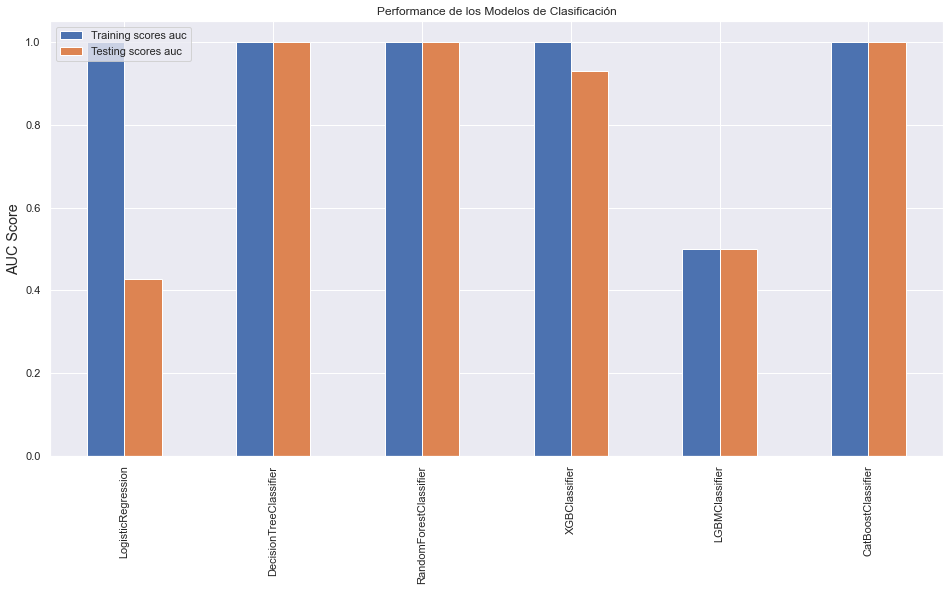

In [400]:
# Plot to compare the performance of the algorithms on both datasets
ax = properties[["Training scores auc", "Testing scores auc"]].plot(kind="bar",title="Performance de los Modelos de Clasificación", figsize=(16, 8))
ax.set_ylabel("AUC Score", fontsize="large")

Métricas de Evaluación para Clasificación para el Modelo Decision tree

In [401]:
from time import time

# Initialize and fit the model
best_model = DecisionTreeClassifier() 
best_model.fit(best_X_train, y_train)


# Separate the features and the target variable
predict_train_lg = best_model.predict_proba(best_X_train)[:,1]
predict_test_lg = best_model.predict_proba(best_X_test)[:,1]


# Print scores on both
print("auc o Roc on training in DecisionTreeClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc o Roc on testing in DecisionTreeClassifier  data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg))) 

auc o Roc on training in DecisionTreeClassifier data : 1.000
auc o Roc on testing in DecisionTreeClassifier  data : 1.000


In [402]:
predict_lg_test = best_model.predict(best_X_test)
cm=confusion_matrix(y_test, predict_lg_test)
cm

array([[7, 0],
       [0, 3]], dtype=int64)

In [403]:
predict_lg_test

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [404]:
## Metricas de Validación manual
predict_lg_test = best_model.predict(best_X_test)
cm=confusion_matrix(y_test, predict_lg_test)


TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

ACC = accuracy_score(y_test, predict_lg_test)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
AUC = roc_auc_score(y_test, predict_test_lg)
GINI = 2*(AUC-0.5)

print("AUC : {:.3f}".format(AUC))
print("INDICE DE GINI : {:.3f}".format(GINI))
print("ACCURACY : {:.3f}".format(ACC))
print("SENSIBILIDAD O RECALL: {:.3f}".format(TPR))
print("ESPECIFICIDAD : {:.3f}".format(TPR))
print("PPV O PRECISION : {:.3f}".format(PPV))
print("NPV : {:.3f}".format(NPV))

AUC : 1.000
INDICE DE GINI : 1.000
ACCURACY : 1.000
SENSIBILIDAD O RECALL: 1.000
ESPECIFICIDAD : 1.000
PPV O PRECISION : 1.000
NPV : 1.000


In [405]:
best_model = DecisionTreeClassifier() 
best_model.fit(best_X_train, y_train)

DecisionTreeClassifier()

In [406]:
predict_lg_test = best_model.predict(best_X_test)

In [407]:
print(metrics.classification_report(y_test, predict_lg_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



## Cross Validation and Optimización de Modelos

In [408]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


## Random Hyperparameter Grid

In [409]:
# Number of trees in random forest
iterations = [int(x) for x in np.linspace(start = 500, stop = 2500, num = 10)]
# Metrics eval
colsample_bytree = [0.6, 0.7, 0.8 , 0.9, 1]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
learning_rate = [0.05, 0.1, 0.15 ,0.2]
# Create the random grid
random_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(random_grid)

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
 'iterations': [500, 722, 944, 1166, 1388, 1611, 1833, 2055, 2277, 2500],
 'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8, 10, None]}


In [410]:
best_X_train.columns

Index(['Facturacion_total', 'SEB CELLOPHANES ESPRESSO BROWN 300 ML',
       'SEB CELLOPHANES HONEY COMB BLOND 300ML',
       'SEB CELLOPHANES ICE BLOND 300 ML', 'SEB DARK OIL MASK 500ML',
       'SEB GEL FORTE STRONG 200ML', 'SEB HYDRE CONDITIONER 1000ML',
       'SEB HYDRE CONDITIONER 250ML', 'SEB HYDRE SHAMPOO 1000ML',
       'SEB HYDRE SHAMPOO 250ML', 'SEB HYDRE TREATMENT 150ML',
       'SEB PENETRAITT CONDIT. 1000ML', 'SEB PENETRAITT CONDITION 250ML',
       'SEB PENETRAITT MASQUE 150ml', 'SEB PENETRAITT PRO MASQUE 500ML',
       'SEB PENETRAITT SHAMPOO 1000ML', 'SEB PENETRAITT SHAMPOO 250ML',
       'SEB POTION 9 STYL TRT 150ML', 'SEB POTION 9 STYL TRT 500ML',
       'SEB TRILLIANCE SHP 1000ML', 'SEB TRILLIANCE SHP 250ML',
       'SEB TRILLIANT 150 ML', 'SEB TWISTED DETANGLER CONDIT 250ML',
       'SEB TWISTED ELASTIC TREATMENT 500ML',
       'SEBMAN MULTITASKER SHAMP 3EN1 1000ML', 'top'],
      dtype='object')

In [411]:
best_X= X[variables]
best_X.columns

Index(['Facturacion_total', 'SEB CELLOPHANES ESPRESSO BROWN 300 ML',
       'SEB CELLOPHANES HONEY COMB BLOND 300ML',
       'SEB CELLOPHANES ICE BLOND 300 ML', 'SEB DARK OIL MASK 500ML',
       'SEB GEL FORTE STRONG 200ML', 'SEB HYDRE CONDITIONER 1000ML',
       'SEB HYDRE CONDITIONER 250ML', 'SEB HYDRE SHAMPOO 1000ML',
       'SEB HYDRE SHAMPOO 250ML', 'SEB HYDRE TREATMENT 150ML',
       'SEB PENETRAITT CONDIT. 1000ML', 'SEB PENETRAITT CONDITION 250ML',
       'SEB PENETRAITT MASQUE 150ml', 'SEB PENETRAITT PRO MASQUE 500ML',
       'SEB PENETRAITT SHAMPOO 1000ML', 'SEB PENETRAITT SHAMPOO 250ML',
       'SEB POTION 9 STYL TRT 150ML', 'SEB POTION 9 STYL TRT 500ML',
       'SEB TRILLIANCE SHP 1000ML', 'SEB TRILLIANCE SHP 250ML',
       'SEB TRILLIANT 150 ML', 'SEB TWISTED DETANGLER CONDIT 250ML',
       'SEB TWISTED ELASTIC TREATMENT 500ML',
       'SEBMAN MULTITASKER SHAMP 3EN1 1000ML', 'top'],
      dtype='object')

In [412]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lgb = LGBMClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
lgb_random = RandomizedSearchCV(estimator = lgb, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=1416, n_jobs = -1)
# Fit the random search model
lgb_random.fit(best_X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.7s finished


[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'iterations': [500, 722, 944, 1166,
                                                       1388, 1611, 1833, 2055,
                                                       2277, 2500],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 4, 6, 8, 10, None]},
                   random_state=1416, verbose=2)

In [413]:
lgb_random.best_params_

{'max_depth': 6,
 'learning_rate': 0.2,
 'iterations': 2055,
 'colsample_bytree': 0.6}

In [414]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:.12g}%.'.format(accuracy))
    return accuracy

In [415]:
base_model = LGBMClassifier()
base_model.fit(best_X_train, y_train)
base_accuracy = evaluate(base_model, best_X_test, y_test)

best_random = lgb_random.best_estimator_
best_random.fit(best_X_train, y_train)
random_accuracy = evaluate(best_random, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.7%.
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Model Performance
Accuracy = 0.7%.
Improvement of 0%.


In [416]:
# Number of trees in random forest
iterations = [300, 400, 500, 600]
# Metrics eval
colsample_bytree = [0.7, 0.8, 0.9]
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8]
# Method of selecting samples for training each tree
learning_rate = [0.1, 0.15 ,0.2]
# Create the random grid
param_grid = {'iterations': iterations,
               'colsample_bytree': colsample_bytree,
               'max_depth': max_depth,
               'learning_rate': learning_rate}
pprint(param_grid)

{'colsample_bytree': [0.7, 0.8, 0.9],
 'iterations': [300, 400, 500, 600],
 'learning_rate': [0.1, 0.15, 0.2],
 'max_depth': [3, 4, 6, 8]}


In [417]:
# Create a based model
lgb = LGBMClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(best_X, y)
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.2s


[LightGBM] [Warning] Unknown parameter: iterations


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    7.2s finished


{'colsample_bytree': 0.7,
 'iterations': 300,
 'learning_rate': 0.1,
 'max_depth': 3}

In [418]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, best_X_test, y_test)
print('Improvement of {:.12g}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 0.9%.
Improvement of 28.5714285714%.


# Aprendizaje Supervisado - Regresión

In [419]:
#txpreciosam = txpreciosam.drop(['index'], axis=1)


In [420]:
txpreciosam.head()

id_venta  top Ano_Mes  Facturacion_total  PACK SEBASTIAN HYDRE  \
0  202001364042  0.0  202001            1259.31                   0.0   
1  202001430525  0.0  202001            1720.27                   0.0   
2  202001436014  0.0  202001            2400.00                   0.0   
3  202001441466  1.0  202001           10488.36                   0.0   
4   20200163634  0.0  202001               0.00                   0.0   

   PACK SEBASTIAN PENETRAITT  PROFESSIONAL SEB SHINE SHAKER 75ML  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   

   SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.000   
1                                 0.000   
2                                 0.000   
3                                52.975   
4                                 0.000   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  ...  SEBMAN ACONDICIONADOR 250ML  \
0                                   0.00  ...                          0.0   
1                                   0.00  ...                          0.0   
2                                   0.00  ...                          0.0   
3                                 105.95  ...                          0.0   
4                                   0.00  ...                          0.0   

   SEBMAN BALSAMO AFTER SHAVE 150ML  SEBMAN HAIR SPRAY 200ML  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   

   SEBMAN MULTITASKER SHAMP 3EN1 1000ML  SEBMAN MULTITASKER SHAMP 3EN1 250ML  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   SEBMAN PASTA FIJADORA CLAY MATTE 75ML  SEBMAN PLAYER GEL 150ML  \
0                                    0.0                      0.0   
1                                    0.0                      0.0   
2                                    0.0                      0.0   
3                                    0.0                      0.0   
4                                    0.0                      0.0   

   SEBMAN POMADA MODELADORA BRILLANTE 75ML  SEBMAN REWORKABLE GEL 75ML  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                         0.0   

   SEBMAN TONICO CAPILAR REFRESCANTE 100ML  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                                      0.0  
4                                      0.0  

[5 rows x 76 columns]

In [421]:
txpreciosam.corr(method= 'pearson')

top  Facturacion_total  \
top                                      1.000000           0.725541   
Facturacion_total                        0.725541           1.000000   
PACK SEBASTIAN HYDRE                     0.255730           0.197106   
PACK SEBASTIAN PENETRAITT                0.143411           0.064770   
PROFESSIONAL SEB SHINE SHAKER 75ML       0.329416           0.559028   
...                                           ...                ...   
SEBMAN PASTA FIJADORA CLAY MATTE 75ML    0.137368           0.045034   
SEBMAN PLAYER GEL 150ML                  0.176515           0.063303   
SEBMAN POMADA MODELADORA BRILLANTE 75ML  0.242428           0.113268   
SEBMAN REWORKABLE GEL 75ML               0.226492           0.108824   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML -0.145433          -0.123998   

                                         PACK SEBASTIAN HYDRE  \
top                                                  0.255730   
Facturacion_total                                    0.197106   
PACK SEBASTIAN HYDRE                                 1.000000   
PACK SEBASTIAN PENETRAITT                            0.330386   
PROFESSIONAL SEB SHINE SHAKER 75ML                   0.380514   
...                                                       ...   
SEBMAN PASTA FIJADORA CLAY MATTE 75ML                0.140039   
SEBMAN PLAYER GEL 150ML                              0.127171   
SEBMAN POMADA MODELADORA BRILLANTE 75ML              0.167485   
SEBMAN REWORKABLE GEL 75ML                           0.189711   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML             -0.081740   

                                         PACK SEBASTIAN PENETRAITT  \
top                                                       0.143411   
Facturacion_total                                         0.064770   
PACK SEBASTIAN HYDRE                                      0.330386   
PACK SEBASTIAN PENETRAITT                                 1.000000   
PROFESSIONAL SEB SHINE SHAKER 75ML                       -0.059563   
...                                                            ...   
SEBMAN PASTA FIJADORA CLAY MATTE 75ML                    -0.059220   
SEBMAN PLAYER GEL 150ML                                  -0.059406   
SEBMAN POMADA MODELADORA BRILLANTE 75ML                  -0.050920   
SEBMAN REWORKABLE GEL 75ML                               -0.050951   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML                  -0.049558   

                                         PROFESSIONAL SEB SHINE SHAKER 75ML  \
top                                                                0.329416   
Facturacion_total                                                  0.559028   
PACK SEBASTIAN HYDRE                                               0.380514   
PACK SEBASTIAN PENETRAITT                                         -0.059563   
PROFESSIONAL SEB SHINE SHAKER 75ML                                 1.000000   
...                                                                     ...   
SEBMAN PASTA FIJADORA CLAY MATTE 75ML                              0.193033   
SEBMAN PLAYER GEL 150ML                                            0.177993   
SEBMAN POMADA MODELADORA BRILLANTE 75ML                            0.221324   
SEBMAN REWORKABLE GEL 75ML                                         0.247470   
SEBMAN TONICO CAPILAR REFRESCANTE 100ML                           -0.072351   

                                         SEB CELLOPHANES CARAMEL BROWN 300 ML  \
top                                                                  0.295725   
Facturacion_total                                                    0.577312   
PACK SEBASTIAN HYDRE                                                -0.095127   
PACK SEBASTIAN PENETRAITT                                           -0.057675   
PROFESSIONAL SEB SHINE SHAKER 75ML                                   0.517228   
...                                                                       ...   
SEBMAN PASTA FIJADORA CLAY MATTE 75ML      

(74.0, 0.0)

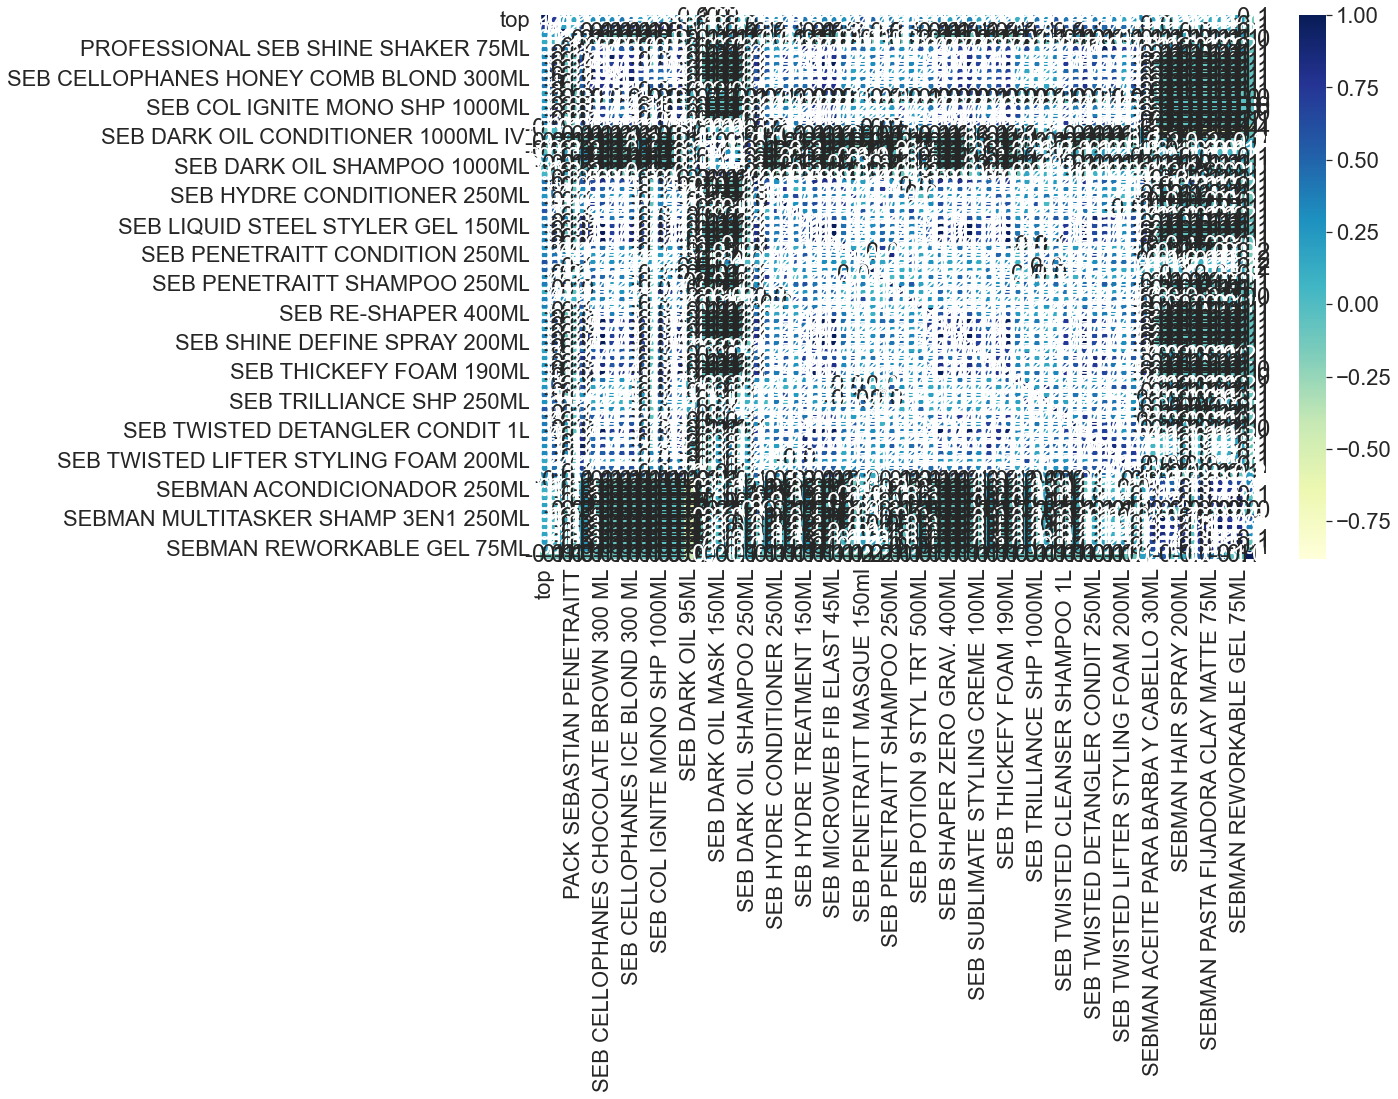

In [422]:
sns.set(font_scale=2)
corr_matrix = txpreciosam.corr()
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,annot=True, fmt=".1f",cmap="YlGnBu") 
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

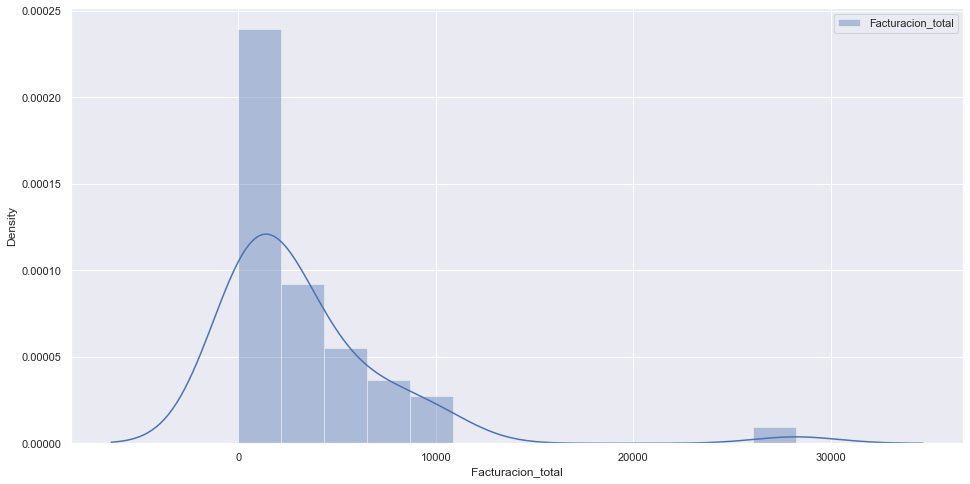

In [423]:
# Grouped boxplot
sns.set()
plt.figure(figsize=(16,8))
sns.distplot(txpreciosam["Facturacion_total"] , label="Facturacion_total")
plt.legend()
plt.show()

In [424]:
txpreciosam = txpreciosam.fillna(0)

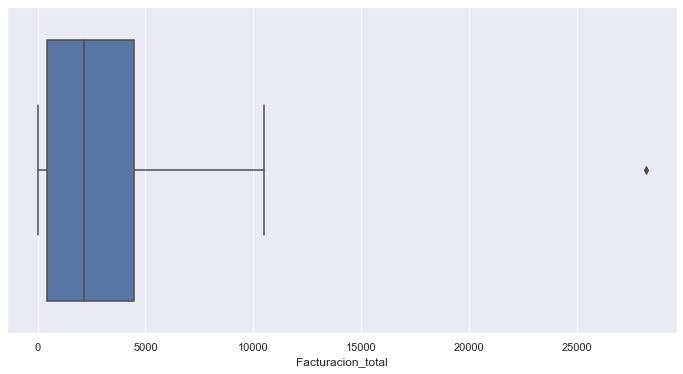

In [425]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Facturacion_total', data=txpreciosam);

Preprocesing la Data

In [426]:
## selection of category variables
target = 'Facturacion_total'
exclude = ['Ano_Mes','id_venta','Mes', 'index']

cols = [x for x in txpreciosam.columns if x not in exclude + [target]]
cols_cat = txpreciosam[cols].select_dtypes(['object']).columns.tolist()
index_categorical=[cols.index(x) for x in cols_cat]
print(exclude, '\n\n', index_categorical,cols_cat)


## For Training

for i in cols_cat:
    le = preprocessing.LabelEncoder()
    le.fit(list(txoreciosam[i].dropna()))
    txpreciosam.loc[~txpreciosam[i].isnull(),i]=le.transform(txpreciosam[i].dropna())

txpreciosam[cols].head()

['Ano_Mes', 'id_venta', 'Mes', 'index'] 

 [] []


top  PACK SEBASTIAN HYDRE  PACK SEBASTIAN PENETRAITT  \
0  0.0                   0.0                        0.0   
1  0.0                   0.0                        0.0   
2  0.0                   0.0                        0.0   
3  1.0                   0.0                        0.0   
4  0.0                   0.0                        0.0   

   PROFESSIONAL SEB SHINE SHAKER 75ML  SEB CELLOPHANES CARAMEL BROWN 300 ML  \
0                                 0.0                                 0.000   
1                                 0.0                                 0.000   
2                                 0.0                                 0.000   
3                                 0.0                                52.975   
4                                 0.0                                 0.000   

   SEB CELLOPHANES CHOCOLATE BROWN 300 ML  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   SEB CELLOPHANES ESPRESSO BROWN 300 ML  \
0                                   0.00   
1                                   0.00   
2                                   0.00   
3                                 105.95   
4                                   0.00   

   SEB CELLOPHANES HONEY COMB BLOND 300ML  SEB CELLOPHANES ICE BLOND 300 ML  \
0                                  0.0000                          0.000000   
1                                  0.0000                          0.000000   
2                                  0.0000                          0.000000   
3                                 79.4625                         70.633333   
4                                  0.0000                          0.000000   

   SEB CELLOPHANES SHINE CLEAR 300 ML  ...  SEBMAN ACONDICIONADOR 250ML  \
0                                 0.0  ...                          0.0   
1                                 0.0  ...                          0.0   
2                                 0.0  ...                          0.0   
3                                 0.0  ...                          0.0   
4                                 0.0  ...                          0.0   

   SEBMAN BALSAMO AFTER SHAVE 150ML  SEBMAN HAIR SPRAY 200ML  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   

   SEBMAN MULTITASKER SHAMP 3EN1 1000ML  SEBMAN MULTITASKER SHAMP 3EN1 250ML  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   SEBMAN PASTA FIJADORA CLAY MATTE 75ML  SEBMAN PLAYER GEL 150ML  \
0                                    0.0                      0.0   
1                                    0.0                      0.0   
2                                    0.0                      0.0   
3                                    0.0                      0.0   
4                                    0.0                      0.0   

   SEBMAN POMADA MODELADORA BRILLANTE 75ML  SEBMAN REWORKABLE GEL 75ML  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                  

In [427]:
txpreciosam.Ano_Mes.min()

'202001'

In [428]:
txpreciosam.Ano_Mes.max()

'202012'

In [429]:
X_train = txpreciosam[txpreciosam.Ano_Mes < '202006'].drop(['Facturacion_total','Ano_Mes'], axis=1)
X_test = txpreciosam[txpreciosam.Ano_Mes >= '202006'].drop(['Facturacion_total','Ano_Mes'], axis=1)
y_train = txpreciosam[txpreciosam.Ano_Mes < '202006'][['Facturacion_total']]
y_test= txpreciosam[txpreciosam.Ano_Mes >= '202006'][['Facturacion_total']]

In [430]:
X = txpreciosam.drop(['Facturacion_total', 'id_venta', 'top','Ano_Mes'], axis=1)
y = txpreciosam[['Facturacion_total']]

In [431]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [432]:
X_test.shape

(10, 72)

In [433]:
y_test.shape

(10, 1)

Regresion Lineal Estadística

In [434]:
y_train.head()

Facturacion_total
16              56.64
24            7375.28
7              646.02
45             672.60
18               0.00

In [435]:
## Modelos de regresion
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm           
import statsmodels.formula.api as smf 

In [436]:
M_R = sm.OLS(np.sqrt(y_train),X_train.astype(float)).fit()

In [437]:
txpreciosam.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 76 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_venta                                 50 non-null     object 
 1   top                                      50 non-null     float64
 2   Ano_Mes                                  50 non-null     object 
 3   Facturacion_total                        50 non-null     float64
 4   PACK SEBASTIAN HYDRE                     50 non-null     float64
 5   PACK SEBASTIAN PENETRAITT                50 non-null     float64
 6   PROFESSIONAL SEB SHINE SHAKER 75ML       50 non-null     float64
 7   SEB CELLOPHANES CARAMEL BROWN 300 ML     50 non-null     float64
 8   SEB CELLOPHANES CHOCOLATE BROWN 300 ML   50 non-null     float64
 9   SEB CELLOPHANES ESPRESSO BROWN 300 ML    50 non-null     float64
 10  SEB CELLOPHANES HONEY COMB BLOND 300ML   50 non-null

In [438]:
M_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Facturacion_total   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.765e+28
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                    9.68e-85
Time:                        21:25:24   Log-Likelihood:                          1115.4
No. Observations:                  40   AIC:                                     -2163.
Df Residuals:                       6   BIC:                                     -2105.
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
PACK SEBASTIAN HYDRE                       -0.3969   8.48e-15  -4.68e+13      0.000      -0.397      -0.397
PACK SEBASTIAN PENETRAITT                   0.2856   3.65e-15   7.82e+13      0.000       0.286       0.286
PROFESSIONAL SEB SHINE SHAKER 75ML         -0.2637   6.26e-15  -4.21e+13      0.000      -0.264      -0.264
SEB CELLOPHANES CARAMEL BROWN 300 ML        0.0553   3.41e-15   1.62e+13      0.000       0.055       0.055
SEB CELLOPHANES CHOCOLATE BROWN 300 ML     -0.0543   2.38e-15  -2.29e+13      0.000      -0.054      -0.054
SEB CELLOPHANES ESPRESSO BROWN 300 ML       0.1747   2.69e-15   6.49e+13      0.000       0.175       0.175
SEB CELLOPHANES HONEY COMB BLOND 300ML     -0.2013    5.4e-15  -3.73e+13      0.000      -0.201      -0.201
SEB CELLOPHANES ICE BLOND 300 ML            0.2019   2.33e-15   8.65e+13      0.000       0.202       0.202
SEB CELLOPHANES SHINE CLEAR 300 ML          0.1382   7.02e-15   1.97e+13      0.000       0.138       0.138
SEB CELLOPHANES VANILLA BLOND 300 ML        0.1792   3.21e-15   5.57e+13      0.000       0.179       0.179
SEB COL IGNITE MONO SHP 1000ML              0.3698   3.61e-15   1.02e+14      0.000       0.370       0.370
SEB COL IGNITE MONO SHP 250ML               0.1655   1.62e-15   1.02e+14      0.000       0.166       0.166
SEB CRAFT CLAY REMOLD 50G                  -0.0247   1.08e-15  -2.29e+13      0.000      -0.025      -0.025
SEB DARK OIL 95ML                       -5.507e-16   2.58e-15     -0.213      0.838   -6.87e-15    5.77e-15
SEB DARK OIL CONDITIONER 1000ML IV          0.4601   5.34e-15   8.61e+13      0.000       0.460       0.460
SEB DARK OIL CONDITIONER 250ML              0.2513      9e-15   2.79e+13      0.000       0.251       0.251
SEB DARK OIL MASK 150ML                     0.1309   1.35e-14   9.72e+12      0.000       0.131       0.131
SEB DARK OIL MASK 500ML                     0.2479   6.26e-15   3.96e+13      0.000       0.248       0.248
SEB DARK OIL SHAMPOO 1000ML                -0.4258   7.87e-15  -5.41e+13      0.000      -0.426      -0.426
SEB DARK OIL SHAMPOO 250ML                  0.1695   8.39e-15   2.02e+13      0.000       0.169       0.169
SEB GEL FORTE STRONG 200ML                 -0.0193   8.44e-16  -2.29e+13      0.000      -0.019      -0.019
SEB HYDRE CONDITIONER 1000ML                0.2033    5.2e-15   3.91e+13      0.000       0.203       0.203
SEB HYDRE CONDITIONER 250ML                 0.0531   1.27e-14   4.19e+12      0.000       0.053       0.053
SEB HYDRE SHAMPOO 1000ML                   -0.2917   6.28e-15  -4.64e+13      0.000      -0.292      -0.292
SEB HYDRE SHAMPOO 250ML                     0.4273   1.65e-14   2.59

Regresión Lineal Múltiple

In [439]:
X_train.shape

(40, 72)

Usando el api de SKlearn

Usando el api de SKlearn

In [440]:
lm = LinearRegression()
lm.fit(X_train,np.sqrt(y_train))

LinearRegression()

In [441]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [442]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-3.96892805e-01  2.85641295e-01 -2.63664150e-01  5.52919061e-02
  -5.43266315e-02  1.74727288e-01 -2.01294037e-01  2.01909769e-01
   1.38192245e-01  1.79153073e-01  3.69751982e-01  1.65522687e-01
  -2.46700336e-02  6.10622664e-16  4.60064091e-01  2.51272265e-01
   1.30929681e-01  2.47877756e-01 -4.25825138e-01  1.69472863e-01
  -1.93130021e-02  2.03288924e-01  5.31278238e-02 -2.91697024e-01
   4.27343271e-01 -2.33994797e-01 -2.25933667e-02 -2.30087001e-02
  -1.42315777e-02  6.20644150e-02  6.00843830e-01  4.23053494e-01
   1.24976284e-02  2.39882583e-01 -3.10799500e-02 -3.00942723e-02
   2.23035416e-01  2.05237843e-01  1.58338355e-01 -2.30087001e-02
   1.58338355e-01 -2.13050641e-02 -2.13473666e-02  1.88567659e-01
  -1.62845995e-01  2.73083044e-01  9.25578734e-02 -1.23974430e-01
  -2.66498248e-01  7.93393381e-01  3.43131395e-02  2.21285216e-01
  -4.00605386e-01  2.23674253e-01 -3.42553845e-01 -3.17091797e-01
  -7.70480894e-02  3.12553879e-01  1.11828159e-02 -3.5083013

In [443]:
## Coefiencientes del modelo
rL_coefficient = pd.DataFrame() 
rL_coefficient["Columns"]= X_train.columns 
rL_coefficient['Coefficient_Estimate'] = pd.DataFrame(lm.coef_).T
rL_coefficient

Columns  Coefficient_Estimate
0                      PACK SEBASTIAN HYDRE             -0.396893
1                 PACK SEBASTIAN PENETRAITT              0.285641
2        PROFESSIONAL SEB SHINE SHAKER 75ML             -0.263664
3      SEB CELLOPHANES CARAMEL BROWN 300 ML              0.055292
4    SEB CELLOPHANES CHOCOLATE BROWN 300 ML             -0.054327
..                                      ...                   ...
67    SEBMAN PASTA FIJADORA CLAY MATTE 75ML              0.236418
68                  SEBMAN PLAYER GEL 150ML              0.100431
69  SEBMAN POMADA MODELADORA BRILLANTE 75ML              0.002597
70               SEBMAN REWORKABLE GEL 75ML              0.043633
71  SEBMAN TONICO CAPILAR REFRESCANTE 100ML              0.079260

[72 rows x 2 columns]

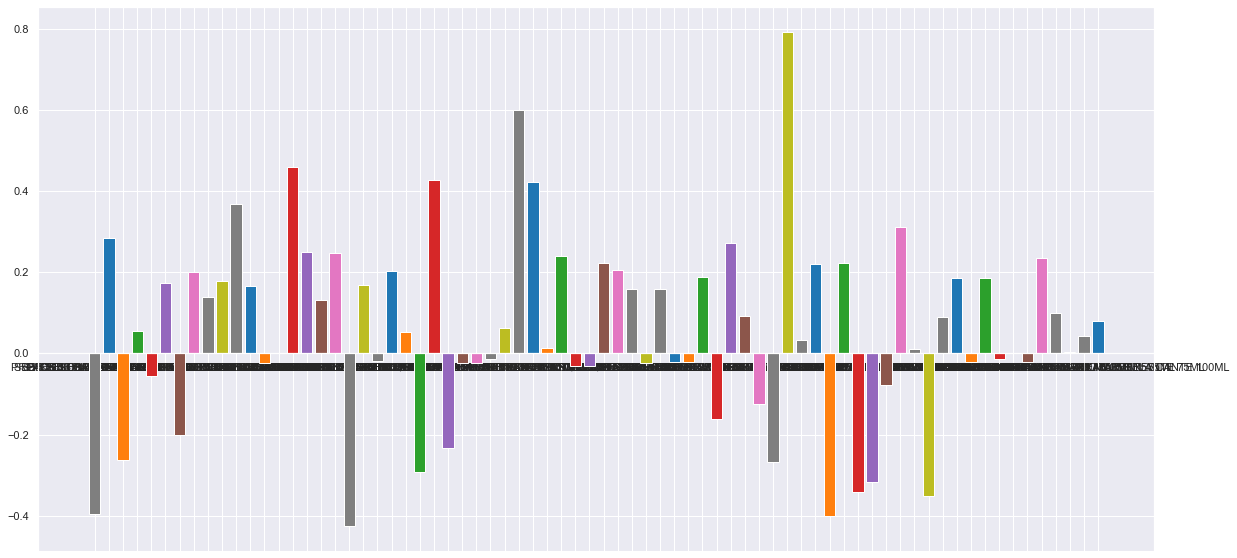

In [444]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
rL_coefficient.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Performace del Modelo

In [445]:
np.log(4)

1.3862943611198906

In [446]:
np.exp(np.log(4))

4.0

## Definimos la función del MAPE

In [447]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

predicciones

In [448]:

predictions = lm.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

MAE: 2249.356512331527
MSE: 18218508.16427009
RMSE: 4268.314440651027
MAPE: inf


Gráfico de test

Text(0, 0.5, 'Predicted Y')

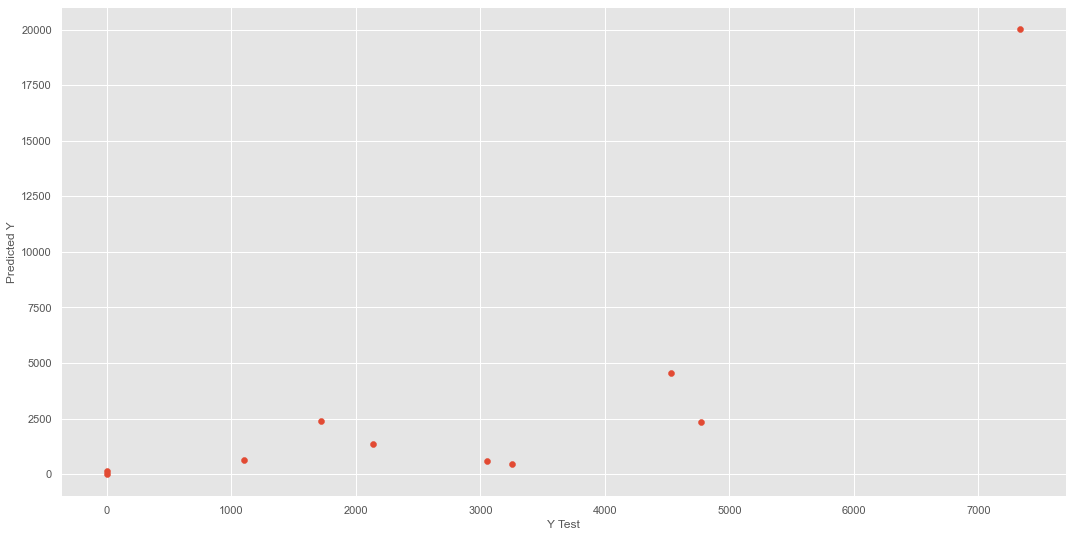

In [449]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Regresión Ridge

In [450]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, np.sqrt(y_train)) 

Ridge(alpha=1)

In [451]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient_Estimate'] = pd.DataFrame(model_ridge.coef_).T
ridge_coefficient

Columns  Coefficient_Estimate
0                      PACK SEBASTIAN HYDRE             -0.385036
1                 PACK SEBASTIAN PENETRAITT              0.284527
2        PROFESSIONAL SEB SHINE SHAKER 75ML             -0.254158
3      SEB CELLOPHANES CARAMEL BROWN 300 ML              0.053631
4    SEB CELLOPHANES CHOCOLATE BROWN 300 ML             -0.053930
..                                      ...                   ...
67    SEBMAN PASTA FIJADORA CLAY MATTE 75ML              0.234027
68                  SEBMAN PLAYER GEL 150ML              0.099801
69  SEBMAN POMADA MODELADORA BRILLANTE 75ML              0.002853
70               SEBMAN REWORKABLE GEL 75ML              0.042983
71  SEBMAN TONICO CAPILAR REFRESCANTE 100ML              0.068288

[72 rows x 2 columns]

Gráfico de los Parámetros del Modelo Ridge

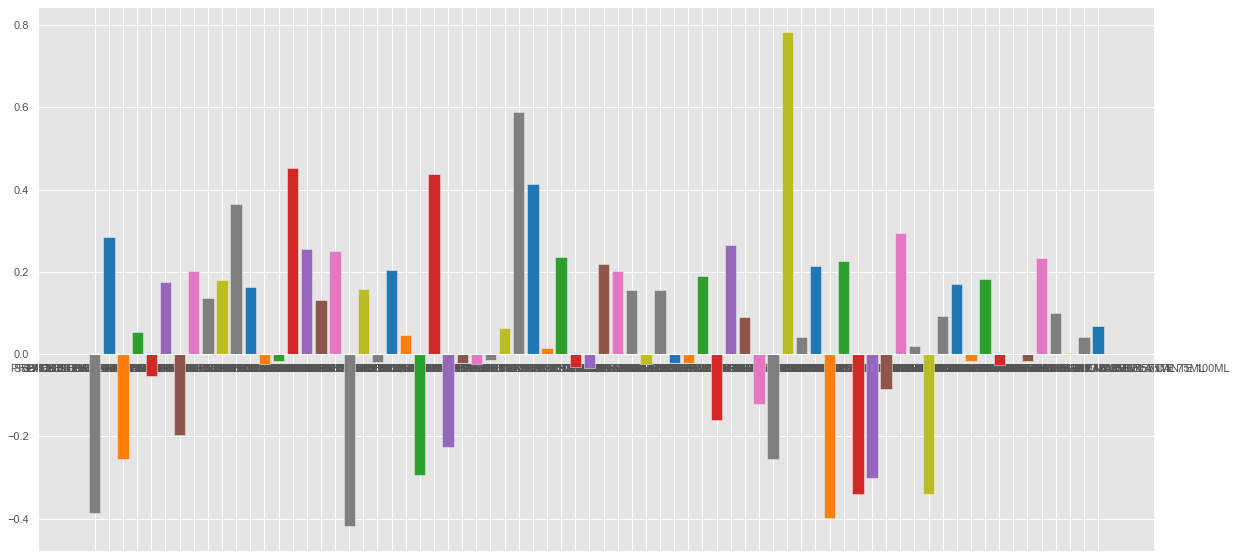

In [452]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_coefficient.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Performace del Modelo

In [453]:
pred_test_rr= model_ridge.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_rr))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_rr)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_rr))

MAE: 2231.8884947428205
MSE: 17520631.801956676
RMSE: 4185.765378273927
MAPE: inf


Gráfico de test

## Regresión Lasso

In [454]:
model_lasso = Lasso(alpha= 0.01)
model_lasso.fit(X_train, np.sqrt(y_train)) 

Lasso(alpha=0.01)

In [455]:
ridge_lasso = pd.DataFrame() 
ridge_lasso["Columns"]= X_train.columns 
ridge_lasso['Coefficient_Estimate'] = pd.DataFrame(model_lasso.coef_)
ridge_lasso

Columns  Coefficient_Estimate
0                      PACK SEBASTIAN HYDRE             -0.085170
1                 PACK SEBASTIAN PENETRAITT              0.221020
2        PROFESSIONAL SEB SHINE SHAKER 75ML              0.853646
3      SEB CELLOPHANES CARAMEL BROWN 300 ML              0.374042
4    SEB CELLOPHANES CHOCOLATE BROWN 300 ML             -0.011425
..                                      ...                   ...
67    SEBMAN PASTA FIJADORA CLAY MATTE 75ML             -0.061627
68                  SEBMAN PLAYER GEL 150ML             -0.043080
69  SEBMAN POMADA MODELADORA BRILLANTE 75ML             -0.015418
70               SEBMAN REWORKABLE GEL 75ML             -0.000000
71  SEBMAN TONICO CAPILAR REFRESCANTE 100ML              0.165083

[72 rows x 2 columns]

Gráfico de los Parámetros del Modelo Lasso

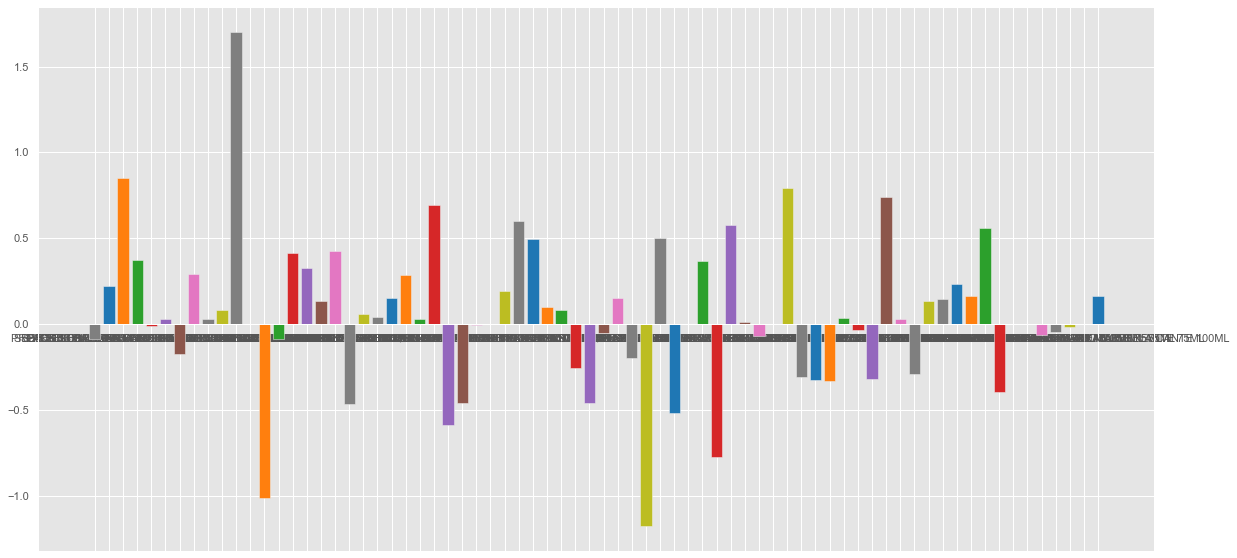

In [456]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_lasso.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Performace del Modelo

In [457]:
pred_test_lasso= model_lasso.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_lasso)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_lasso))

MAE: 2653.7087557440514
MSE: 17232771.33654932
RMSE: 4151.237325972742
MAPE: inf


Gráfico de test

Text(0, 0.5, 'Predicted Y')

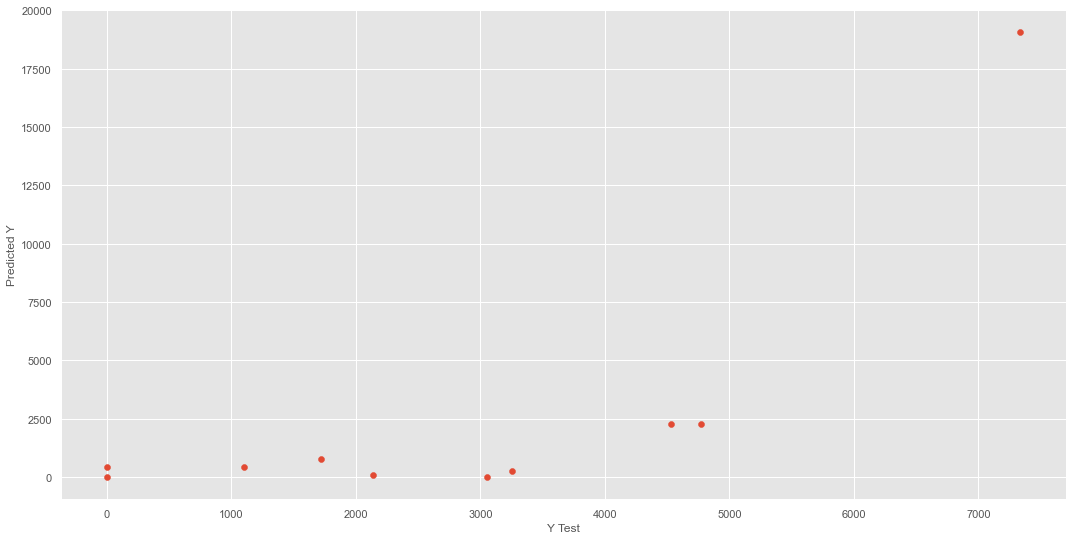

In [458]:
plt.scatter(y_test,pred_test_lasso)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Regresión Elastic Net

In [459]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, np.sqrt(y_train)) 

ElasticNet(alpha=0.01)

In [460]:
ridge_elastic_net= pd.DataFrame() 
ridge_elastic_net["Columns"]= X_train.columns 
ridge_elastic_net['Coefficient_Estimate'] = pd.DataFrame(model_enet.coef_)
ridge_elastic_net

Columns  Coefficient_Estimate
0                      PACK SEBASTIAN HYDRE             -0.076685
1                 PACK SEBASTIAN PENETRAITT              0.218662
2        PROFESSIONAL SEB SHINE SHAKER 75ML              0.859988
3      SEB CELLOPHANES CARAMEL BROWN 300 ML              0.377668
4    SEB CELLOPHANES CHOCOLATE BROWN 300 ML             -0.024469
..                                      ...                   ...
67    SEBMAN PASTA FIJADORA CLAY MATTE 75ML             -0.061848
68                  SEBMAN PLAYER GEL 150ML             -0.060969
69  SEBMAN POMADA MODELADORA BRILLANTE 75ML             -0.006751
70               SEBMAN REWORKABLE GEL 75ML              0.044732
71  SEBMAN TONICO CAPILAR REFRESCANTE 100ML              0.188866

[72 rows x 2 columns]

Gráfico de los Parámetros del Modelo Eslastic Net

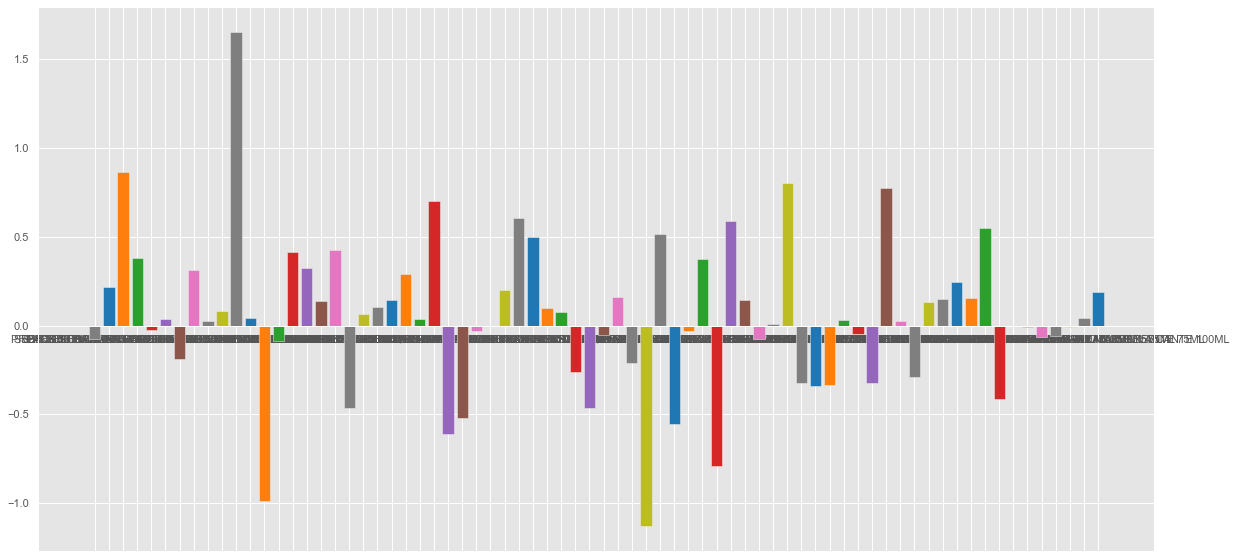

In [461]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive'] 
  
ax.bar(X_train.columns ,  
ridge_elastic_net.Coefficient_Estimate,  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Performace del Modelo

In [462]:
pred_test_enet= model_enet.predict(X_test)**2

print('MAE:', metrics.mean_absolute_error(y_test, pred_test_enet))
print('MSE:', metrics.mean_squared_error(y_test, pred_test_enet))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test_enet)))
print('MAPE:', mean_absolute_percentage_error(y_test, pred_test_enet))

MAE: 2668.8579473502573
MSE: 17666966.398472585
RMSE: 4203.209059572529
MAPE: inf


Gráfico de test

Text(0, 0.5, 'Predicted Y')

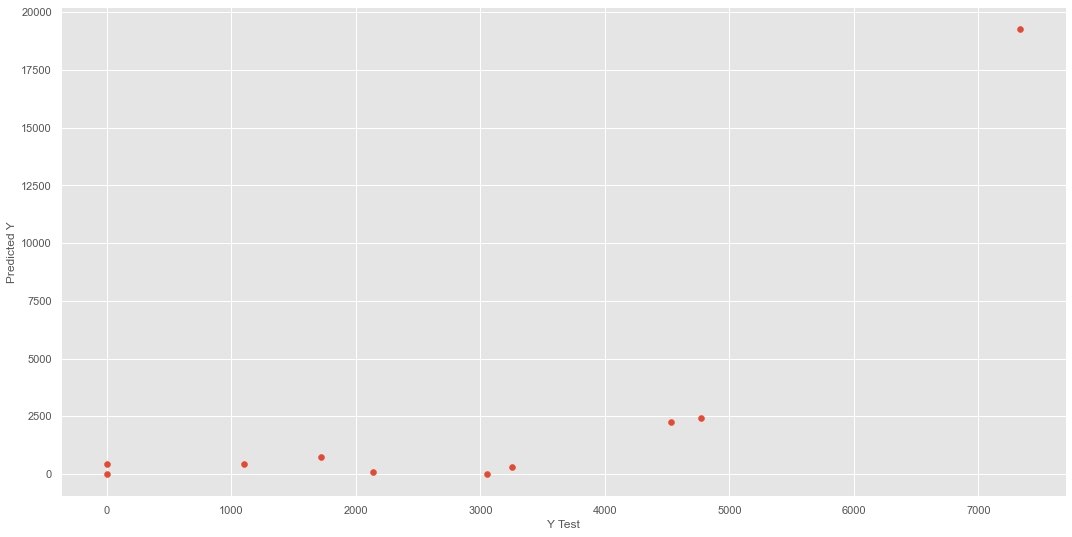

In [463]:
plt.scatter(y_test,pred_test_enet)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Análisis por deciles de la data de Tests

In [464]:
a = pd.DataFrame(predictions,columns=['Clase_Prediccion'])
a

Clase_Prediccion
0      6.429751e+02
1      5.674987e+02
2      4.352837e+02
3      4.557605e+03
4      2.343256e+03
5      2.393940e+03
6      2.001804e+04
7      1.338160e+03
8      1.252369e+02
9      1.451479e-27

In [465]:
b = pd.DataFrame(predict_lg_test,columns=['Prob_Predicion'])
b

Prob_Predicion
0               0
1               1
2               0
3               1
4               0
5               1
6               1
7               0
8               0
9               0

In [466]:
base = pd.concat([a,b],axis=1)
base

Clase_Prediccion  Prob_Predicion
0      6.429751e+02               0
1      5.674987e+02               1
2      4.352837e+02               0
3      4.557605e+03               1
4      2.343256e+03               0
5      2.393940e+03               1
6      2.001804e+04               1
7      1.338160e+03               0
8      1.252369e+02               0
9      1.451479e-27               0

# Interpretación del modelo

## Shap

In [467]:
#!conda install -c conda-forge shap

In [468]:
!pip install shap

In [469]:
import shap

In [470]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][25,:], X_test[features].iloc[25,:],link='logit')

NameError: name 'explainer' is not defined